In [1]:
from SDSS_plots import *
import matplotlib
from scipy.stats import norm
from scipy.optimize import curve_fit
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline
matplotlib.rcParams['font.size']=22
matplotlib.rcParams['figure.figsize']=(12,10)
matplotlib.rcParams['xtick.minor.visible']=True
mpl.rcParams['font.size']=45
mpl.rcParams['figure.figsize']=(16,16)
#mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['axes.linewidth']= 3.
mpl.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5 
mpl.rcParams['axes.titlepad'] = 20 

# Check quality flag msflagserexp

In [2]:
df_noflag = pd.read_csv('prova_completeness_flag.csv')
df_noflag = df_noflag[df_noflag.Vmaxwt>0]
fracper=len(df_noflag)/670722
skycov=8000.
fracsky_noflag=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

df_flag0 = df_noflag[df_noflag.msflagserexp==0]
fracper=len(df_flag0)/670722
skycov=8000.
fracsky_flag0=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

df_flag_1 = df_noflag[df_noflag.msflagserexp>-20]
fracper=len(df_flag_1)/670722
skycov=8000.
fracsky_flag_1=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

#df = pd.read_csv('./new_catalog_morph_flag_finalflag_Rmaj.dat', delim_whitespace=True)
#goodness_cut = (df.finalflag==3 ) | (df.finalflag==5) | (df.finalflag==1)
#df = df[goodness_cut]
#fracper=len(df)/670722
#skycov=8000.
#fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

In [33]:
df.columns

Index(['galcount', 'finalflag', 'z', 'Vmaxwt', 'MsMendSerExp', 'AbsMag',
       'logReSerExp', 'logReSerExpCirc', 'BT', 'n_bulge', 'ba_tot',
       'NewLCentSat', 'NewMCentSat', 'MhaloL', 'probaE', 'probaEll', 'probaS0',
       'probaSab', 'probaScd', 'TType', 'P_S0'],
      dtype='object')

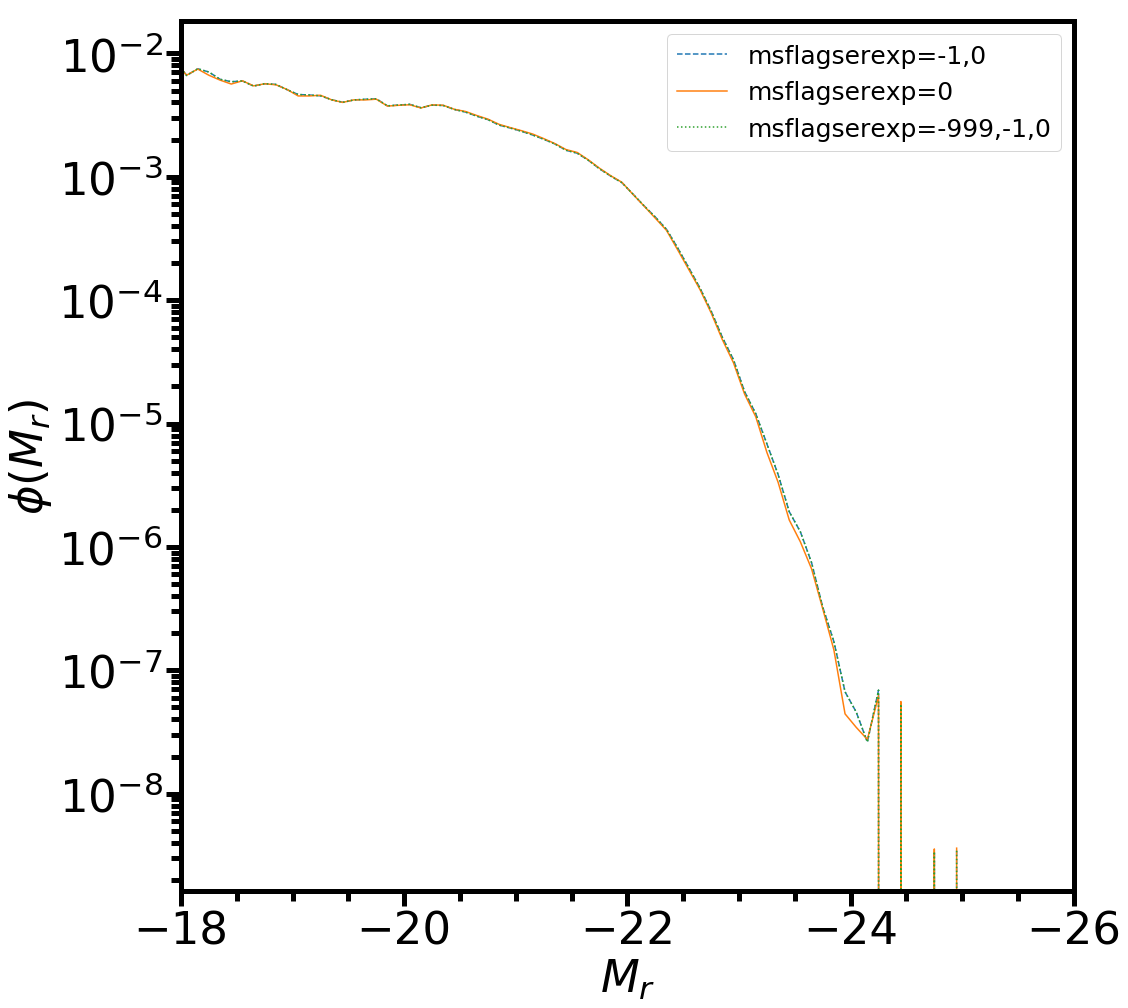

In [56]:
bins = np.arange(-25,-17,0.1)
bb = bins[1:]-0.05
hist_noflag = np.histogram(df_noflag.AbsModel, bins, weights = df_noflag.Vmaxwt)[0]
hist_0 = np.histogram(df_flag0.AbsModel, bins, weights = df_flag0.Vmaxwt)[0]
hist_1 = np.histogram(df_flag_1.AbsModel, bins, weights = df_flag_1.Vmaxwt)[0]

plt.plot(bb, hist_1/fracsky_flag_1/0.1, label='msflagserexp=-1,0',ls='--')
plt.plot(bb, hist_0/fracsky_flag0/0.1, label='msflagserexp=0')
plt.plot(bb, hist_noflag/fracsky_noflag/0.1, label='msflagserexp=-999,-1,0',ls=':')
plt.legend(fontsize=25)
plt.yscale('log')
plt.ylabel('$\phi(M_r)$')
plt.xlabel('$M_r$')
plt.xlim(-18,-26)
plt.savefig('/home/lorenzo/Pictures/test_msflagserexp.png')


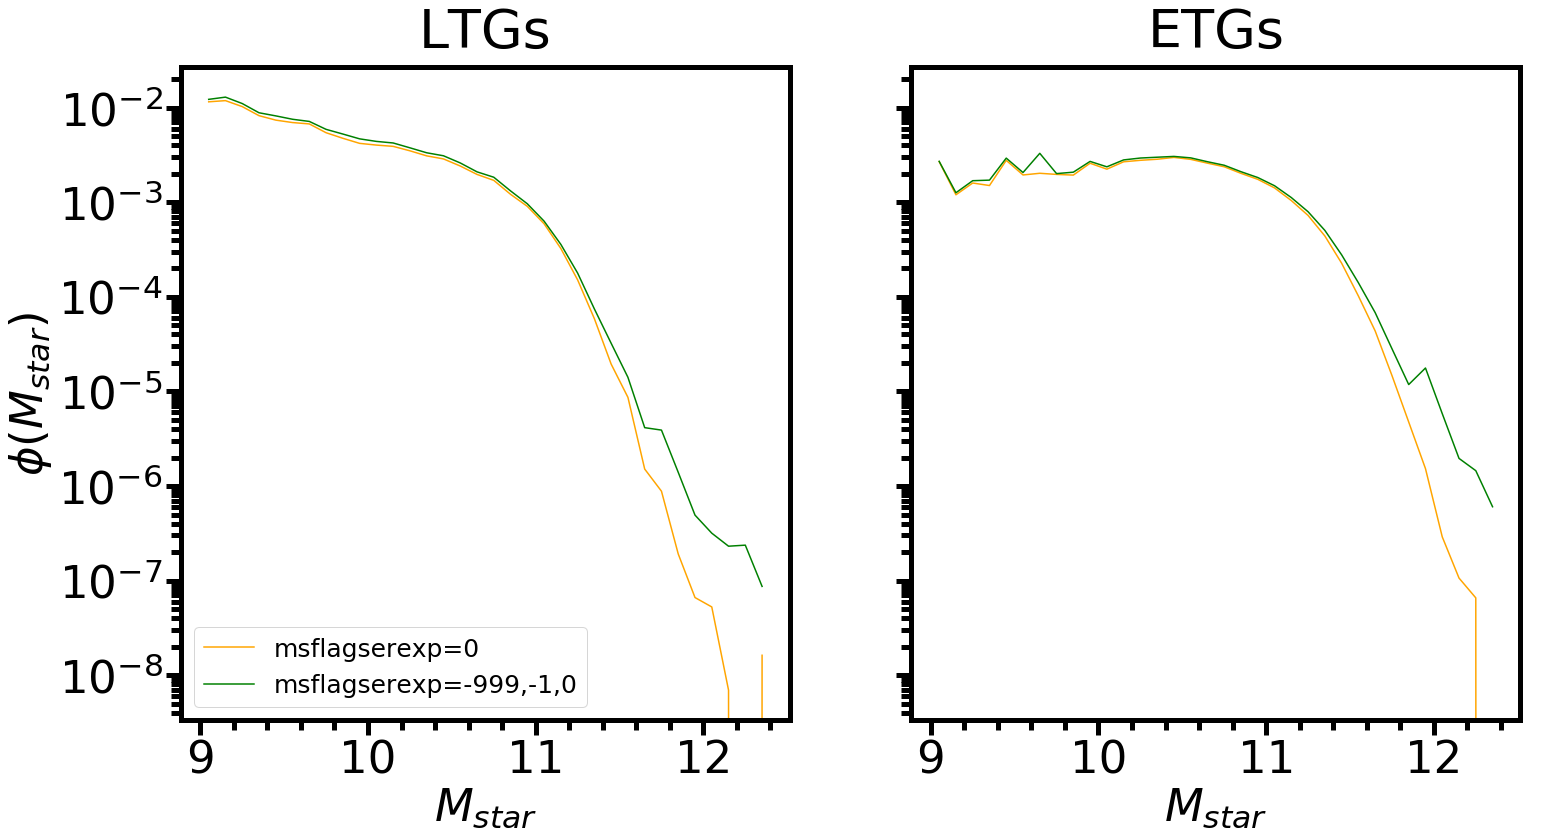

In [61]:
bins = np.arange(9,12.5,0.1)
bb = bins[1:]-0.05
hist_noflagL = np.histogram(df_noflag[df_noflag.TType>0].MsMendSerExp, bins, weights = df_noflag[df_noflag.TType>0].Vmaxwt)[0]
hist_noflagE = np.histogram(df_noflag[df_noflag.TType<0].MsMendSerExp, bins, weights = df_noflag[df_noflag.TType<0].Vmaxwt)[0]
hist_0L = np.histogram(df_flag0[df_flag0.TType>0].MsMendSerExp, bins, weights = df_flag0[df_flag0.TType>0].Vmaxwt)[0]
hist_0E = np.histogram(df_flag0[df_flag0.TType<0].MsMendSerExp, bins, weights = df_flag0[df_flag0.TType<0].Vmaxwt)[0]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24,12),sharey=True)

ax1.plot(bb, hist_0L/fracsky_flag0/0.1, label='msflagserexp=0', color='orange')
ax1.plot(bb, hist_noflagL/fracsky_flag0/0.1, label='msflagserexp=-999,-1,0', color='green')
ax2.plot(bb, hist_0E/fracsky_flag0/0.1, label='msflagserexp=0', color='orange')
ax2.plot(bb, hist_noflagE/fracsky_flag0/0.1, label='msflagserexp=-999,-1,0', color='green')
ax1.legend(fontsize=25)
ax1.set_yscale('log')
ax1.set_ylabel('$\phi(M_{star})$')
ax1.set_xlabel('$M_{star}$')
ax2.set_xlabel('$M_{star}$')
ax1.set_title('LTGs')
ax2.set_title('ETGs')
#ax1.set_xlim(-18,-26)
#ax2.set_xlim(-18,-26)
plt.savefig('/home/lorenzo/Pictures/test_msflagserexp_morph_mstar.png')


# check completeness of quality flags for phot fits

In [22]:
df_noflag = pd.read_csv('new_catalog_morph_Modelmag_noflags.dat', delim_whitespace=True)

df_flags = pd.read_csv('new_catalog_morph_goodcomponents_R80_Modelmag.dat', delim_whitespace=True)#new_catalog_morph_goodcomponents_R80_Modelmag.dat', delim_whitespace=True)#'#('completeness_goodcomponents.csv')

In [23]:
len(df_noflag), len(df_flags)

(516376, 428527)

In [24]:
df_noflag = df_noflag[df_noflag.Vmaxwt>0]
fracper=len(df_noflag)/670722
skycov=8000.
fracsky_noflag=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

df_flags = df_flags[df_flags.Vmaxwt>0]
fracper=len(df_flags)/670722
skycov=8000.
fracsky_flags=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

(-18, -26)

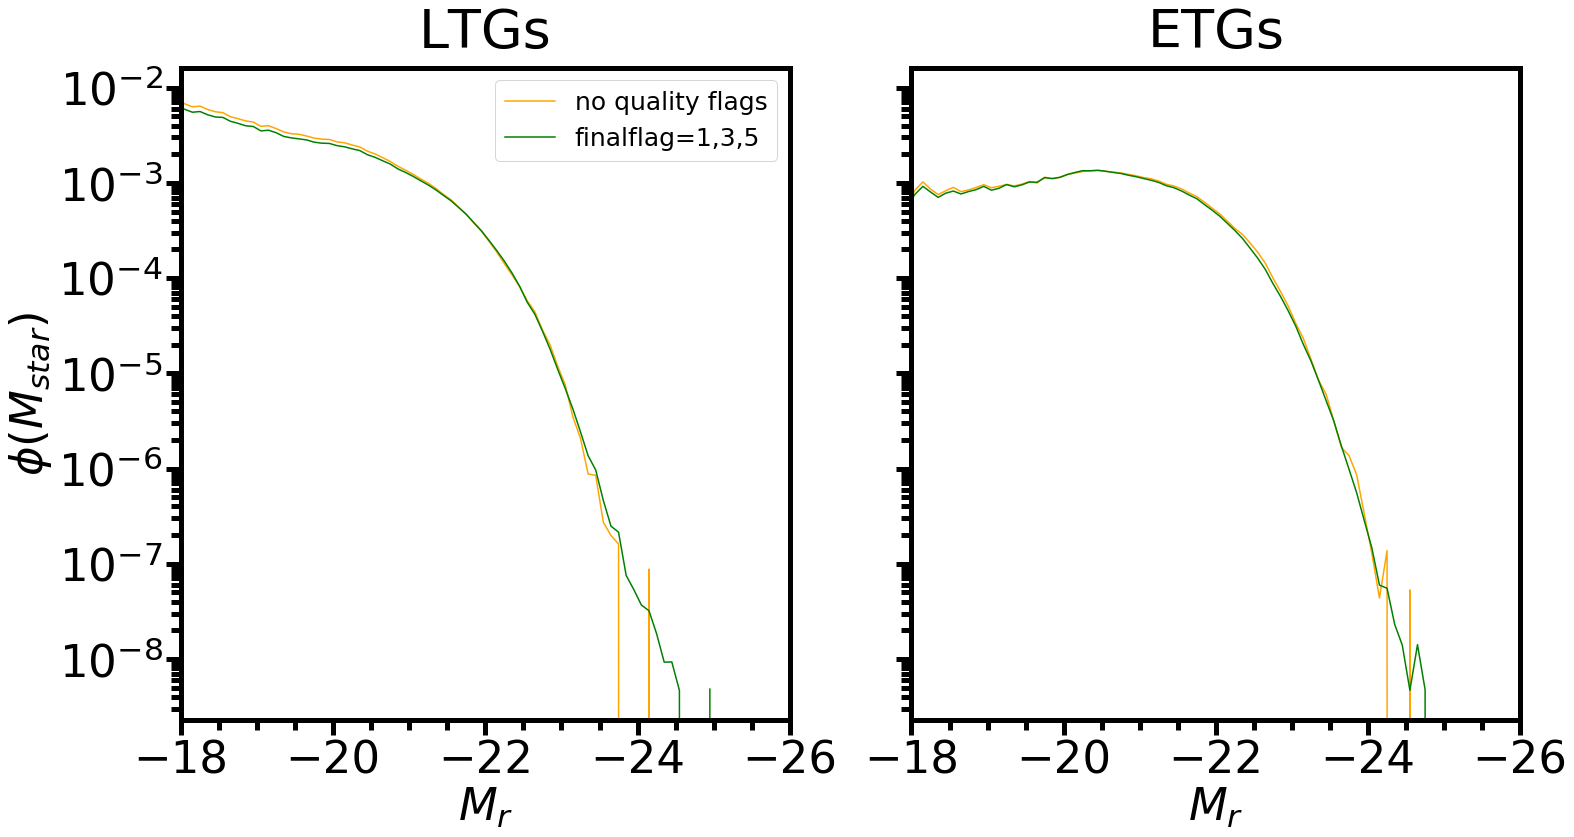

In [25]:
bins = np.arange(-25,-17,0.1)
bb = bins[1:]-0.05
hist_noflagL = np.histogram(df_noflag[df_noflag.TType>0].AbsModel.values, bins=bins,weights = df_noflag[df_noflag.TType>0].Vmaxwt)[0]
hist_noflagE = np.histogram(df_noflag[df_noflag.TType<0].AbsModel.values, bins=bins,weights = df_noflag[df_noflag.TType<0].Vmaxwt)[0]
hist_0L = np.histogram(df_flags[df_flags.TType>0].AbsModel.values,bins=bins, weights = df_flags[df_flags.TType>0].Vmaxwt)[0]
hist_0E = np.histogram(df_flags[df_flags.TType<0].AbsModel.values,bins=bins, weights = df_flags[df_flags.TType<0].Vmaxwt)[0]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24,12),sharey=True)

ax1.plot(bb, hist_0L/fracsky_flags/0.1, label='no quality flags', color='orange')
ax1.plot(bb, hist_noflagL/fracsky_noflag/0.1, label='finalflag=1,3,5', color='green')
ax2.plot(bb, hist_0E/fracsky_flags/0.1, label='no quality flags', color='orange')
ax2.plot(bb, hist_noflagE/fracsky_noflag/0.1, label='finalflag=1,3,5', color='green')
ax1.legend(fontsize=25)
ax1.set_yscale('log')
ax1.set_ylabel('$\phi(M_{star})$')
ax1.set_xlabel('$M_{r}$')
ax2.set_xlabel('$M_{r}$')
ax1.set_title('LTGs')
ax2.set_title('ETGs')
ax1.set_xlim(-18,-26)
ax2.set_xlim(-18,-26)


#ax1.set_xlim(-18,-26)
#ax2.set_xlim(-18,-26)

In [ ]:
# check

In [19]:
df.finalflag.unique()

array([3, 5, 1])

In [2]:
df = pd.read_csv('./Catalog_SDSS_complete.dat',delim_whitespace=True)

9860 7038


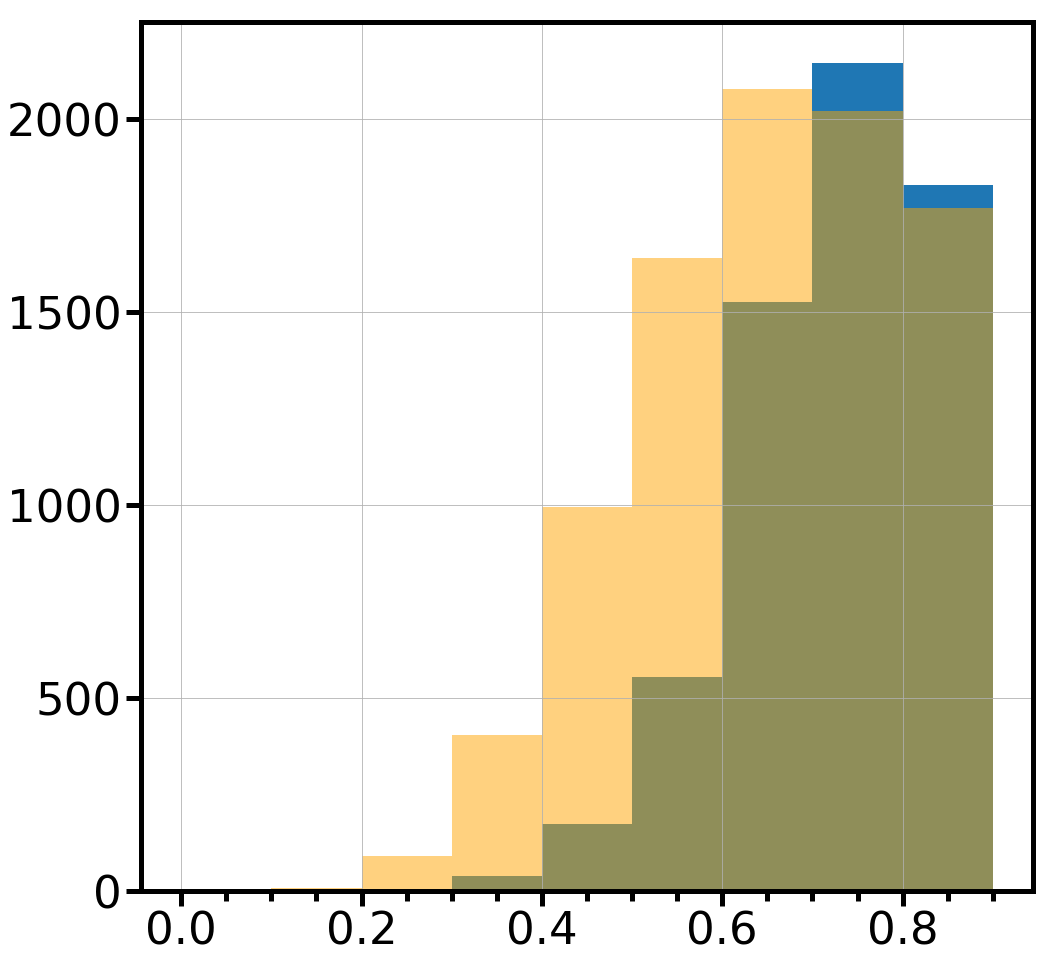

In [16]:
fig,ax = plt.subplots(1,1)
df_ = df.query('logReSerExp>1.0 & TType<=0 & finalflag==1 & MsMendSerExp>11. & MsMendSerExp<11.5 & finalflag==1')#.plot.scatter('logReSerExp','ba_tot', ax=ax)
#df.query('logReSerExp>0 & MsMendSerExp>11. & MsMendSerExp<11.5 & finalflag==1').scatter( ax=ax, color='orange', alpha=0.5)
df_1 = df.query('logReSerExp>1.0 & TType<=0 & finalflag==3 & MsMendSerExp>11. & MsMendSerExp<11.5 ')#.plot.scatter('logReSerExp','ba_tot', ax=

import seaborn as sns
#ns.regplot('logReSerExp','ba_tot', data=df_, ax=ax)
#x = np.arange(-2,2)
#plt.plot(x,x)
print(len(df_1), len(df_))
df_.ba_tot.hist(bins=np.arange(0,1,0.1), ax=ax)
df_1.ba_tot.hist(bins=np.arange(0,1,0.1), ax=ax, color='orange', alpha=0.5)

In [11]:
df = df[(df.logR80>df.logReSerExp) &(df.MsMendSerExp>9)]

AttributeError: 'DataFrame' object has no attribute 'logR80'

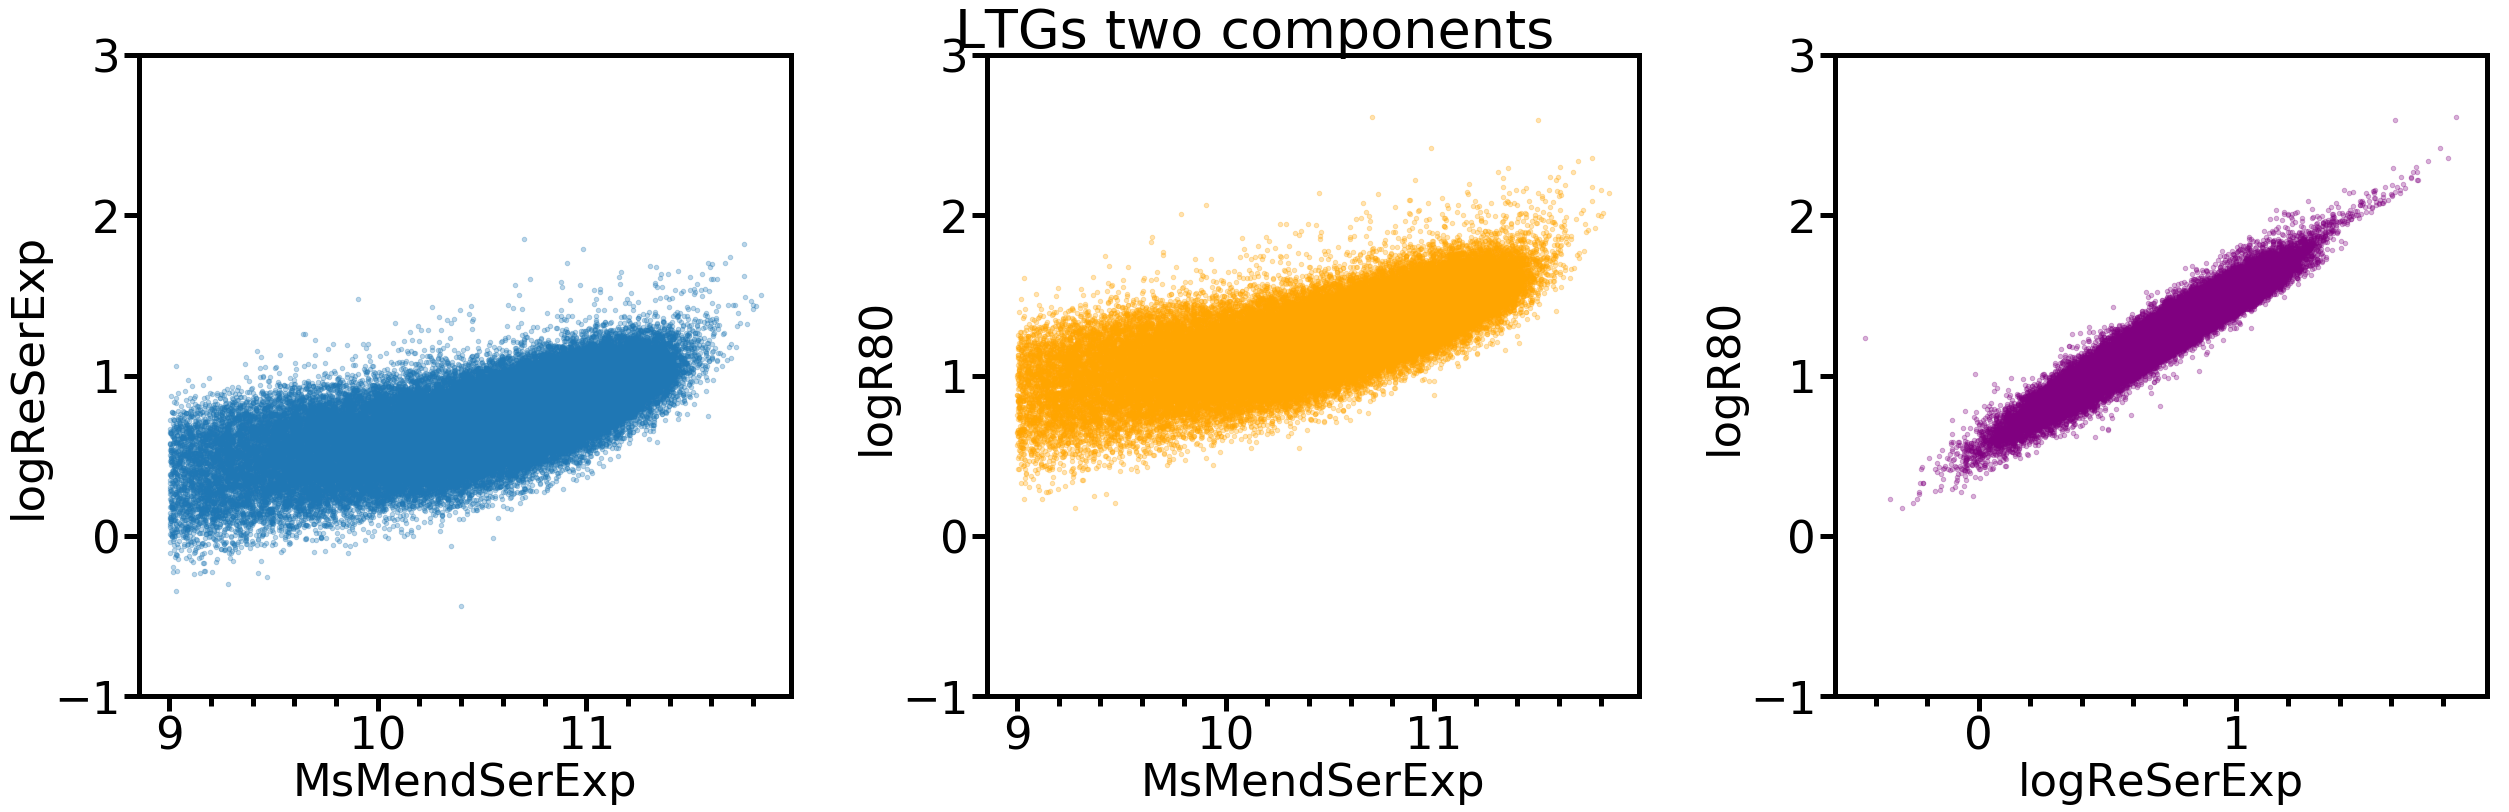

In [6]:
fig, (ax1,ax2,ax3)= plt.subplots(1,3, figsize=(36,12))
df.query('TType>0 & finalflag==5').plot.scatter('MsMendSerExp','logReSerExp',ax=ax1,alpha=0.3)
df.query('TType>0 & finalflag==5').plot.scatter('MsMendSerExp','logR80',ax=ax2, color='orange',alpha=0.3)
df.query('TType>0 & finalflag==5').plot.scatter('logReSerExp','logR80',ax=ax3, color='purple',alpha=0.3)

ax1.set_ylim(-1,3)
ax2.set_ylim(-1,3)
ax3.set_ylim(-1,3)
plt.tight_layout()
fig.suptitle('ETGs one component')
plt.savefig('/home/lorenzo/Pictures/PaperSize/R80ReMstar_ETGs_onecomponent.png')
plt.close()

fig, (ax1,ax2,ax3)= plt.subplots(1,3, figsize=(36,12))
df.query('TType>0 & finalflag==3').plot.scatter('MsMendSerExp','logReSerExp',ax=ax1,alpha=0.3)
df.query('TType>0 & finalflag==3').plot.scatter('MsMendSerExp','logR80',ax=ax2, color='orange',alpha=0.3)
df.query('TType>0 & finalflag==3').plot.scatter('logReSerExp','logR80',ax=ax3, color='purple',alpha=0.3)

ax1.set_ylim(-1,3)
ax2.set_ylim(-1,3)
ax3.set_ylim(-1,3)
plt.tight_layout()
fig.suptitle('LTGs two components')
plt.savefig('/home/lorenzo/Pictures/PaperSize/R80ReMstar_LTGs_twocomponents.png')

#
#plt.ylim(-0.5,3)

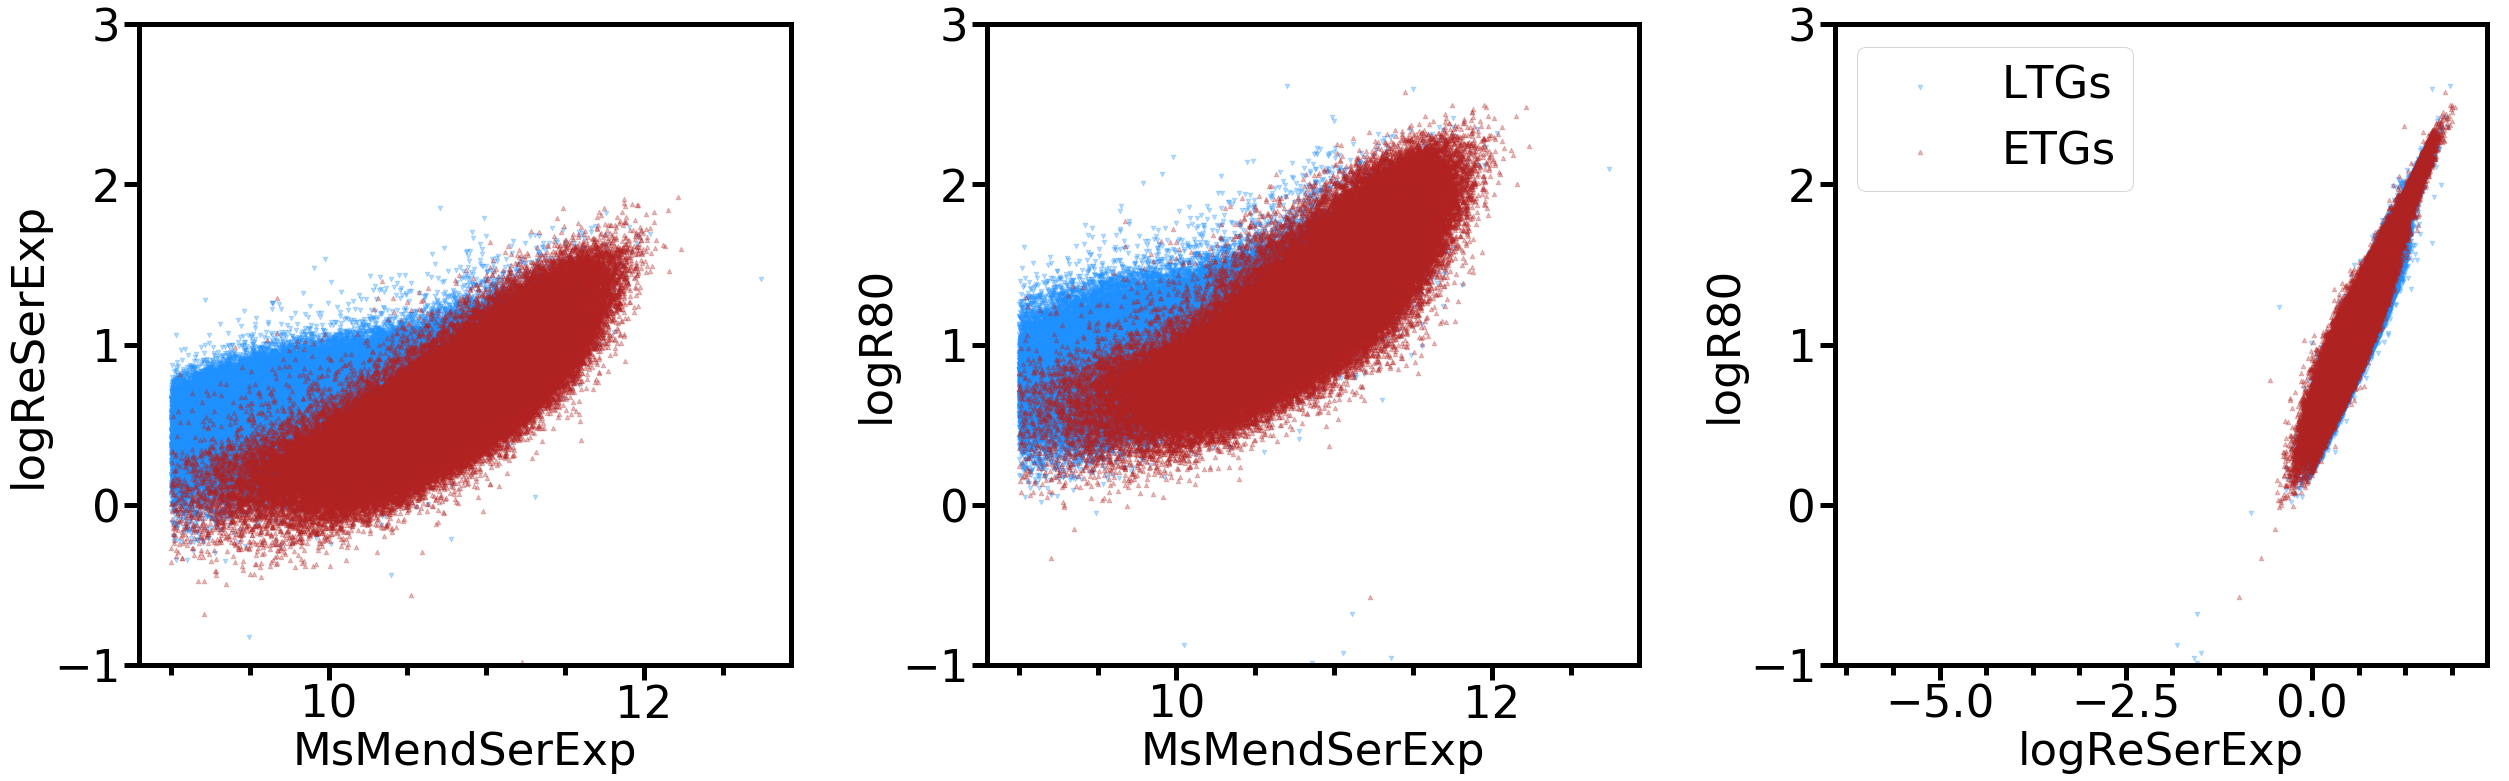

In [7]:
fig, (ax1,ax2,ax3)= plt.subplots(1,3, figsize=(36,12))
df.query('TType>0').plot.scatter('MsMendSerExp','logReSerExp',ax=ax1,alpha=0.3, color='dodgerblue',marker='v')
df.query('TType>0').plot.scatter('MsMendSerExp','logR80',ax=ax2, color='dodgerblue',alpha=0.3, marker='v')
df.query('TType>0').plot.scatter('logReSerExp','logR80',ax=ax3, color='dodgerblue',alpha=0.3,marker='v', label='LTGs')


df.query('TType<0').plot.scatter('MsMendSerExp','logReSerExp',ax=ax1,alpha=0.3,color='firebrick',marker='^')
df.query('TType<0').plot.scatter('MsMendSerExp','logR80',ax=ax2, color='firebrick',alpha=0.3,marker='^')
df.query('TType<0').plot.scatter('logReSerExp','logR80',ax=ax3, color='firebrick',alpha=0.3,marker='^', label='ETGs')
ax1.set_ylim(-1,3)
ax2.set_ylim(-1,3)
ax3.set_ylim(-1,3)
plt.tight_layout()
#fig.suptitle('LTGs two components')
plt.savefig('/home/lorenzo/Pictures/PaperSize/R80ReMstar.png')

#
#plt.ylim(-0.5,3)

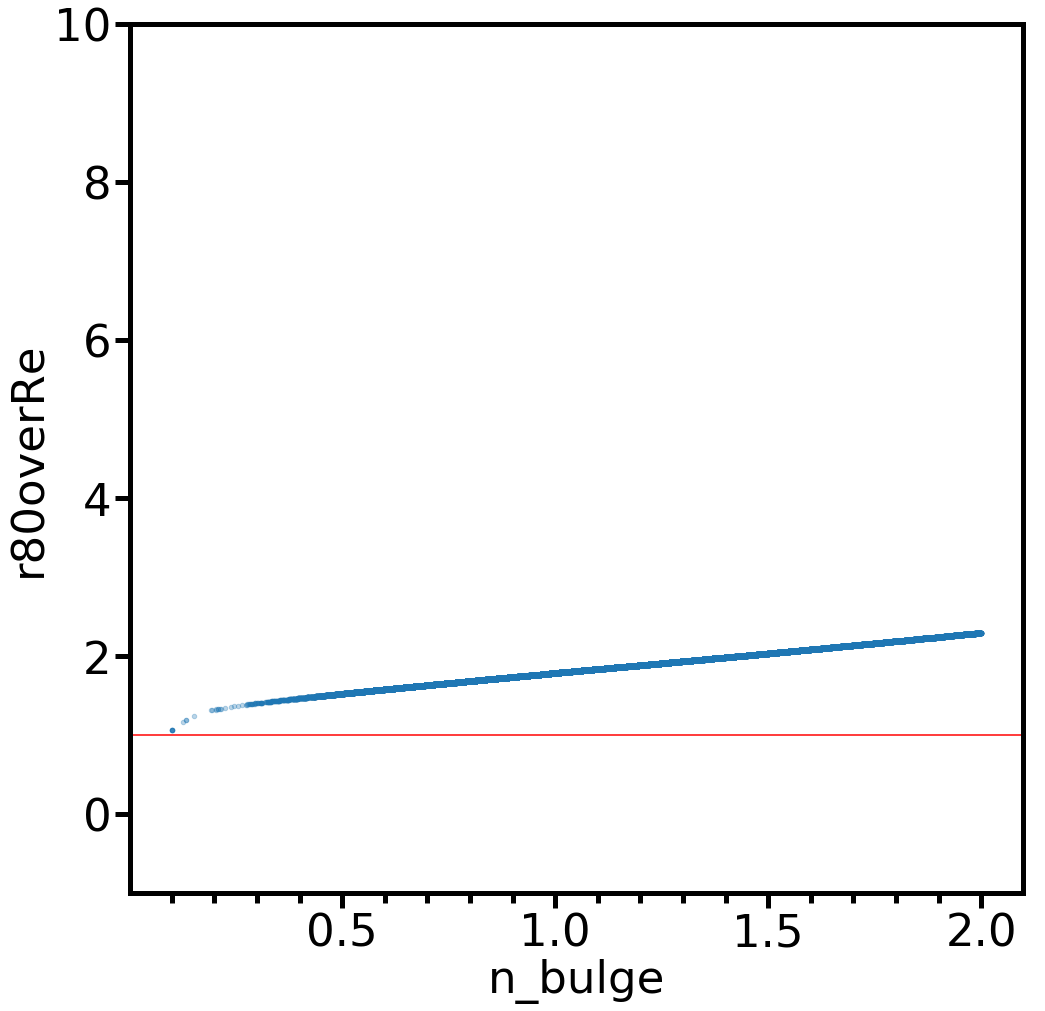

In [14]:
df['r80overRe'] = 10**df.logR80NotTrunc/10**df.logReSerExp
df.query('finalflag==5').plot.scatter('n_bulge','r80overRe',alpha=0.3)
plt.axhline(1, color='red')
plt.ylim(-1,10)
plt.savefig('/home/lorenzo/Pictures/PaperSize/R80overRe_onecomp.png')

In [7]:
df[df['r80overRe']<1].galcount.nunique()/len(df)

0.018157548999246254

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40,40)})

In [8]:
df_ = df.query('finalflag==3')[df.r80overRe<1]

/home/lorenzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


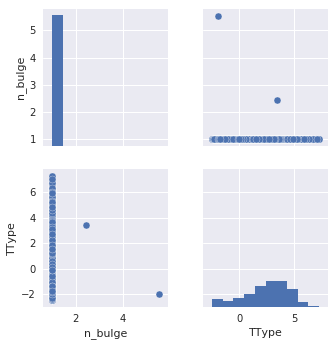

In [9]:
sns.pairplot(data=df_[['n_bulge','TType']])
plt.savefig('/home/lorenzo/Pictures/PaperSize/R80overRe_less_than_1.png')

 # check corrections to R80 

In [24]:
df = df[(df.logR80NotTrunc>df.logReSerExp) &(df.MsMendSerExp>9) & (df.logReSerExp!=-999)]
df['corr'] = df['logReSerExp']-df['logReSerExpNotTrunc']
df['logR80NotTrunc'] = df['logR80NotTrunc'] + df['corr']

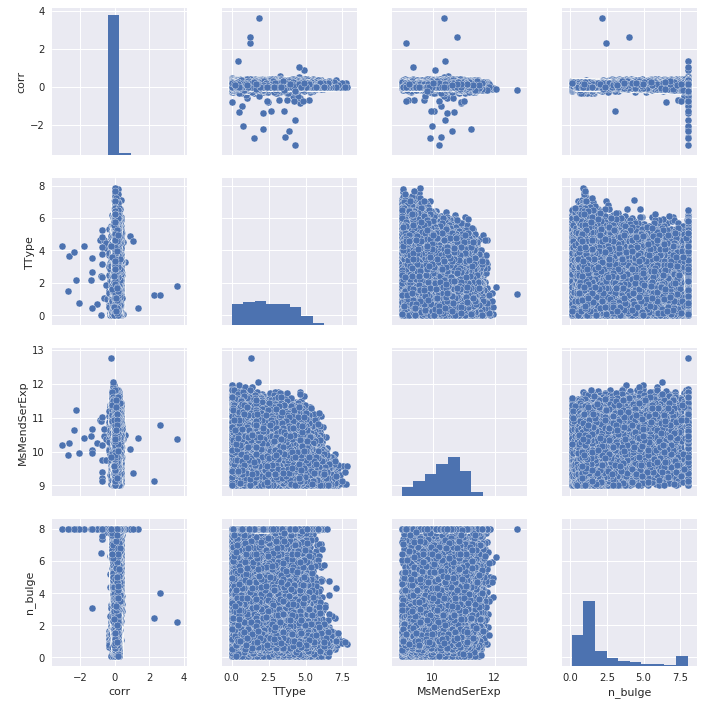

In [25]:
df_ = df[df.TType>0]
sns.pairplot(data=df_[['corr','TType','MsMendSerExp', 'n_bulge']])

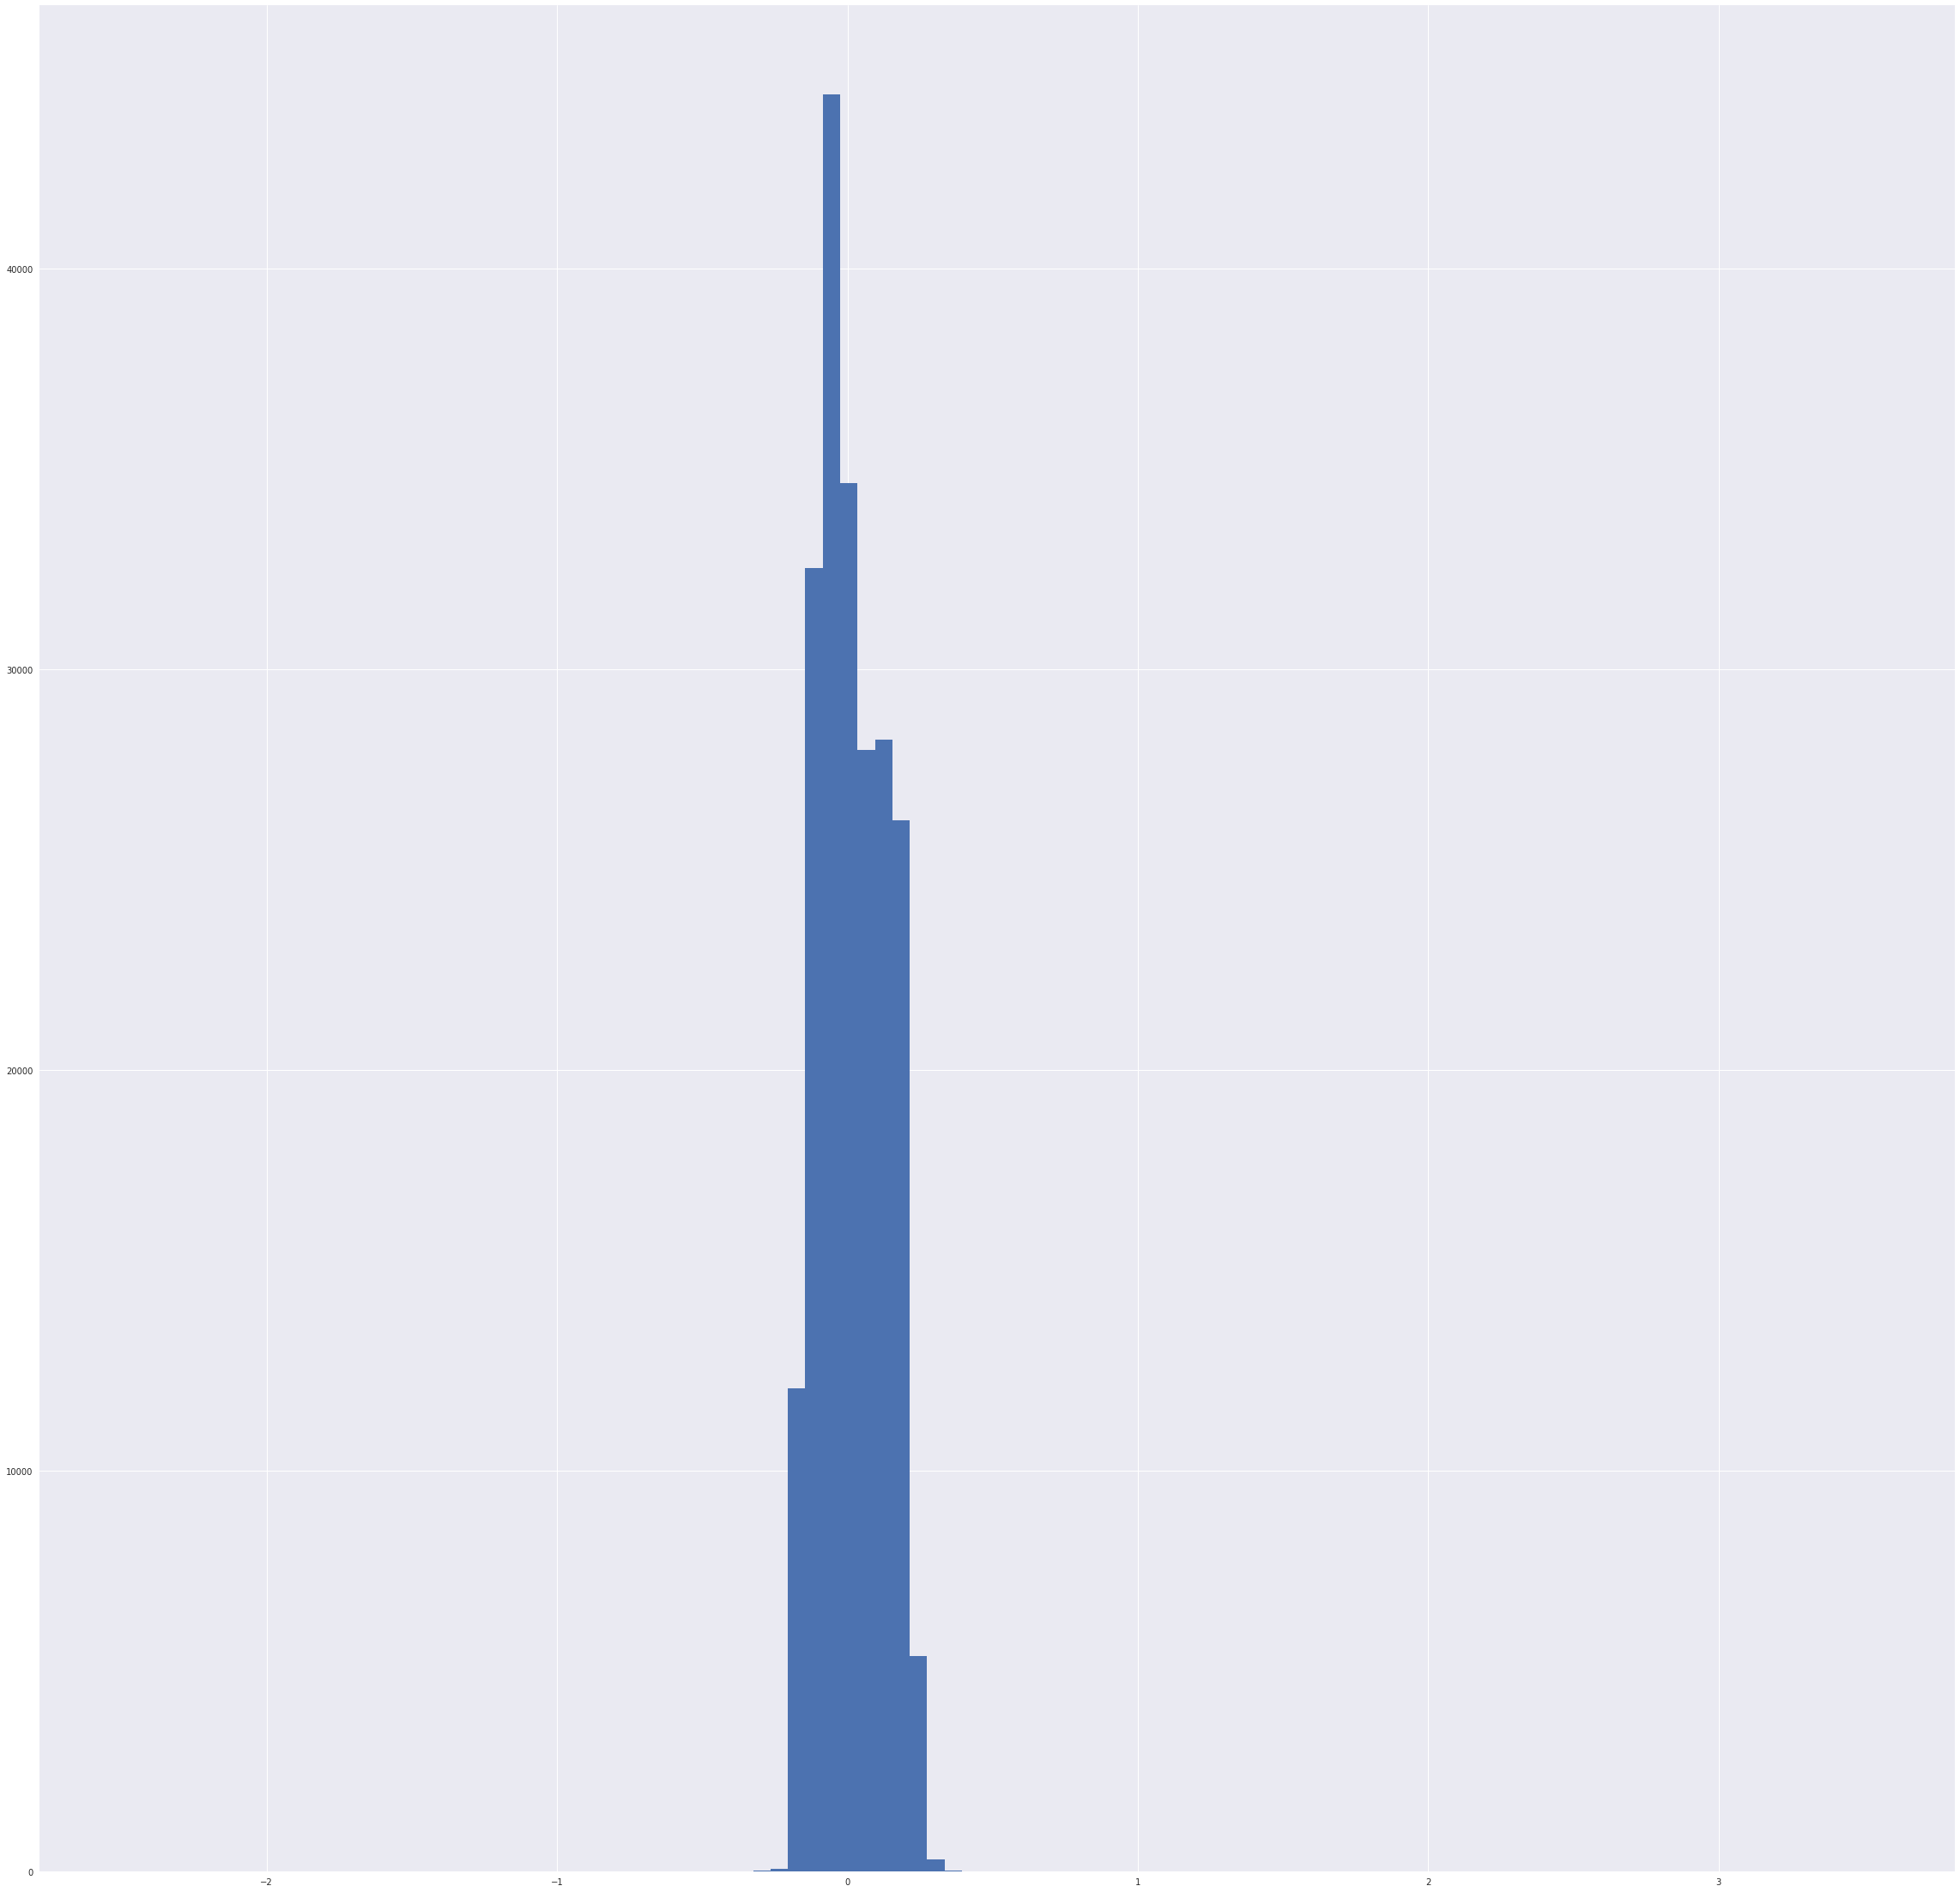

In [29]:
df_ = df[df.TType<0]
df_['corr'].hist(bins=100)

In [29]:
df = pd.read_csv('./new_catalog_morph_Jay_Rmaj.dat')
dfE = df[df.TType<=0]
dfL = df[df.TType>0]
dfL['ba_tot'] = dfL['ba_tot'].apply(np.sqrt)
dfm = df[(df.MsMendSerExp>11.5) & (df.MsMendSerExp<12)]

/home/lorenzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(dfm.MsMendSerExp.values,dfm.logReSerExpCirc.values)

In [34]:
10**0.2

1.5848931924611136

In [24]:
a = [dfL.MsMendSerExp<9.5, (dfL.MsMendSerExp>10.5) & (dfL.MsMendSerExp<11)]

In [28]:
for info in a:
    print(np.cov(dfL[info].logReSerExp, np.sqrt(dfL[info].ba_tot)))

[[ 0.05946711 -0.00648181]
 [-0.00648181  0.00828943]]
[[ 0.02595202 -0.00185211]
 [-0.00185211  0.00757346]]


In [27]:
0.06+0.022-0.01

0.072

In [2]:
SDSS_Plots(11,15,0.1, 'cleaned').test_BT_TType_correlation()

/home/lorenzo/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


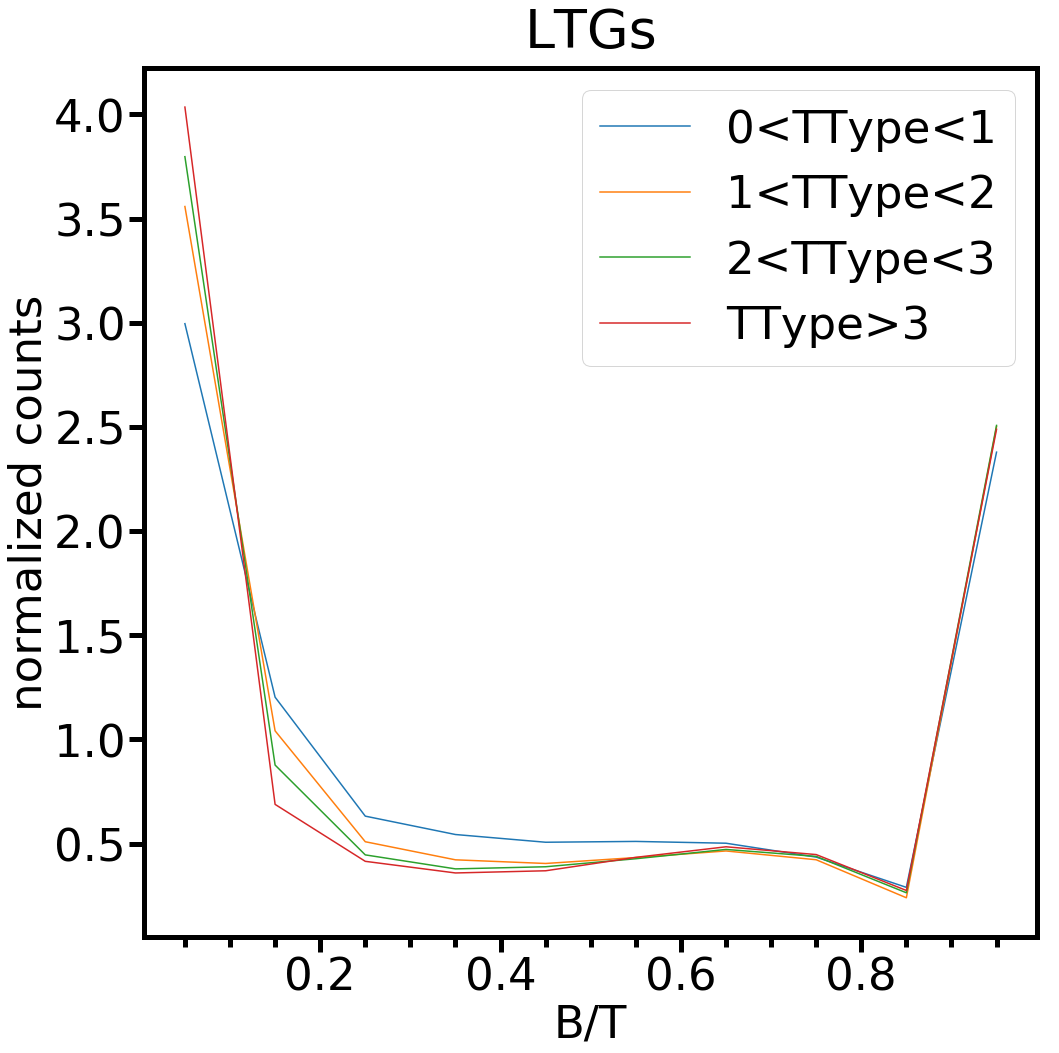

In [6]:
TTypebins = [0,1,2,3,10]
btstrings = ['0<TType<1','1<TType<2','2<TType<3','TType>3','TType>4']
    
for j in range(len(TTypebins)-1):
        tt = 0.5*(TTypebins[j]+TTypebins[j+1])
        x,y = np.loadtxt('./BT_TTypes/LTGs_test_BT_TType_correlation_TType'+str(tt)+'.txt',unpack=True)
        plt.plot(x,y, label=btstrings[j])
plt.legend()
plt.xlabel('B/T')
plt.ylabel('normalized counts')
plt.title('LTGs')

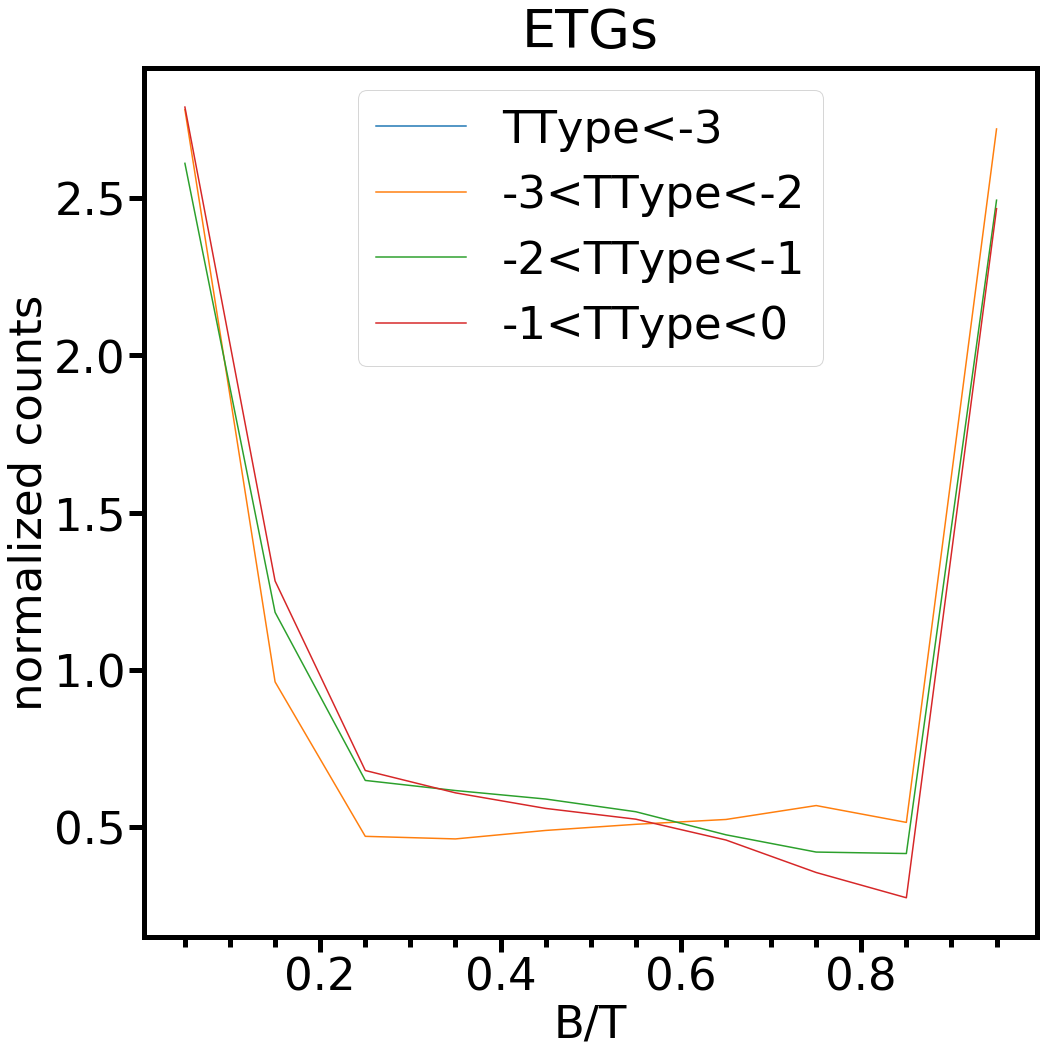

In [7]:
TTypebins =  [-10,-3,-2,-1,0]
btstrings = ['TType<-3','-3<TType<-2','-2<TType<-1','-1<TType<0']
    
for j in range(len(TTypebins)-1):
        tt = 0.5*(TTypebins[j]+TTypebins[j+1])
        x,y = np.loadtxt('./BT_TTypes/ETGs_test_BT_TType_correlation_TType'+str(tt)+'.txt',unpack=True)
        plt.plot(x,y, label=btstrings[j])
plt.legend()
plt.xlabel('B/T')
plt.ylabel('normalized counts')
plt.title('ETGs')

In [10]:
names=['LCentSat','MCentSat','MhaloM','MhaloL','z','Mmod','Vmaxwt']

df_yang = pd.read_csv('YangCatWithVmax.dat', names=names, skiprows=1, delim_whitespace=True)
df_yang=df_yang[df_yang.Vmaxwt>0]

In [11]:
fracper_Y = len(df_yang)/639359
skycov=8000.
fracsky_Y=(skycov*fracper_Y)/(4*np.pi*(180./np.pi)**2.)#

In [2]:
            Header = ['galcount','z','Vmaxwt','MsMendSerExp','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','TType','P_S0']
        
            df_serexp = pd.read_csv('./new_catalog_morph_Jay.dat', header = None, names = Header, skiprows = 1, usecols=(0,1,2,3,5,6,7,10,11,12,18,19),delim_whitespace = True)

            fracper=0.724
            skycov=8000.
            fracskyold=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

In [16]:
df = df_serexp[(df_serexp.MsMendSerExp.values>10.5) & (df_serexp.MsMendSerExp.values<12)]

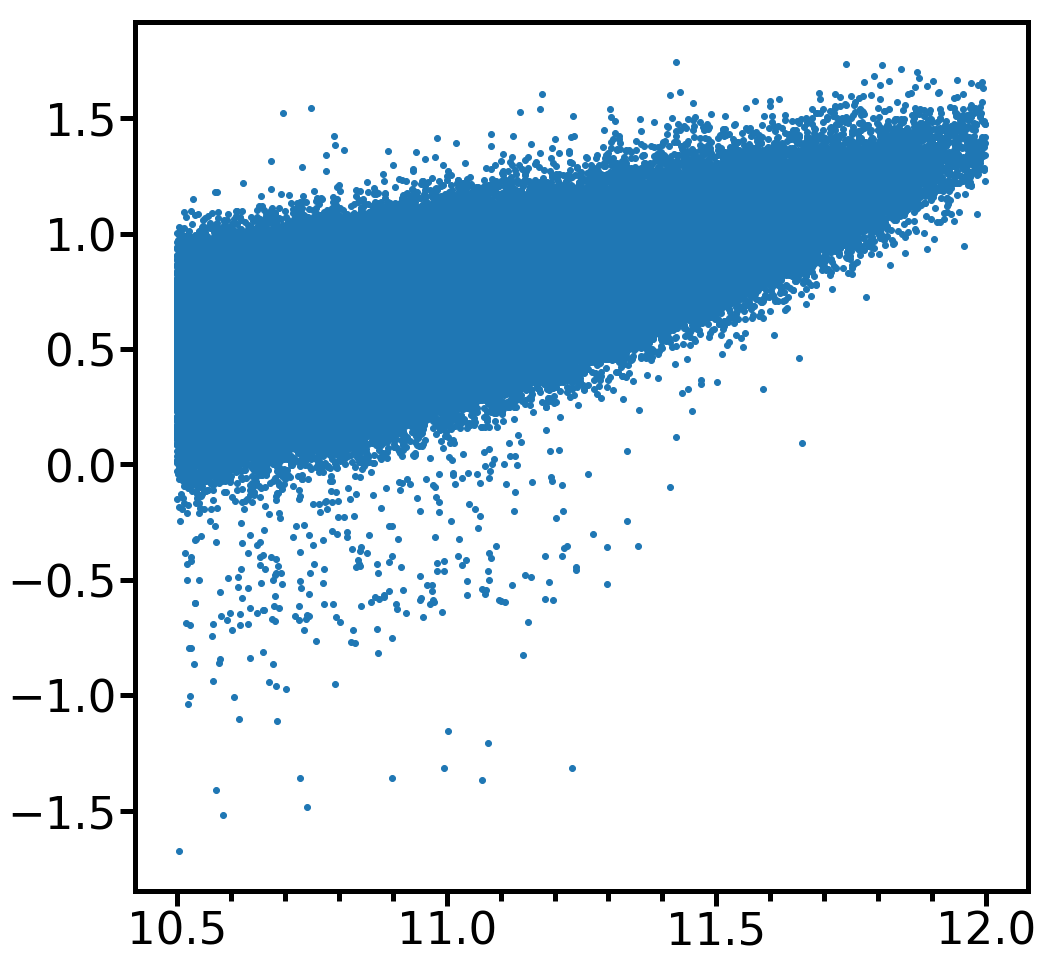

In [17]:
plt.scatter(df.MsMendSerExp.values, df.logReSerExp.values)

In [15]:
10**(np.percentile(df.logReSerExp.values,50))

6.44021367245747

In [13]:
names= ['galcount','finalflag','zMeert','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','probaE','probaEll',
                                 'probaS0','probaSab','probaScd','TType','P_S0',
                               'veldisp','veldisperr','ra','dec']

df_Model = pd.read_csv('new_catalog_ModelMagYangCorr.dat', names=names, skiprows=1, delim_whitespace=True)
df_Model=df_Model[df_Model.Vmaxwt>0]
df_Model =df_Model[df_Model.AbsMag!=-999.]
fracper=len(df_Model)/670722
skycov=8000.
fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)#


In [14]:
yangcen = df_yang[df_yang.LCentSat==1]
yangsat =df_yang[df_yang.LCentSat==2]

Meertcen = df_Model[df_Model.NewLCentSat==1]
Meertsat = df_Model[df_Model.NewLCentSat ==0]

In [8]:
len(df_yang)

617976

In [18]:
bins=np.arange(-25,-10,0.1)

histcen_yang =np.histogram(yangcen.Mmod.values, bins=bins, 
                           weights=yangcen.Vmaxwt.values)[0]
histsat_yang =np.histogram(yangsat.Mmod.values, bins=bins, 
                           weights=yangsat.Vmaxwt.values)[0]

histcen_Meert = np.histogram(Meertcen.AbsMag.values, bins=bins,
                            weights=Meertcen.Vmaxwt.values)[0]
histsat_Meert = np.histogram(Meertsat.AbsMag.values, bins=bins,
                            weights=Meertsat.Vmaxwt.values)[0]

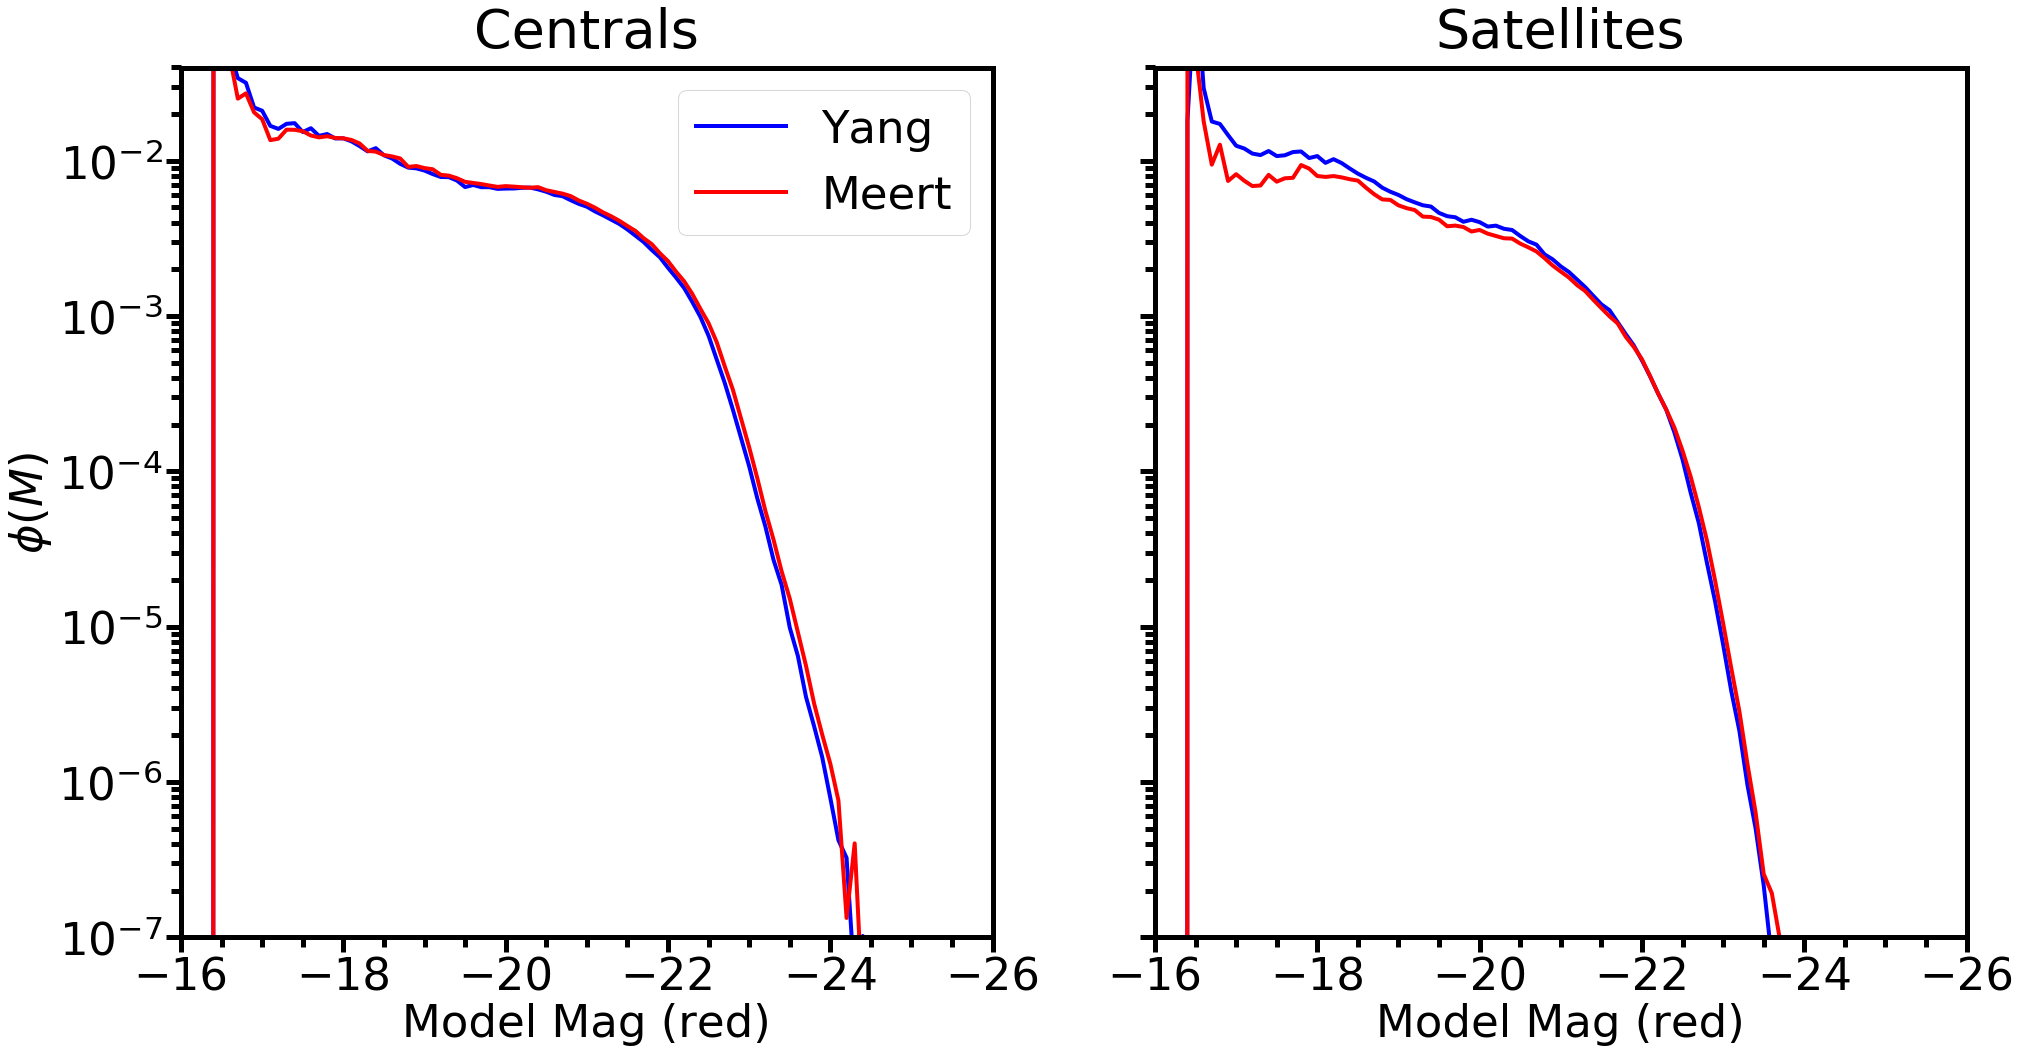

In [20]:
fig,(ax1,ax2) =plt.subplots(1,2,sharey=True,figsize=(32,16))
ax1.plot(bins[1:]-1.,histcen_yang/0.1/fracsky_Y,label='Yang',lw=4,color='blue')
ax1.plot(bins[1:]-1.,histcen_Meert/0.1/fracsky, label='Meert',lw=4,color='red')
ax1.set_yscale('log')
ax1.legend()
ax1.set_xlim(-16,-26)
ax1.set_ylim(1.e-7,10**-1.4)
ax2.plot(bins[1:]-1.,histsat_yang/0.1/fracsky_Y,lw=4,color='blue')
ax2.plot(bins[1:]-1.,histsat_Meert/0.1/fracsky, label='Meert',lw=4,color='red')
ax2.set_yscale('log')
ax2.set_xlim(-16,-26)
ax2.set_ylim(1.e-7,10**-1.4)
ax1.set_ylabel('$\phi (M)$')
ax1.set_xlabel('Model Mag (red)')
ax2.set_xlabel('Model Mag (red)')
ax1.set_title('Centrals')
ax2.set_title('Satellites')
plt.savefig('/home/lorenzo/Pictures/CenSat_check.pdf')

In [21]:
censSerexp = df_serexp[df_serexp.NewLCentSat==1]
satsSerexp = df_serexp[df_serexp.NewLCentSat==0]

In [ ]:
h = np.histogram(Meertcen.MsMendSerExp.values,bins=np.arange(9,12.5,0.1),
                weights=Meertcen.Vmaxwt.values)[0]

h1 = np.histogram(censSerexp.MsMendSerExp.values,bins=np.arange(9,12.5,0.1), weights=censSerexp.Vmaxwt.values)[0]
plt.plot(np.arange(9,12.5,0.1)[1:], h/0.1/fracsky)
plt.plot(np.arange(9,12.5,0.1)[1:], h1/0.1/fracskyold)
plt.yscale('log')

In [ ]:
plt.scatter(Meertcen.MsMendSerExp.values, Meertcen.AbsMag.values)
plt.axvline(x=10)
#plt.plot(np.arange(8,12),np.repeat(-19,4))
#plt.savefig('/home/lorenzo/Pictures/check.pdf')

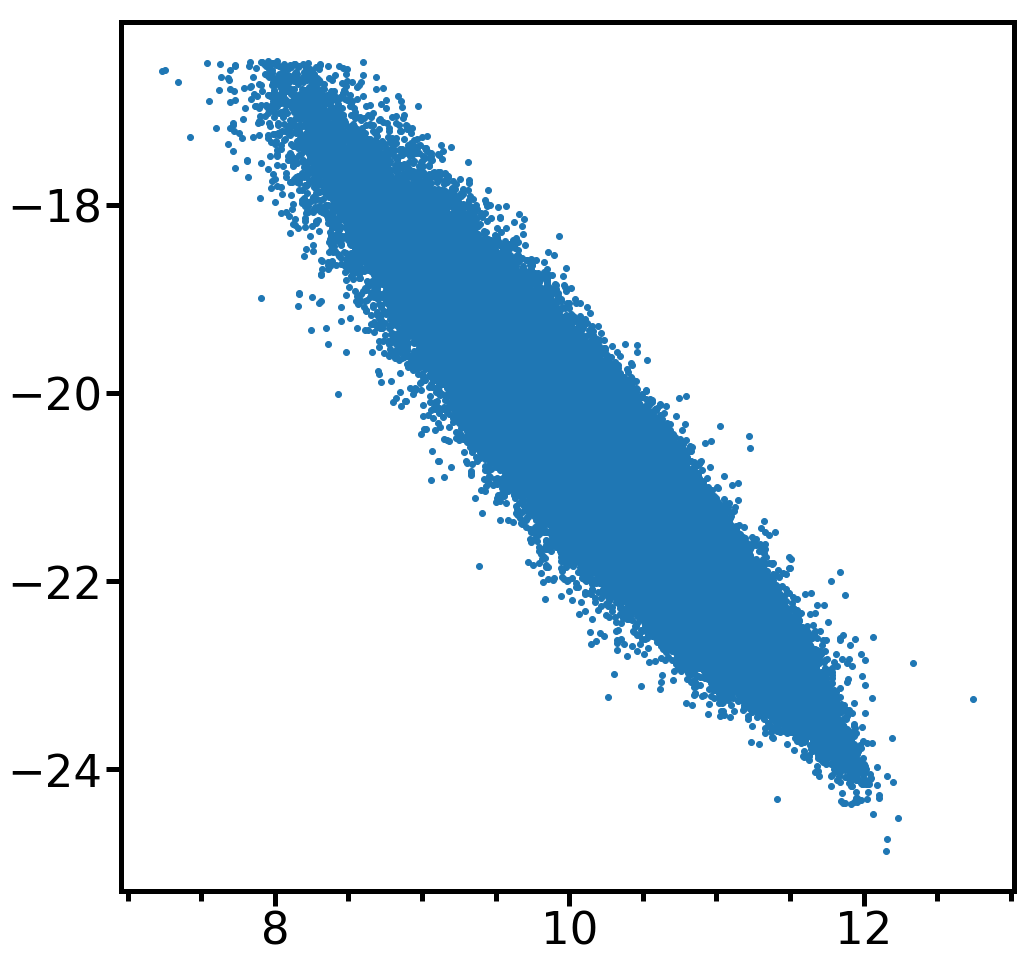

In [16]:
plt.scatter(Meertcen.MsMendSerExp.values, Meertcen.AbsMag.values-1)
#plt.axvline(x=10)
#plt.plot(np.arange(8,12),np.repeat(-19,4))
#plt.savefig('/home/lorenzo/Pictures/check.pdf')

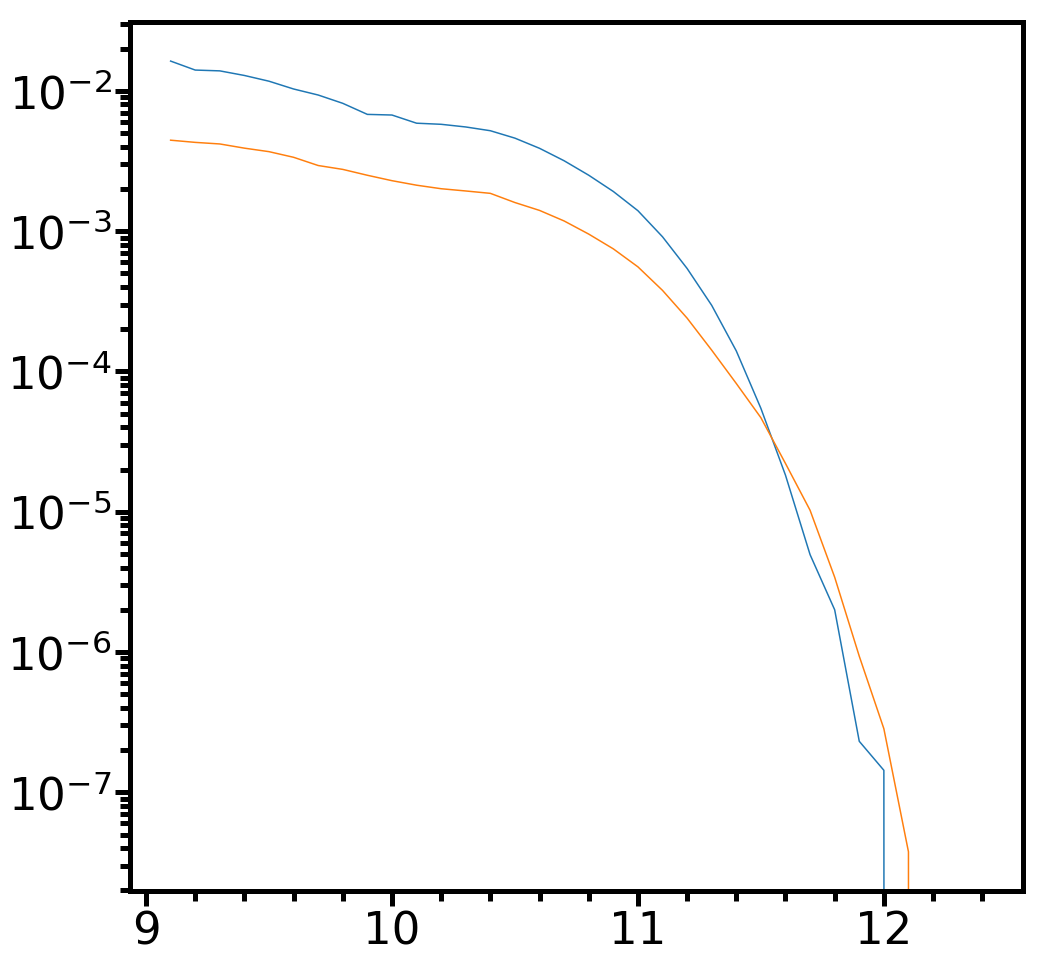

In [23]:
h = np.histogram(Meertsat.MsMendSerExp.values,bins=np.arange(9,12.5,0.1),
                weights=Meertsat.Vmaxwt.values)[0]

h1 = np.histogram(satsSerexp.MsMendSerExp.values,bins=np.arange(9,12.5,0.1), weights=satsSerexp.Vmaxwt.values)[0]
plt.plot(np.arange(9,12.5,0.1)[1:], h/0.1/fracsky)
plt.plot(np.arange(9,12.5,0.1)[1:], h1/0.1/fracskyold)
plt.yscale('log')

In [9]:
mlow= [9.,9.5,10.,10.5,11.,11.5]
mup= [9.5,10.,10.5,11.,11.5,12.]
#mlow=np.arange(9,12.4,0.1)
#mup=mlow+0.1
Re_MstarLTGs=np.zeros((len(mlow),3))
Re_MstarETGs=np.zeros((len(mlow),3))
k=0

for i, j in zip(mlow,mup) :

  #  Re_MstarLTGs[k], Re_MstarETGs[k]=SDSS_Plots(11,15,0.1).size_functions(SM_LB=i, SM_UB=j,
   #                                                                       compute_SMR=True,
    #                                                                     make_plots=False,
     #                                                                    saved=False)
    #SM_LB=11.5; SM_UB=12.
    
    #SDSS_Plots(11,15,0.1).size_functions(SM_LB=i, SM_UB=j,
             #                                                compute_SMR=False,
             #                                                            make_plots=False,
             #                               saved=True)             
   
    SDSS_Plots(11,15,0.1, string='original').sizefunctions_pruned( i,j, return_Jackknife=True,use_astropy=True, choice='logReSerExp')    #SDSS_Plots(11,15,0.1,string='original').sizefunctions_pruned_morph_TTypebins( i,j)#,return_Jackknife=True,use_astropy=True)
    #plt.yscale('log')
        #SDSS_Plots(11,15,0.1,string='cleaned').sizefunctions_pruned( i,j,return_Jackknife=True,use_astropy=True)
    #sm = (i+j)/2.
    #plt.savefig('sizefunct_morph'+str(sm)+'.png')
#print('total')
#print(k)
    #sm = (SM_UB+SM_LB)/2.
#plt.ylim(10**(-7.5),10**(-Re_MstarETGs
#Re_MstarETGs=Re_MstarETGs.T
#Re_MstarLTGs=Re_MstarLTGs.T
#plt.savefig('sizefunct_morph'+str(sm)+'.png')
#plt.savefig('sizefunct_massbins_comparisonHC-DS.png')

176
0
50
232
0
50
696
0
50
1126
0
50
272
0
50
0
0
50


In [3]:
df = pd.read_csv('./new_catalog_morph_flag_finalflag_Rmaj.dat',delim_whitespace=True)
df.columns

Index(['galcount', 'finalflag', 'z', 'Vmaxwt', 'MsMendSerExp', 'AbsMag',
       'logReSerExp', 'logReSerExpCirc', 'BT', 'n_bulge', 'ba_tot',
       'NewLCentSat', 'NewMCentSat', 'MhaloL', 'probaE', 'probaEll', 'probaS0',
       'probaSab', 'probaScd', 'TType', 'P_S0'],
      dtype='object')

In [16]:
for i in range(len(Msbins)-1):
    print(k,j)
    #hist_ETGs, poiserrETGs,bins_okETGs, hist_LTGs, poiserrLTGs,bins_okLTGs, hist_S0s,    poiserrS0s,bins_okS0s  = \
    #SDSS_Plots(11,15,0.1).sizefunctions_pruned_and_S0s(SM_LB=Msbins[i], SM_UB=Msbins[i+1])
    print(hist_ETGs)

In [17]:
print(Msbins)

[12.]


In [2]:
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
def chi(obs, sigma,mod):
    return np.sum((obs-mod)**2/sigma**2)

0 0
[1.26590595e-05 2.71737159e-05 4.78351574e-05 8.59983671e-05
 7.63699180e-05 6.87487312e-05 3.31831571e-05 1.29739606e-05
 2.44045295e-06] E
[2.45904798e-05 1.37705231e-04 4.25738263e-04 8.91123011e-04
 1.31197752e-03 1.39876873e-03 1.08001290e-03 5.69558139e-04
 2.03620491e-04 6.03228534e-05 9.00895056e-06] S0
[1.26590595e-05 2.71737159e-05 4.78351574e-05 8.59983671e-05
 7.63699180e-05 6.87487312e-05 3.31831571e-05 1.29739606e-05
 2.44045295e-06]
0 1
[1.10615627e-06 4.00890072e-06 1.37440696e-05 4.26450821e-05
 1.15529343e-04 2.03238690e-04 2.07250962e-04 1.32393742e-04
 5.92108865e-05 2.02651970e-05 3.35871590e-06] E
[5.09330189e-06 3.11329005e-05 1.26398612e-04 4.00858805e-04
 7.92546822e-04 1.21763326e-03 1.34681567e-03 1.13754082e-03
 6.59902341e-04 2.71592419e-04 7.15945582e-05 1.34596014e-05] S0
[1.10615627e-06 4.00890072e-06 1.37440696e-05 4.26450821e-05
 1.15529343e-04 2.03238690e-04 2.07250962e-04 1.32393742e-04
 5.92108865e-05 2.02651970e-05 3.35871590e-06]
1 0
[7.767785

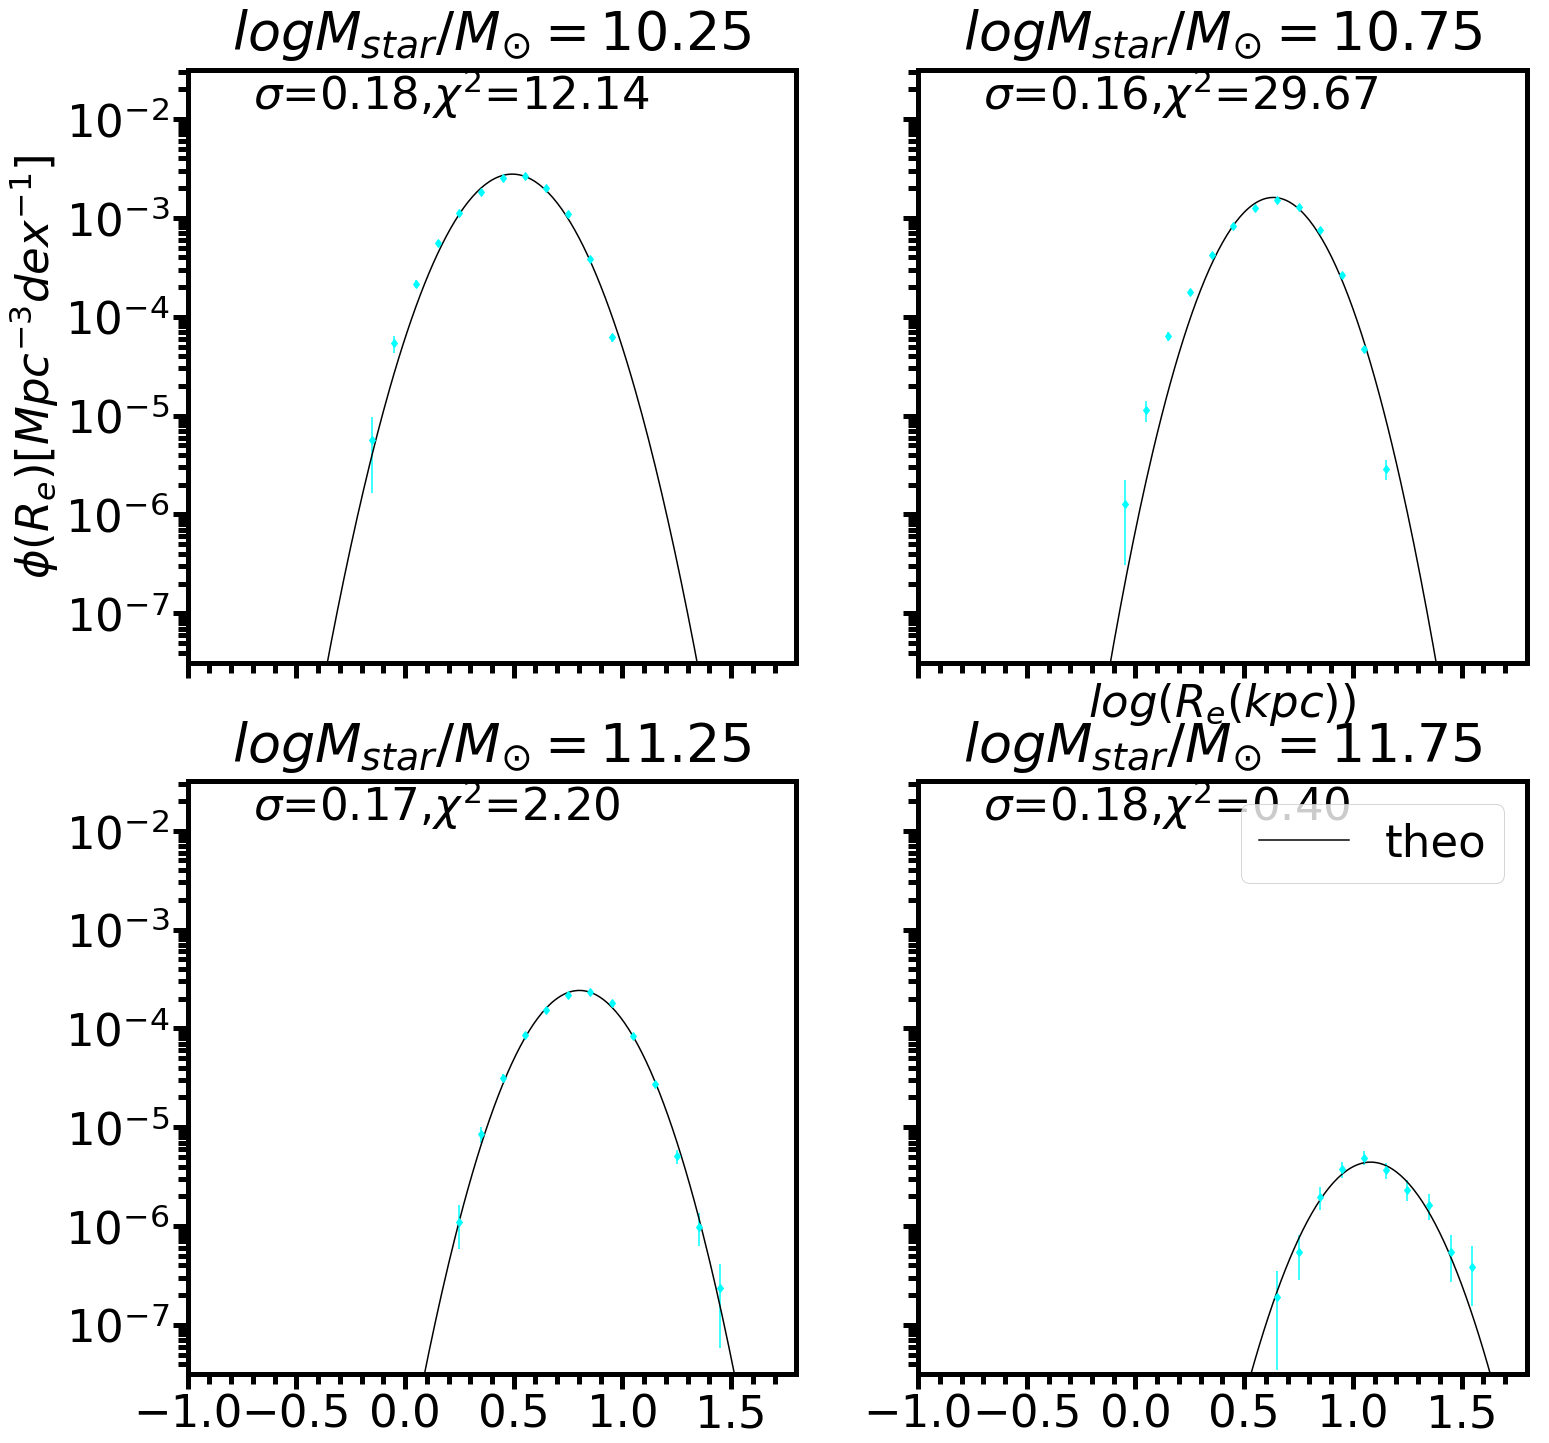

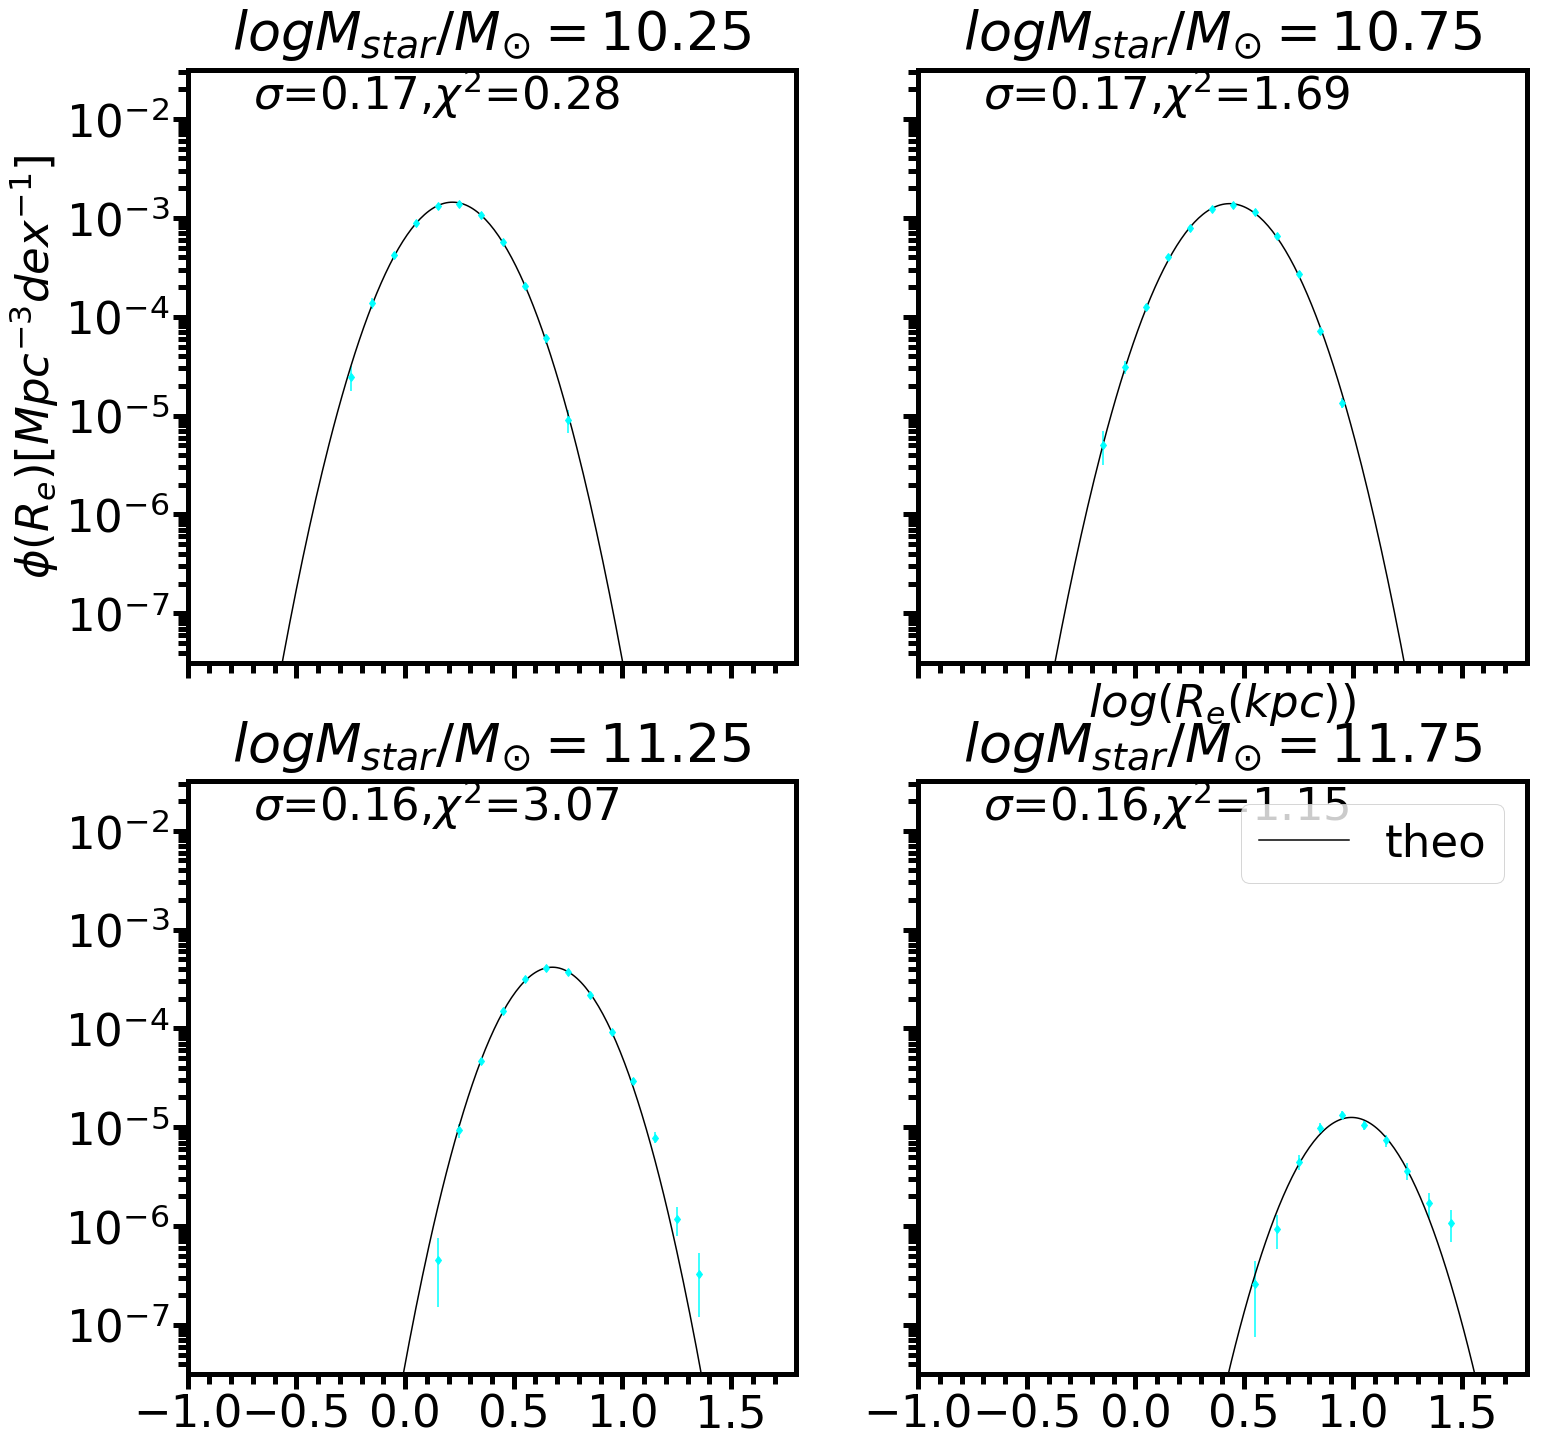

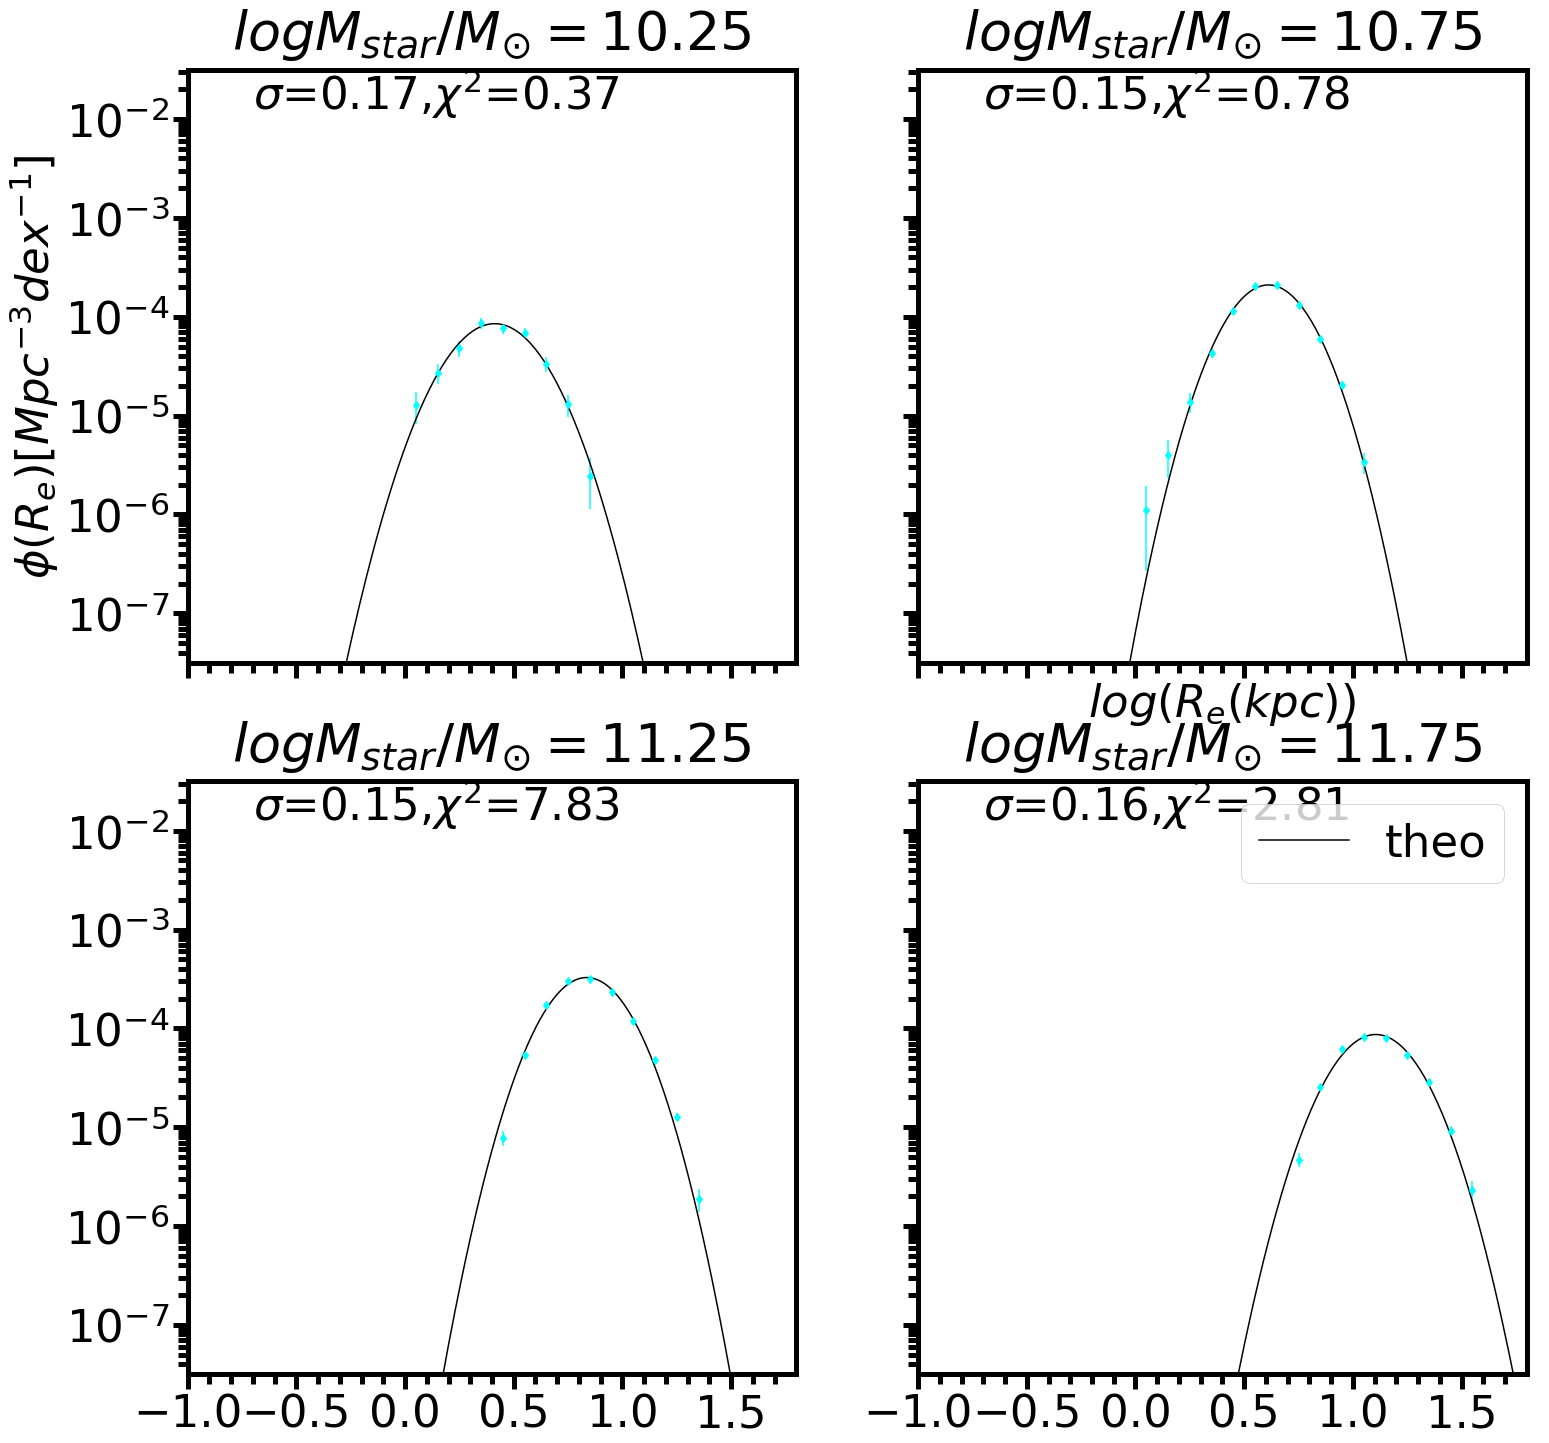

In [24]:
Msbins=np.arange(10,12.5,0.5)
ReBins=np.arange(-1,1.7,0.1)

sigma_in= 0.2
mu_in = np.linspace(0.3,1, len(Msbins))

params_ETGs=[]
params_LTGs=[]
params_S0s=[]
fig1, ax1 = plt.subplots(2,2,figsize=(24,24), sharey=True,sharex=True)
fig2, ax2 = plt.subplots(2,2,figsize=(24,24), sharey=True,sharex=True)
fig3, ax3 = plt.subplots(2,2,figsize=(24,24), sharey=True,sharex=True)

k=0;j=0

for i in range(len(Msbins)-1):
    print(k,j)
    hist_ETGs, poiserrETGs,bins_okETGs, hist_LTGs, poiserrLTGs,bins_okLTGs, hist_S0s,    poiserrS0s,bins_okS0s  = \
    SDSS_Plots(11,15,0.1).sizefunctions_pruned_and_S0s(SM_LB=Msbins[i], SM_UB=Msbins[i+1])
    print(hist_ETGs)
    M = max(hist_LTGs)
    poiserrLTGs += poiserrLTGs
    popt,cov = curve_fit(Gauss, bins_okLTGs,   hist_LTGs, sigma=poiserrLTGs,p0=[M,mu_in[i],sigma_in] )
    params_LTGs.append(popt)
  #  popt,cov = curve_fit(Gauss, bins_okETGs,   hist_ETGs, sigma=poiserrETGs,p0=[M,mu_in[i],sigma_in] )
  #  params_ETGs.append(popt)
    x= np.arange(-1.7,2,0.01)
    y = Gauss(x, *popt)
    ymod = Gauss(bins_okLTGs,*popt)
    chisq =chi(hist_LTGs, poiserrLTGs,ymod)
    ax1[k][j].plot(x,y , label='theo', color='black')
    ax1[k][j].errorbar(bins_okLTGs,   hist_LTGs, yerr=poiserrLTGs, fmt='d', color='cyan')
    ax1[k][j].set_yscale('log')
    ax1[k][j].set_ylim(10**-7.5,10**-1.5)
    ax1[k][j].text(-0.7, 10**-1.9, '$\sigma$={:3.2f},$\chi^2$={:3.2f}'.format(popt[2],chisq/len(hist_LTGs)))
    ax1[k][j].set_title('$log M_{star}/M_{\odot} =$'+str((Msbins[i]+Msbins[i+1])/2))
    
 
    M = max(hist_S0s)
    poiserrS0s += poiserrS0s
    popt,cov = curve_fit(Gauss, bins_okS0s,   hist_S0s, sigma=poiserrS0s,p0=[M,mu_in[i],sigma_in] )
    params_S0s.append(popt)
  #  popt,cov = curve_fit(Gauss, bins_okETGs,   hist_ETGs, sigma=poiserrETGs,p0=[M,mu_in[i],sigma_in] )
  #  params_ETGs.append(popt)
    x= np.arange(-1.7,2,0.01)
    y = Gauss(x, *popt)
    ymod = Gauss(bins_okS0s,*popt)
    chisq =chi(hist_S0s, poiserrS0s,ymod)
    ax2[k][j].plot(x,y , label='theo', color='black')
    ax2[k][j].errorbar(bins_okS0s,   hist_S0s, yerr=poiserrS0s, fmt='d', color='cyan')
    ax2[k][j].set_yscale('log')
    ax2[k][j].set_ylim(10**-7.5,10**-1.5)
    ax2[k][j].text(-0.7, 10**-1.9, '$\sigma$={:3.2f},$\chi^2$={:3.2f}'.format(popt[2],chisq/len(hist_S0s)))
    ax2[k][j].set_title('$log M_{star}/M_{\odot} =$'+str((Msbins[i]+Msbins[i+1])/2))
    
    
    M = max(hist_ETGs)
    poiserrETGs += poiserrETGs
    popt,cov = curve_fit(Gauss, bins_okETGs,   hist_ETGs, sigma=poiserrETGs,p0=[M,mu_in[i],sigma_in] )
    params_ETGs.append(popt)
  #  popt,cov = curve_fit(Gauss, bins_okETGs,   hist_ETGs, sigma=poiserrETGs,p0=[M,mu_in[i],sigma_in] )
  #  params_ETGs.append(popt)
    x= np.arange(-1.7,2,0.01)
    y = Gauss(x, *popt)
    ymod = Gauss(bins_okETGs,*popt)
    chisq =chi(hist_ETGs, poiserrETGs,ymod)
    ax3[k][j].plot(x,y , label='theo', color='black')
    ax3[k][j].errorbar(bins_okETGs,   hist_ETGs, yerr=poiserrETGs, fmt='d', color='cyan')
    ax3[k][j].set_yscale('log')
    ax3[k][j].set_ylim(10**-7.5,10**-1.5)
    ax3[k][j].text(-0.7, 10**-1.9, '$\sigma$={:3.2f},$\chi^2$={:3.2f}'.format(popt[2],chisq/len(hist_ETGs)))
    ax3[k][j].set_title('$log M_{star}/M_{\odot} =$'+str((Msbins[i]+Msbins[i+1])/2))
    
    
    
    
    if (i==0 and j==0) or (i==1 and j==0) :
        ax1[k][j].set_ylabel('$\phi(R_e)[Mpc^{-3}dex^{-1}]$')
        ax2[k][j].set_ylabel('$\phi(R_e)[Mpc^{-3}dex^{-1}]$')
        ax3[k][j].set_ylabel('$\phi(R_e)[Mpc^{-3}dex^{-1}]$')
    if (i ==1 ):
        ax1[k][j].set_xlabel('$log(R_e (kpc))$')
        ax1[k][j].set_xlim(-1,1.8)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
        ax1[k][j].set_xticks(np.arange(-1,2,0.5))
        
        ax2[k][j].set_xlabel('$log(R_e (kpc))$')
        ax2[k][j].set_xlim(-1,1.8)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
        ax2[k][j].set_xticks(np.arange(-1,2,0.5))
        
        ax3[k][j].set_xlabel('$log(R_e (kpc))$')
        ax3[k][j].set_xlim(-1,1.8)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
        ax3[k][j].set_xticks(np.arange(-1,2,0.5))
    j+=1
    
    if(j==2):
        k+=1
        j=0    
ax1[1][1].legend()
ax2[1][1].legend()
ax3[1][1].legend()
fig1.savefig('/home/lorenzo/Pictures/Gaussfits_LTGs.pdf')
fig3.savefig('/home/lorenzo/Pictures/Gaussfits_ETGs.pdf')
fig2.savefig('/home/lorenzo/Pictures/Gaussfits_S0s.pdf')
   # popt,cov = curve_fit(Gauss, bins_okLTGs,   hist_LTGs, sigma=poiserrLTGs,p0=[M,mu_in[i],sigma_in] )
   # params_LTGs.append(popt)

2.289842624144802 1 0.2
[2.36086341 1.13204914 0.17001712] [[ 1.04629961e-03 -1.56962186e-08 -5.02678845e-05]
 [-1.56962186e-08  7.23360330e-06  2.49352302e-09]
 [-5.02678845e-05  2.49352302e-09  7.24081718e-06]]


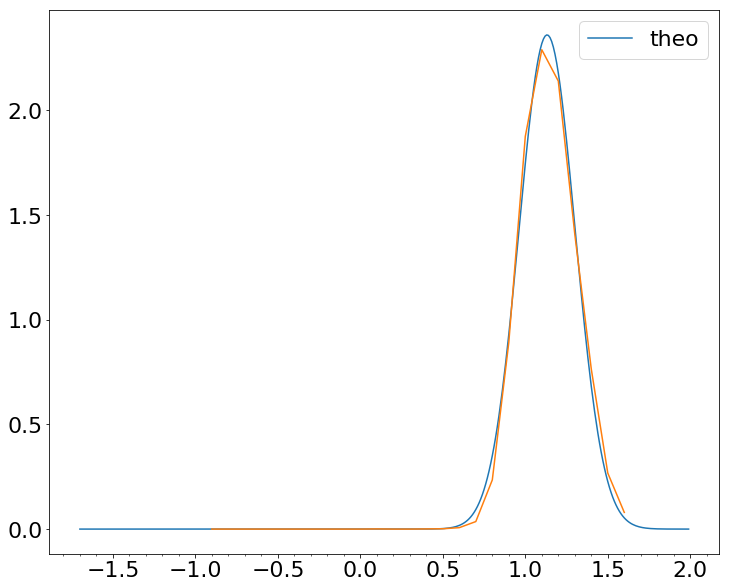

In [19]:
ReBins=np.arange(-1,1.7,0.1)


#theo= norm.pdf(x=ReBins, loc=0.35, scale=0.23)
print(M,mu,sigma)
popt,cov = curve_fit(Gauss, ReBins[1:], a[5], p0=[M,mu,sigma] )
x= np.arange(-1.7,2,0.01)
y = Gauss(x, *popt)
plt.plot(x,y , label='theo')
#for i in range(len(Msbins)-1):
print(popt,cov)
plt.plot(ReBins[1:], a[5])
plt.legend()

In [ ]:
mstar,phi,err=np.loadtxt('./SMF/SMF_alloriginal.txt', unpack=True)
me,phie,erre=np.loadtxt('./SMF/SMF_ETGS_TToriginal.txt', unpack=True)
ml,phil,errl=np.loadtxt('./SMF/SMF_LTGS_TToriginal.txt', unpack=True)

In [1]:
SDSS_Plots(11,15,0.1).SMF(f=0.1,nsteps=500)
plt.errorbar(mstar,phi,err, color='black', fmt='o', alpha=0.3, label='original')
plt.errorbar(me,phie,erre, color='red', fmt='^', alpha=0.3)
plt.errorbar(ml,phil,errl, color='blue', fmt='v', alpha=0.3)

plt.yscale('log')
plt.xlim(8.95,12.8)
plt.ylabel('$\phi(M_{star})$')
plt.xlabel('$logM_{star}$')
plt.savefig('SMF_bootstrapped_0.1.png')

NameError: name 'SDSS_Plots' is not defined

In [ ]:
a=np.array([1,2,3,np.nan,np.inf])
a[np.logical_not(np.ma.masked_invalid(a).mask)]

In [ ]:
SDSS_Plots(11,15,0.1).SMF_morphologies()
#plt.errorbar(Mstar, SMF, yerr=err, label='Bernardi13')
plt.legend(loc='lower left', fontsize=10)
plt.ylim(-7,-1.5)
plt.minorticks_on()
#plt.savefig('SMF.png')

9.0 9.5
0


ValueError: could not broadcast input array from shape (24) into shape (25)

In [ ]:
plt.plot(np.arange(9.,12.4,0.1)+0.05, Re_MstarETGs[1], label='etgs', color='red')
plt.fill_between(np.arange(9.,12.4,0.1)+0.05, Re_MstarETGs[0],Re_MstarETGs[2], color='salmon', alpha=0.5)


plt.plot(np.arange(9.,12.4,0.1)+0.05, Re_MstarLTGs[1], label='ltgs', color='blue')
plt.fill_between(np.arange(9.,12.4,0.1)+0.05, Re_MstarLTGs[0],Re_MstarLTGs[2], color='skyblue', alpha=0.6)

plt.minorticks_on()
plt.ylabel('$R_e(kpc)$')
plt.xlabel('$M_{star}(M_{\odot})$')
plt.legend()
plt.savefig('ReMstar_HC.png')

0 0
0 1
0 2
1 0
1 1
1 2


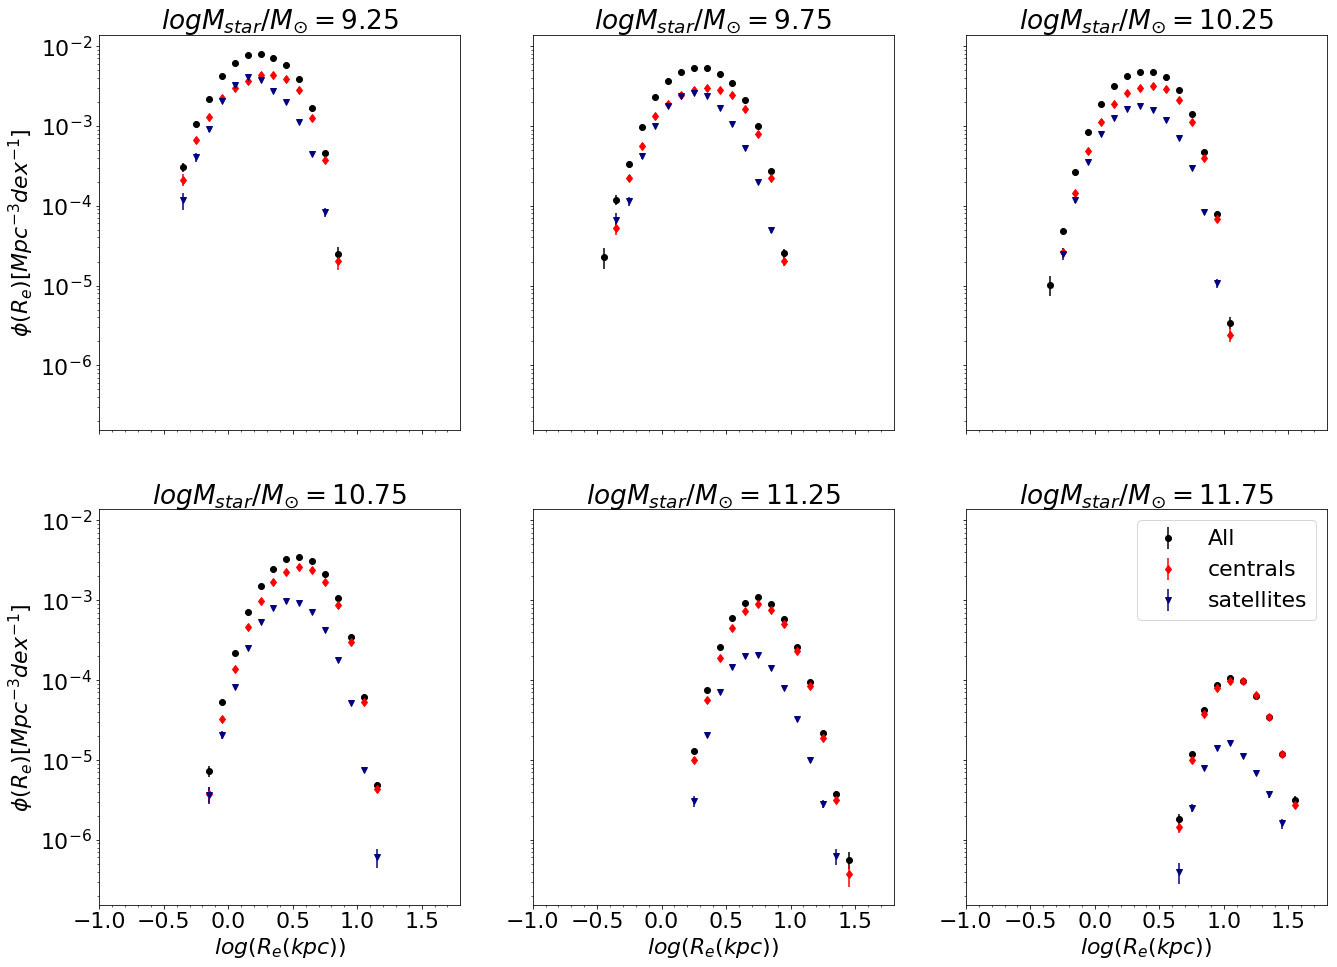

In [4]:
    masses = [9.25,9.75,10.25,10.75,11.25,11.75]
    fig, ax = plt.subplots(2,3,figsize=(22,16), sharey=True,sharex=True)
    i=0;j=0
    for  m in masses:
       
        #plot_sizefunctot(ms,scatters)
        ReMeas, phiMeas,sigmaErr=np.loadtxt('/home/lorenzo//PhD/data/SDSS/SDSS_Processing/new_catalogs/ReF/'+str(m)+'/Re_all'+str(m)+'All.txt', unpack=True)

        ax[i][j].errorbar(ReMeas, phiMeas, yerr=sigmaErr, color='black', fmt='o', label='All')
        R,P,s=np.loadtxt('/home/lorenzo//PhD/data/SDSS/SDSS_Processing/new_catalogs/ReF/'+str(m)+'/Re_all'+str(m)+'cent.txt', unpack=True)
        index=np.where(P >0)[0]
        R=R[index]
        P=P[index]
        print(i,j)
        ax[i][j].errorbar(R,P,yerr=s,label='centrals', color='red', fmt='d')
        
        R1,P1,s1=np.loadtxt('/home/lorenzo//PhD/data/SDSS/SDSS_Processing/new_catalogs/ReF/'+str(m)+'/Re_all'+str(m)+'sat.txt', unpack=True)
        ax[i][j].errorbar(R1,P1,yerr=s1,label='satellites', color='navy', fmt='v')
        ax[i][j].set_yscale('log')

        ax[i][j].set_title('$log M_{star}/M_{\odot} =$'+str(m))
        if (i==0 and j==0) or (i==1 and j==0):
            ax[i][j].set_ylabel('$\phi(R_e)[Mpc^{-3}dex^{-1}]$')
        if (i ==1 ):
            ax[i][j].set_xlabel('$log(R_e (kpc))$')
            ax[i][j].set_xlim(-1,1.8)
            #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
            ax[i][j].set_xticks(np.arange(-1,2,0.5))
        j+=1
        if(j==3):
            i+=1
            j=0
   
    plt.legend()
  #  plt.savefig('./ReF/sizefunct_censat.eps', dpi=1000)

486258


 # Jackkinfe estimated errorbars on the SMF

In [18]:
#Header = ['galcount','z','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
#                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
#                                   ,'MhaloL','probaE','probaEll',
#                                 'probaS0','probaSab','probaScd','TType','AbsMagCent','MsCent',
#                               'veldisp','veldisperr']
        #Loads SDSS
df = pd.read_csv('Catalog_SDSS_complete.dat', delim_whitespace = True)
        #Clears NAN/ unsuable data
print(len(df))
fracper=len(df)/670722
skycov=8000.
fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

df=df[['MsMendSerExp','Vmaxwt','TType','NewLCentSat']]
df=df[df.MsMendSerExp>9.]
df=df[df.NewLCentSat==1]
df.index=np.arange(len(df))


N = 200
Mswidth=0.1
Ms = np.arange(9,12.5,Mswidth)
Msbins=Ms[1:]-Mswidth/2.
phiETGs=np.zeros((N, len(Msbins)))
phiLTGs=np.copy(phiETGs)
phiAll =np.copy(phiETGs)
L = len(df)
Nmax=int(L/N)
#stars=df[df.TType<=0].MsMendSerExp.values
#m=np.ma.masked_inside(stars,9.3,9.4).mask.astype(int)
#print(np.count_nonzero(m))
for i in range(N):
    if i < N-1:
        ind = np.random.randint(0,len(df), size=Nmax).astype(int)
        subcat = df.iloc[ind]
        ETGs = subcat.TType.values <=0
        LTGs =subcat.TType.values >0
        fracnew = fracsky*len(subcat)/L
        
        phiETGs[i] = np.histogram(subcat[ETGs].MsMendSerExp.values, bins=Ms, 
                            weights=subcat[ETGs].Vmaxwt.values)[0]
        phiETGs[i] = phiETGs[i]/fracnew/Mswidth
        
        phiLTGs[i] = np.histogram(subcat[LTGs].MsMendSerExp.values, bins=Ms, 
                            weights=subcat[LTGs].Vmaxwt.values)[0]
        phiLTGs[i] = phiLTGs[i]/fracnew/Mswidth
        
        phiAll[i] = np.histogram(subcat.MsMendSerExp.values, bins=Ms, 
                                  weights=subcat.Vmaxwt.values)[0]
        phiAll[i]  = phiAll[i]/fracnew/Mswidth
        
        df = df.drop(ind)
        df.index = np.arange(len(df)).astype(int)
    else:
        subcat=df.copy()
        ETGs = subcat.TType <=0
        LTGs =subcat.TType >0
    
        phiETGs[i] = np.histogram(subcat[ETGs].MsMendSerExp.values, bins=Ms, 
                            weights=subcat[ETGs].Vmaxwt.values)[0]
        phiLTGs[i] = np.histogram(subcat[LTGs].MsMendSerExp.values, bins=Ms, 
                            weights=subcat[LTGs].Vmaxwt.values)[0]        
        print(len(phiETGs))

484382
200


In [19]:
from astropy.stats import  jackknife_resampling, jackknife_stats

#resamples = np.array(list(map(jackknife_resampling,phiAll.T[0])))
#resamples= jackknife_resampling(phiAll.T[0])
statistic=np.mean
#estimate,bias,std,conf = np.array(list(map( lambda x: jackknife_stats(x,statistic),
                                        #   resamples)))
Msbins=np.arange(9,12.5,0.1)
phi_ETGs=np.empty(len(Msbins))
err_ETGs= np.empty(len(Msbins))
phi_LTGs=np.empty(len(Msbins))
err_LTGs= np.empty(len(Msbins))
phi_All=np.empty(len(Msbins))
err_All= np.empty(len(Msbins))
for i in range(len(Msbins)-1):
    phi_ETGs[i],bias,err_ETGs[i],conf =  jackknife_stats(phiETGs.T[i],statistic)
    phi_LTGs[i],bias,err_LTGs[i],conf =  jackknife_stats(phiLTGs.T[i],statistic)
    phi_All[i],bias,err_All[i],conf =  jackknife_stats(phiAll.T[i],statistic)

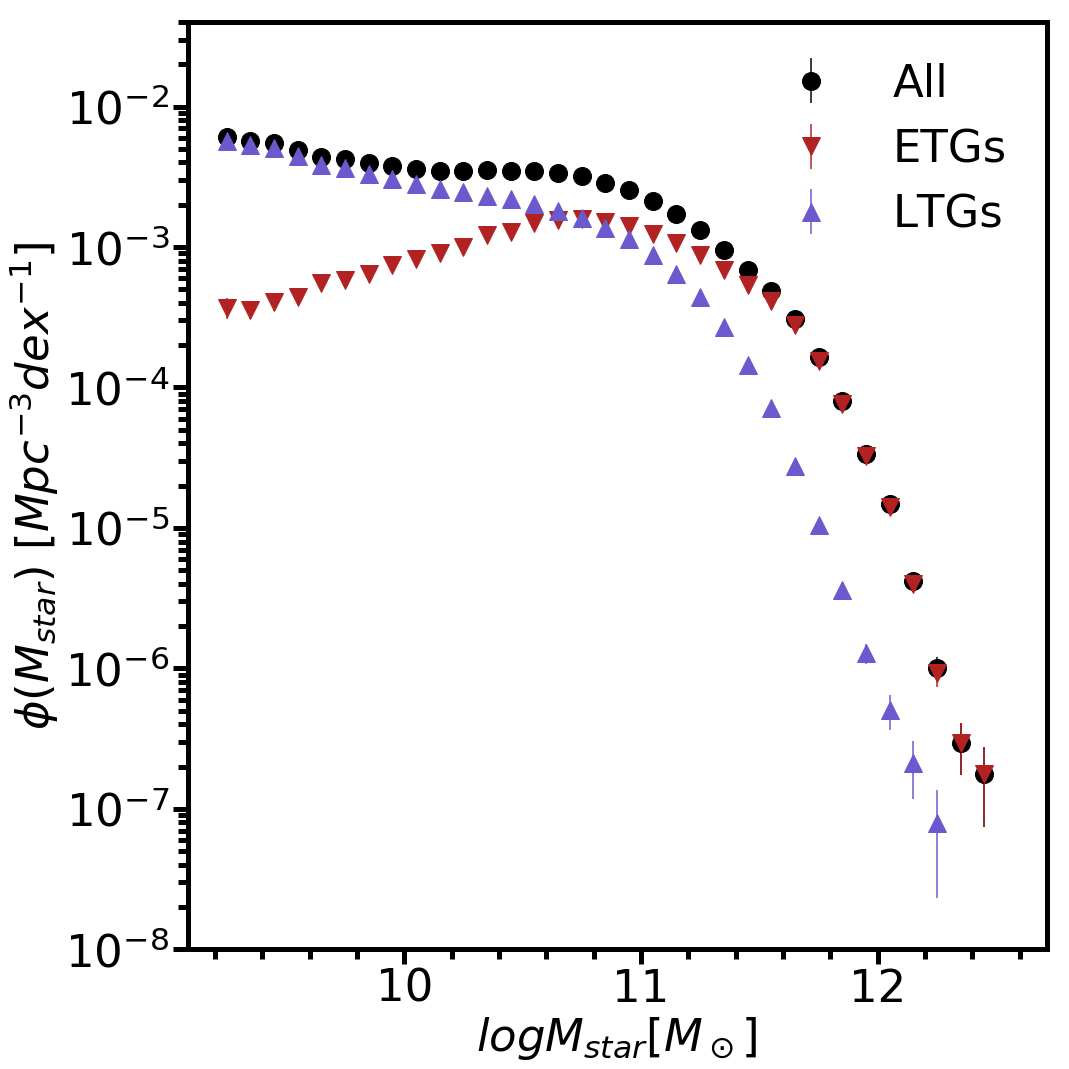

In [20]:
Msbins=Msbins+0.25
plt.errorbar(Msbins[:len(Msbins)-1], phi_All[:len(Msbins)-1], yerr=err_All[:len(Msbins)-1], markersize=18,color='black', fmt='o', label='All')

plt.errorbar(Msbins[:len(Msbins)-1], phi_ETGs[:len(Msbins)-1], yerr=err_ETGs[:len(Msbins)-1], markersize=18,color='firebrick', fmt='v', label='ETGs')
plt.errorbar(Msbins[:len(Msbins)-1], phi_LTGs[:len(Msbins)-1], yerr=err_LTGs[:len(Msbins)-1], markersize=18,color='slateblue', fmt='^', label='LTGs')
plt.ylabel('$\phi(M_{star}) \ [Mpc^{-3}dex^{-1}]$')
plt.xlabel('$log M_{star}[M_\odot]$')
plt.yscale('log')
plt.ylim(1.e-8,4.e-2)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('/home/lorenzo/Pictures/PaperSize/SMF_SDSS.pdf')
#array = np.array([Msbins+0.05, phi_ETGs, err_ETGs]).T
#np.savetxt('./SMF/SMF_ETGs_JN.txt',array)
#array = np.array([Msbins+0.05, phi_LTGs, err_LTGs]).T
#np.savetxt('./SMF/SMF_LTGs_JN.txt',array)
#array = np.array([Msbins+0.05, phi_All, err_All]).T
#np.savetxt('./SMF/SMF_All_JN.txt',array)

In [16]:
LTGs = phi_LTGs[:len(Msbins)-1]#[::-1][1:][::-1]
All =  phi_All[:len(Msbins)-1]#[::-1][1:][::-1]
bins = Msbins[:len(Msbins)-1]#[::-1][1:][::-1]
array = np.array([bins, LTGs/All]).T

In [17]:
np.savetxt('fraction_LTGs_vs_Mstar.txt', array)

In [6]:
array = np.array([Msbins[:len(Msbins)-1], phi_All[:len(Msbins)-1],err_All[:len(Msbins)-1]]).T
np.savetxt('SMF_All.txt', array)
array = np.array([Msbins[:len(Msbins)-1], phi_LTGs[:len(Msbins)-1],err_LTGs[:len(Msbins)-1]]).T
np.savetxt('SMF_Ltgs.txt', array)
array = np.array([Msbins[:len(Msbins)-1], phi_ETGs[:len(Msbins)-1],err_ETGs[:len(Msbins)-1]]).T
np.savetxt('SMF_Etgs.txt', array)


[0.20296655 0.14930393 0.12931845 0.1063373  0.09083854 0.07193021
 0.05860255 0.04759673 0.04180993 0.03349117 0.02683776 0.0217001
 0.01829225 0.01485686 0.01330726 0.01203145 0.01058421 0.0097866
 0.01010309 0.00929656 0.00870321 0.00891276 0.00859045 0.01009352
 0.01201424 0.01406557 0.01723987 0.02451812 0.03416066 0.04912994
 0.09188652]


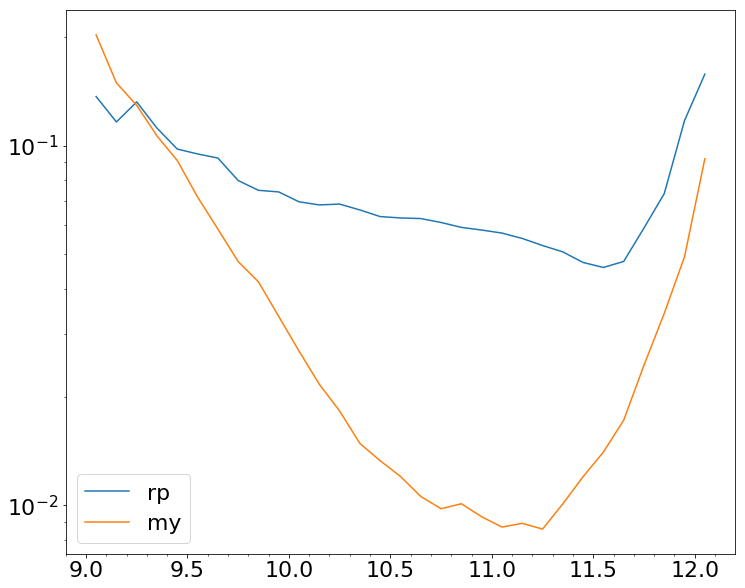

In [106]:
err_rp=np.array([ 0.13681261, 0.11626319, 0.13219999, 0.11179328, 0.09776806,
    0.09476174, 0.09231022, 0.0799512 , 0.07507693, 0.07431446,
       0.06975475, 0.06838476, 0.06874633, 0.06621171, 0.06346278,
    0.06291463, 0.06266426, 0.06111243, 0.0592229 , 0.05822998,
       0.05710455, 0.05517426, 0.05273755, 0.0506333 , 0.04731139,
    0.04582874, 0.04761949, 0.0589868 , 0.07351238, 0.11737549,
       0.15791044])
err=err_ETGs[:-3]/phi_ETGs[:-3]
plt.plot(Msbins[:-3], err_rp, label='rp')
plt.plot(Msbins[:-3],err, label='my' )
plt.legend()
plt.yscale('log')
print(err)

In [256]:
phi_all = np.array(list(map(np.mean,phiAll.T)))
err_all = np.array(list(map(np.std,phiAll.T)))

phi_ETGs = np.array(list(map(np.mean,phiETGs.T)))
err_ETGs = np.array(list(map(np.std,phiETGs.T)))

phi_LTGs = np.array(list(map(np.mean,phiLTGs.T)))
err_LTGs = np.array(list(map(np.std,phiLTGs.T)))

In [258]:
err_ETGs

array([8.83437532e-04, 7.78263725e-04, 6.95251709e-04, 6.69932451e-04,
       6.81174690e-04, 6.21588339e-04, 5.37940244e-04, 4.56815370e-04,
       4.73991132e-04, 4.28518901e-04, 3.81921587e-04, 3.77150139e-04,
       3.06265185e-04, 3.22126664e-04, 2.85843324e-04, 2.40060113e-04,
       2.25802064e-04, 2.15844863e-04, 1.65050118e-04, 1.47515971e-04,
       1.13236788e-04, 8.90144801e-05, 7.38955167e-05, 5.82744078e-05,
       4.52541524e-05, 3.70565870e-05, 2.73053349e-05, 1.92737862e-05,
       1.46057802e-05, 1.11741494e-05, 6.16292230e-06, 3.50038190e-06,
       1.62295448e-06, 1.47543508e-06])

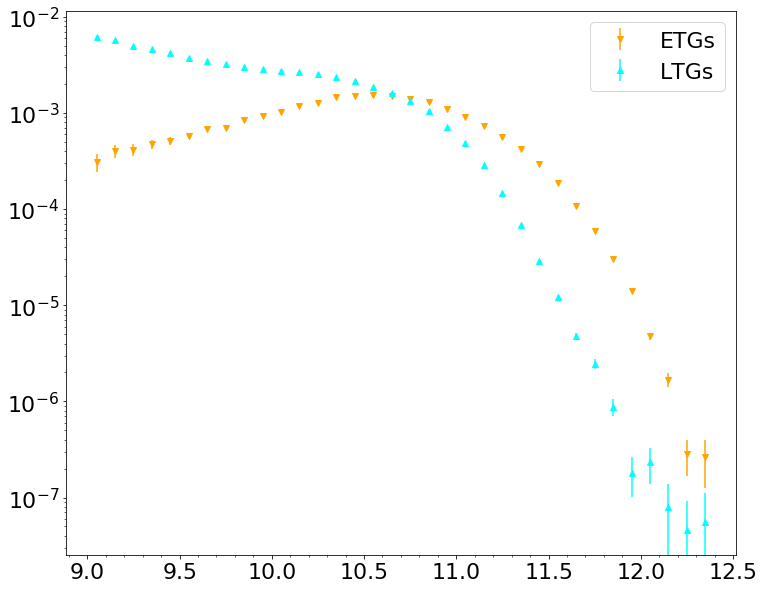

In [52]:
#plt.errorbar(Msbins, phi_all,yerr=err_all, color='black', fmt='d', label='All')
plt.errorbar(Msbins, phi_ETGs, yerr=err_ETGs, color='orange', fmt='v', label='ETGs')
plt.errorbar(Msbins, phi_LTGs, yerr=err_LTGs, color='cyan', fmt='^', label='LTGs')

plt.yscale('log')
plt.legend()
plt.savefig('new_errbars.png')

# Jackknife as implemented in astropy + random masses

In [116]:
from astropy.stats import  jackknife_resampling, jackknife_stats

In [179]:
Header = ['galcount','z','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','probaE','probaEll',
                                 'probaS0','probaSab','probaScd','TType','AbsMagCent','MsCent',
                               'veldisp','veldisperr']
        #Loads SDSS
df_original = pd.read_csv('./new_catalog_Lorenzo.dat', header = None, names = Header, skiprows = 1, delim_whitespace = True)
        #Clears NAN/ unsuable data
print(len(df_original))
fracper=0.724
skycov=8000.
fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

df_original=df_original[['MsMendSerExp','Vmaxwt','TType','NewLCentSat']]
#df=df[df.MsMendSerExp>9.]
df_original=df_original[df_original.NewLCentSat==1]
df_original.index=np.arange(len(df_original))

Nmocks= 1000  #how many catalogs
Mswidth=0.1
Ms = np.arange(9,12.5,Mswidth)
Msbins=Ms[1:]-Mswidth/2.
phi_All = np.zeros((Nmocks, len(Msbins)))    #for all the catalogs
phi_ETGs = np.copy(phi_All)
phi_LTGs = np.copy(phi_All)

err_All = np.copy(phi_All)
err_ETGs = np.copy(phi_All)
err_LTGs = np.copy(phi_All)

N = 200   # how many subcatalogs per catalog
phiETGs=np.zeros((N, len(Msbins)))     # for the subcatalogs
phiLTGs=np.copy(phiETGs)
phiAll =np.copy(phiETGs)

L = len(df_original)
Nmax=int(L/N)

statistic=np.mean
df = df_original.copy()

for j in range(Nmocks):
    
    print(j) 
    ####   compute phi for each sumbsample  (with new masses computed at the end of the cycle)
    for i in range(N):
        if i < N-1:
            ind = np.random.randint(0,len(df), size=Nmax).astype(int)
            subcat = df.iloc[ind]
            ETGs = subcat.TType.values <=0
            LTGs =subcat.TType.values >0
            fracnew = fracsky*len(subcat)/L
        
            phiETGs[i] = np.histogram(subcat[ETGs].MsMendSerExp.values, bins=Ms, 
                                weights=subcat[ETGs].Vmaxwt.values)[0]
            phiETGs[i] = phiETGs[i]/fracnew/Mswidth
            
            phiLTGs[i] = np.histogram(subcat[LTGs].MsMendSerExp.values, bins=Ms, 
                                weights=subcat[LTGs].Vmaxwt.values)[0]
            phiLTGs[i] = phiLTGs[i]/fracnew/Mswidth
            
            phiAll[i] = np.histogram(subcat.MsMendSerExp.values, bins=Ms, 
                                      weights=subcat.Vmaxwt.values)[0]
            phiAll[i]  = phiAll[i]/fracnew/Mswidth
        
            df = df.drop(ind)
            df.index = np.arange(len(df)).astype(int)
        else:
            subcat=df.copy()
            ETGs = subcat.TType <=0
            LTGs =subcat.TType >0
    
            phiETGs[i] = np.histogram(subcat[ETGs].MsMendSerExp.values, bins=Ms, 
                                weights=subcat[ETGs].Vmaxwt.values)[0]
            phiLTGs[i] = np.histogram(subcat[LTGs].MsMendSerExp.values, bins=Ms, 
                                weights=subcat[LTGs].Vmaxwt.values)[0]     
            phiAll[i] = np.histogram(subcat.MsMendSerExp.values, bins=Ms, 
                                weights=subcat.Vmaxwt.values)[0] 
            
    # compute the mean and std for each catalog from all the subsamples of that catalog
    for k in range(len(Msbins)):
        phi_ETGs[j][k],bias,err_ETGs[j][k],conf =  jackknife_stats(phiETGs.T[k],statistic)
        phi_LTGs[j][k],bias,err_LTGs[j][k],conf =  jackknife_stats(phiLTGs.T[k],statistic)
        phi_All[j][k],bias,err_All[j][k],conf =  jackknife_stats(phiAll.T[k],statistic)

    #  modify the masses
    df = df_original.copy()
   # bias = np.random.ranf(size=len(df))*2/10.
   # p = np.random.ranf(size=len(df))
   # bias[p>0.5] = -bias[p>0.5]
    
    df['MsMendSerExp'] =  np.random.normal(df.MsMendSerExp.values, scale=0.1)
    

486258
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275

In [1]:
for i in range(10):
    plt.plot(Msbins, phi_ETGs[i])
    plt.plot(Msbins, phi_LTGs[i])
    plt.ylim(10**(-7.5), 10**(-1.5))
    plt.yscale('log')

NameError: name 'plt' is not defined

(array([  3.,   3.,   8.,  21.,  60.,  77., 122., 117., 157., 125.,  92.,
         94.,  59.,  26.,  22.,  10.,   1.,   2.,   0.,   1.]),
 array([0.00016383, 0.00018365, 0.00020347, 0.0002233 , 0.00024312,
        0.00026295, 0.00028277, 0.0003026 , 0.00032242, 0.00034225,
        0.00036207, 0.0003819 , 0.00040172, 0.00042155, 0.00044137,
        0.0004612 , 0.00048102, 0.00050085, 0.00052067, 0.0005405 ,
        0.00056032]),
 <a list of 20 Patch objects>)

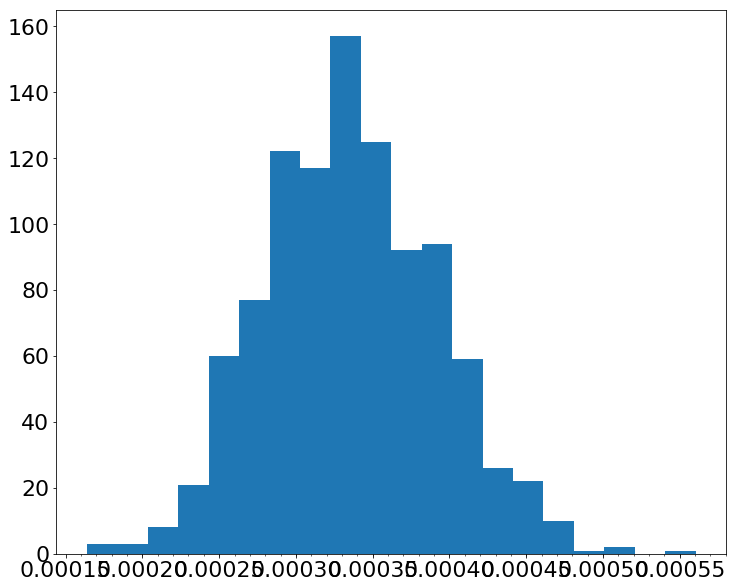

In [182]:
plt.hist(phi_ETGs.T[0], bins=20)
#phiETGs.T[0]

In [183]:
All = np.array(list(map(np.mean,phi_All.T)))
sigmaAll = np.array(list(map(np.std,phi_All.T)))

ETGs = np.array(list(map(np.mean,phi_ETGs.T)))
sigmaETGs = np.array(list(map(np.std,phi_ETGs.T)))

LTGs = np.array(list(map(np.mean,phi_LTGs.T)))
sigmaLTGs = np.array(list(map(np.std,phi_LTGs.T)))

In [187]:
for k in range(len(Msbins)):
    phi_ETGs[j][k],bias,err_ETGs[j][k],conf =  jackknife_stats(phiETGs.T[k],statistic)
    phi_LTGs[j][k],bias,err_LTGs[j][k],conf =  jackknife_stats(phiLTGs.T[k],statistic)
    phi_All[j][k],bias,err_All[j][k],conf =  jackknife_stats(phiAll.T[k],statistic)

array([0.16450232, 0.1330525 , 0.11035732, 0.09330834, 0.07404146,
       0.06177011, 0.04849669, 0.04332848, 0.03360849, 0.02764141,
       0.02363106, 0.01843888, 0.01493562, 0.01220532, 0.01099051,
       0.0099274 , 0.0089013 , 0.00823774, 0.00747181, 0.00691248,
       0.00691895, 0.00695156, 0.00727527, 0.00782601, 0.00916967,
       0.0112162 , 0.01475148, 0.01933177, 0.02807213, 0.03962343,
       0.0621865 , 0.10771724, 0.19798523, 0.38631915])

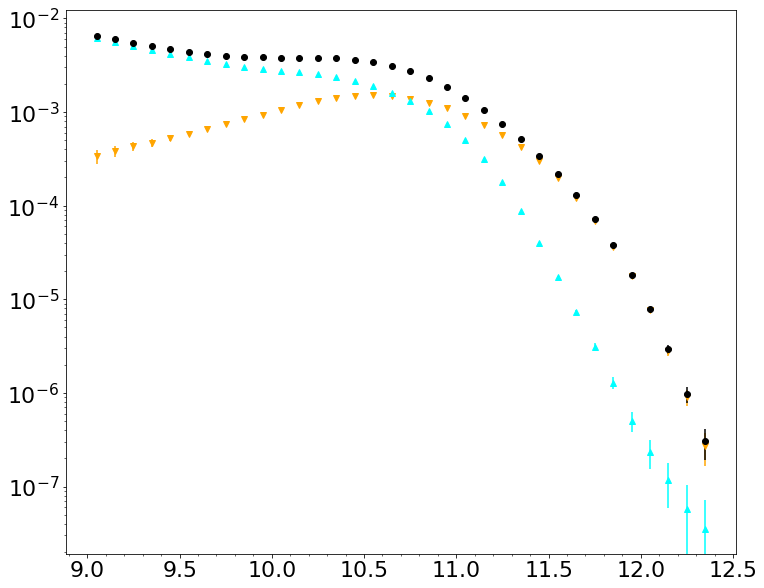

In [190]:
plt.errorbar(Msbins, ETGs, yerr=sigmaETGs, color='orange', fmt='v', label='ETGs')
plt.errorbar(Msbins, LTGs, yerr=sigmaLTGs, color='cyan', fmt='^', label='LTGs')
plt.errorbar(Msbins, All, yerr=sigmaAll, color='black', fmt='o', label='LTGs')

plt.yscale('log')

# Changing Mstar randomly

In [88]:
Header = ['galcount','z','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','probaE','probaEll',
                                 'probaS0','probaSab','probaScd','TType','AbsMagCent','MsCent',
                               'veldisp','veldisperr']
        #Loads SDSS
df = pd.read_csv('./new_catalog_Lorenzo.dat', header = None, names = Header, skiprows = 1, delim_whitespace = True)
        #Clears NAN/ unsuable data
print(len(df))
fracper=0.724
skycov=8000.
fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

df=df[['MsMendSerExp','Vmaxwt','TType','NewLCentSat']]
#df=df[df.MsMendSerExp>9.]
df=df[df.NewLCentSat==1]

Niter= 1000
Mswidth=0.1
Ms = np.arange(9,12.5,Mswidth)
Msbins=Ms[1:]-Mswidth/2.
phiAll = np.zeros((Niter, len(Msbins)))
#Mstar = np.zeros((Niter,len(df)))
#Vmax = np.copy(Mstar)
#TType = np.copy(Mstar)
for i in range(Niter):
    bias = np.random.ranf(size=len(df))*2/10.
    p = np.random.ranf(size=len(df))
    bias[p>0.5] = -bias[p>0.5]
        
    Mstar =  df.MsMendSerExp.values + bias
    Vmax = df.Vmaxwt.values
    phiAll[i] = np.histogram(Mstar, bins=Ms, 
                                  weights=Vmax)[0]
    phiAll[i]  = phiAll[i]/fracsky/Mswidth
    #TType[i] = df.TType.values

486258


(array([  3.,   2.,   5.,  16.,  26.,  38.,  75.,  95., 104., 142., 119.,
        112.,  99.,  73.,  41.,  30.,  11.,   3.,   3.,   3.]),
 array([0.00141122, 0.00141384, 0.00141647, 0.00141909, 0.00142172,
        0.00142434, 0.00142697, 0.00142959, 0.00143222, 0.00143485,
        0.00143747, 0.0014401 , 0.00144272, 0.00144535, 0.00144797,
        0.0014506 , 0.00145322, 0.00145585, 0.00145847, 0.0014611 ,
        0.00146373]),
 <a list of 20 Patch objects>)

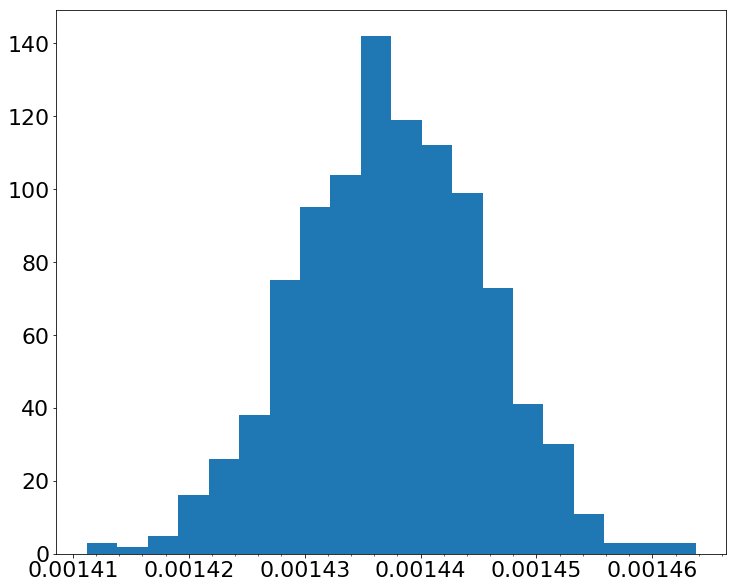

In [93]:
plt.hist(phiAll.T[20],bins=20)

In [94]:
phi_all = np.array(list(map(np.mean,phiAll.T)))
err_all = np.array(list(map(np.std,phiAll.T)))
phi_all

array([6.50488006e-03, 6.02179602e-03, 5.56353946e-03, 5.12288439e-03,
       4.74446068e-03, 4.45352729e-03, 4.18761841e-03, 4.01797714e-03,
       3.91604172e-03, 3.85319451e-03, 3.84566707e-03, 3.82694060e-03,
       3.82831857e-03, 3.76988433e-03, 3.61272574e-03, 3.39478024e-03,
       3.08697742e-03, 2.71452200e-03, 2.29687339e-03, 1.86323445e-03,
       1.43749945e-03, 1.06576826e-03, 7.63295787e-04, 5.25495056e-04,
       3.50401769e-04, 2.23921485e-04, 1.34892550e-04, 7.61611962e-05,
       4.01456390e-05, 1.96876383e-05, 8.69350910e-06, 3.38195359e-06,
       1.11468597e-06, 3.27584365e-07])

In [ ]:
M = Mstar.flatten()
V = Vmax.flatten()
TT = TType.flatten()
dic = {'MsMendSerExp': M, 'Vmaxwt': V, 'TType': TT}
df = pd.DataFrame(dic)

N = 10
Mswidth=0.1
Ms = np.arange(9,12.5,Mswidth)
Msbins=Ms[1:]-Mswidth/2.
phiETGs=np.zeros((N, len(Msbins)))
phiLTGs=np.copy(phiETGs)
phiAll =np.copy(phiETGs)
L = len(df)
Nmax=int(L/N)
#stars=df[df.TType<=0].MsMendSerExp.values
#m=np.ma.masked_inside(stars,9.3,9.4).mask.astype(int)
#print(np.count_nonzero(m))
for i in range(N):
    if i < N-1:
        ind = np.random.randint(0,len(df), size=Nmax).astype(int)
        subcat = df.iloc[ind]
        ETGs = subcat.TType.values <=0
        LTGs =subcat.TType.values >0
        fracnew = fracsky*len(subcat)/L
        
        phiETGs[i] = np.histogram(subcat[ETGs].MsMendSerExp.values, bins=Ms, 
                            weights=subcat[ETGs].Vmaxwt.values)[0]
        phiETGs[i] = phiETGs[i]/fracnew/Mswidth
        
        phiLTGs[i] = np.histogram(subcat[LTGs].MsMendSerExp.values, bins=Ms, 
                            weights=subcat[LTGs].Vmaxwt.values)[0]
        phiLTGs[i] = phiLTGs[i]/fracnew/Mswidth
        
        phiAll[i] = np.histogram(subcat.MsMendSerExp.values, bins=Ms, 
                                  weights=subcat.Vmaxwt.values)[0]
        phiAll[i]  = phiAll[i]/fracnew/Mswidth
        
        df = df.drop(ind)
        df.index = np.arange(len(df)).astype(int)
    else:
        subcat=df.copy()
        ETGs = subcat.TType <=0
        LTGs =subcat.TType >0
    
        phiETGs[i] = np.histogram(subcat[ETGs].MsMendSerExp.values, bins=Ms, 
                            weights=subcat[ETGs].Vmaxwt.values)[0]
        phiLTGs[i] = np.histogram(subcat[LTGs].MsMendSerExp.values, bins=Ms, 
                            weights=subcat[LTGs].Vmaxwt.values)[0] 

In [288]:
err_all = np.array(list(map(np.std, phiAll.T)))
phi_all = np.array(list(map(np.mean, phiAll.T)))

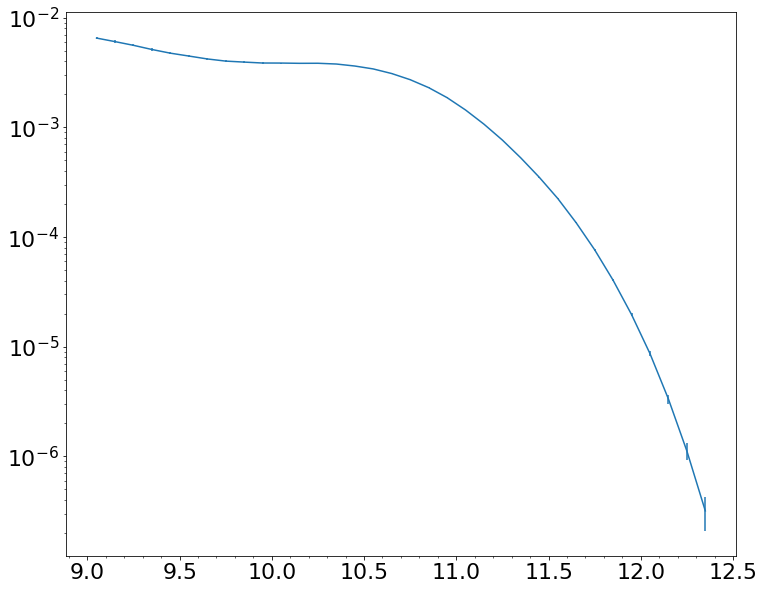

In [289]:
plt.errorbar(Msbins, phi_all,err_all)
plt.yscale('log')

In [15]:
Header = ['galcount','z','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','probaE','probaEll',
                                 'probaS0','probaSab','probaScd','TType','AbsMagCent','MsCent',
                               'veldisp','veldisperr']
        #Loads SDSS
df_original = pd.read_csv('./new_catalog_Lorenzo.dat', header = None, names = Header, skiprows = 1, delim_whitespace = True)
        #Clears NAN/ unsuable data
print(len(df_original))
fracper=0.724
skycov=8000.
fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

df_original=df_original[['MsMendSerExp','Vmaxwt','TType','NewLCentSat','BT','logReSerExp']]
#df=df[df.MsMendSerExp>9.]
df_original=df_original[df_original.NewLCentSat==1]
df_original.index=np.arange(len(df_original))

486258


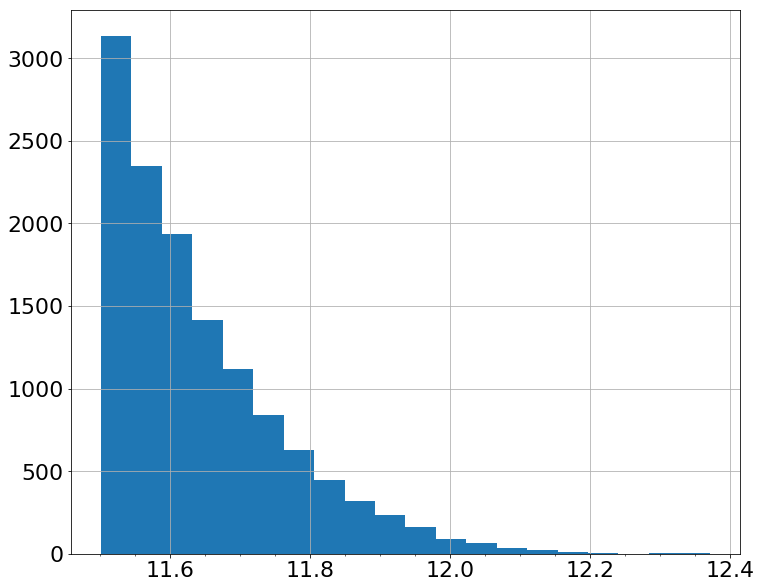

In [9]:
df_original.MsMendSerExp[df_original.MsMendSerExp.values>11.5].hist(bins=20)

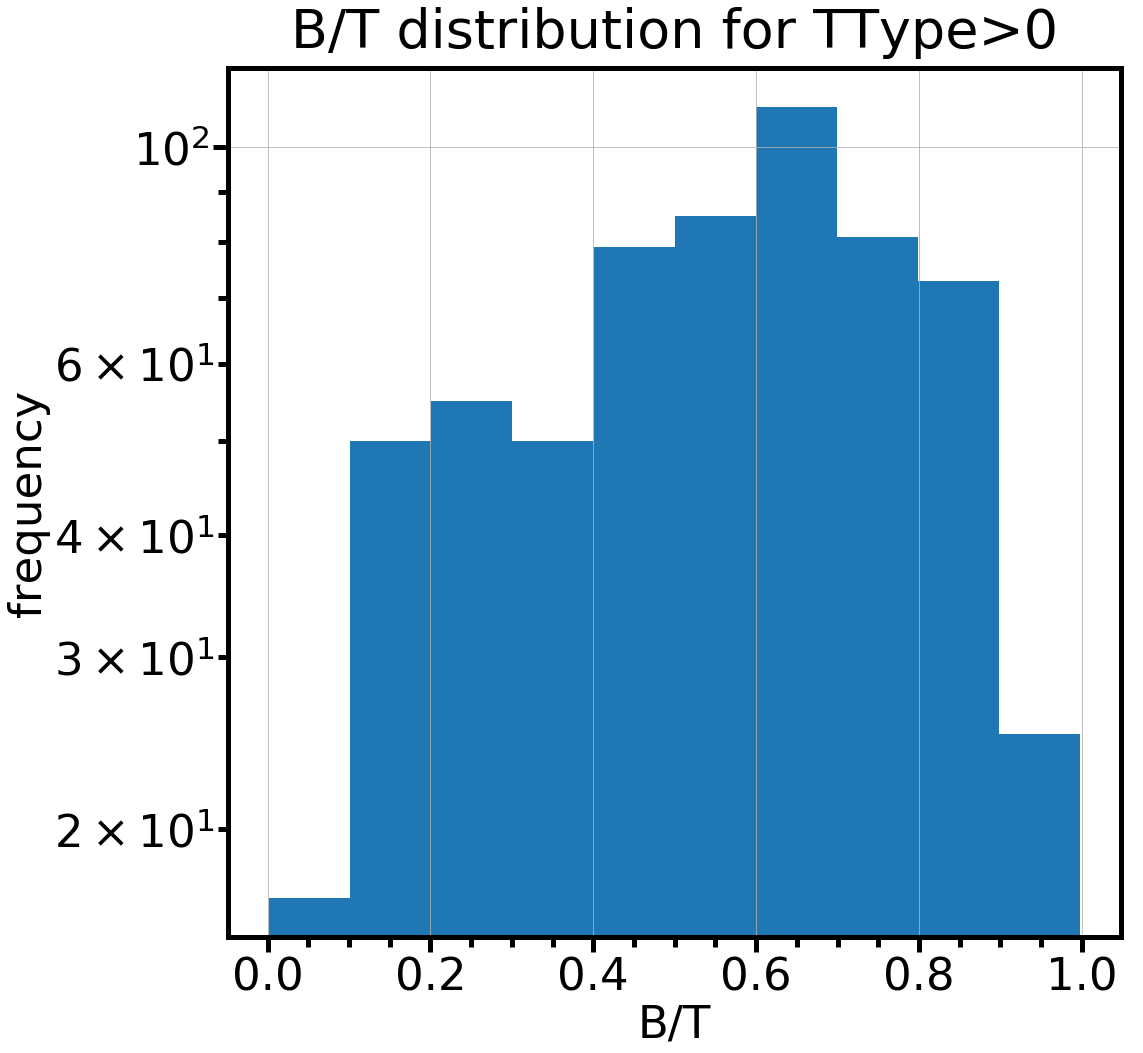

In [60]:


df_original[(df_original.MsMendSerExp>11.5) & (df_original.TType>0)].BT.hist()
plt.ylabel('frequency')
plt.xlabel('B/T')
plt.title('B/T distribution for TType>0')
plt.yscale('log')
plt.savefig('/home/lorenzo/Pictures/BT_LTGs.pdf')

In [60]:
ups = [9.5,10,10.5,11.,11.5,12.]
downs = np.array(ups)-0.5


i=0;j=0
#bins=np.linspace(0.1,10,50)
BTbins = np.arange(-10,13,0.5)

ttypes=['ETGs']
for ttype in  ttypes:
    i=0;j=0    

    fig, ax = plt.subplots(3,2,figsize=(24,36), sharex=True)
    for  u,d in zip(ups,downs):
        
        m=(u+d)/2.
        mask = np.ma.masked_inside(df_original.MsMendSerExp, d,u).mask

        df_ttype = df_original[mask]
        a = df_ttype.TType.values
        hist = np.histogram(a,bins=BTbins)[0]
        #ax[i][j].hist(a,bins=BTbins)
        ax[i][j].plot(BTbins[1:]-0.1,hist,lw=3)
        
        ax[i][j].set_title('$log M_{star}/M_{\odot} =$'+str(m))
        if (i==0 and j==0) or (i==1 and j==0) or (i==2 and j==0):
            #ax[i][j].set_ylabel('P(TType)')
            ax[i][j].set_ylabel('frequency')
            
        if (i ==2 ):
           # ax[i][j].set_xlabel('TType')
            ax[i][j].set_xlabel('TType')
            #ax[i][j].set_xlim(0,10)
           # ax[i][j].set_xlim(0,1)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
           # ax[i][j].set_xticks(np.arange(0,10))
        ax[i][j].set_yscale('log')
        j+=1
        if(j==2):
            i+=1
            j=0
        
    ax[2][1].legend(fontsize=25)
    plt.subplots_adjust(wspace=0.4,left=0.2)

    plt.suptitle('TType distributions')
    plt.savefig('/home/lorenzo/Pictures/TType_distribs.pdf')
    plt.close()

/home/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [8]:
Header = ['galcount','finalflag','zMeert','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','probaE','probaEll',
                                 'probaS0','probaSab','probaScd','TType','P_S0',
                               'veldisp','veldisperr','raSDSS7','decSDSS7']
df_original = pd.read_csv('./new_catalog_morph_flag.dat', header = None, names = Header, skiprows = 1, delim_whitespace = True)
        #Clears NAN/ unsuable data
print(len(df_original))
fracper=0.724
skycov=8000.
fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)
df_original=df_original.dropna()
df_original=df_original[df_original.Vmaxwt.values>0]
df_original=df_original[['MsMendSerExp','Vmaxwt','finalflag','TType','NewLCentSat','BT','logReSerExp','P_S0','raSDSS7','decSDSS7']]
#df=df[df.MsMendSerExp>9.]
df_original=df_original[df_original.NewLCentSat==1]
df_original.loc[df_original.finalflag==5,'BT']=0
df_original.loc[df_original.finalflag==1,'BT']=1

goodness_cut = (df_original.finalflag==3 ) | (df_original.finalflag==5) | (df_original.finalflag==1)

df_good = df_original[goodness_cut]
fracper_good = fracper*len(df_good)/len(df_original)
fracsky = (skycov*fracper_good)/(4*np.pi*(180./np.pi)**2.)


len(df_original)

486181


373016

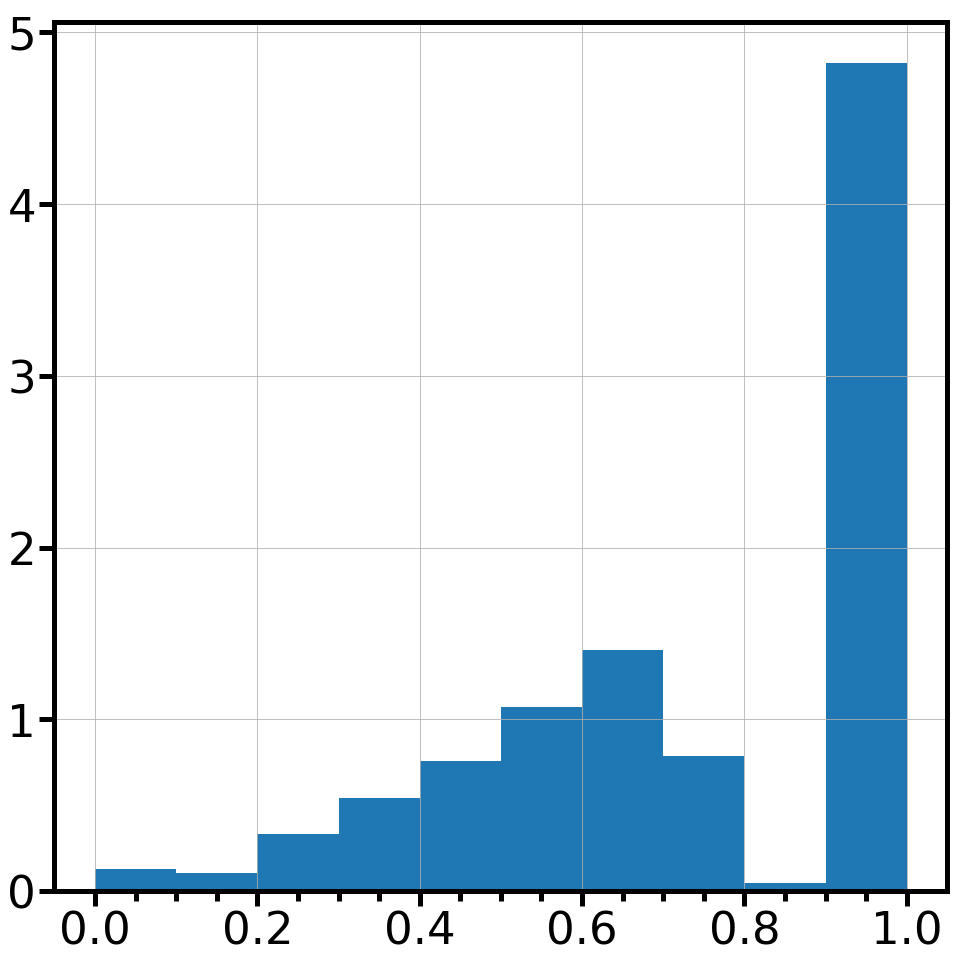

In [22]:
ttmask = (df_original.TType.values>-10) & (df_original.TType.values<0)
massmask = (df_original.MsMendSerExp>11) & (df_original.MsMendSerExp<11.5)
mask = ttmask & massmask
df_original[mask].BT.hist(bins=np.arange(0,1.1,0.1), normed=True)


In [9]:
mass_mask = (df_original.MsMendSerExp>11) & (df_original.MsMendSerExp<11.5)
len(df_good[(df_original.TType>0)  &(df_original.BT==1)  & (mass_mask)])/len(df_original[(df_original.TType>0) & (mass_mask) ])

/home/lorenzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.0893533242465546

In [31]:
mass_mask = (df_original.MsMendSerExp>11) & (df_original.MsMendSerExp<11.5)

In [32]:
len(df_good[(df_original.TType>0)  &(df_original.BT==1)  & (mass_mask)])/len(df_original[(df_original.TType>0) & (mass_mask) ])

/home/lorenzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.0893533242465546

In [100]:
df_original[(df_original.TType>0)  &(df_original.BT==1)  & (mass_mask)][['raSDSS7','decSDSS7']].to_csv('look_at_these.csv',sep=' ', index=False)

9.25 51.3 %
9.75 51.4 %
10.25 47.7 %
10.75 41.0 %
11.25 28.1 %
11.75 17.3 %


/home/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


9.25 2.3 %
9.75 2.4 %
10.25 2.4 %
10.75 4.8 %
11.25 11.3 %
11.75 33.5 %


/home/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


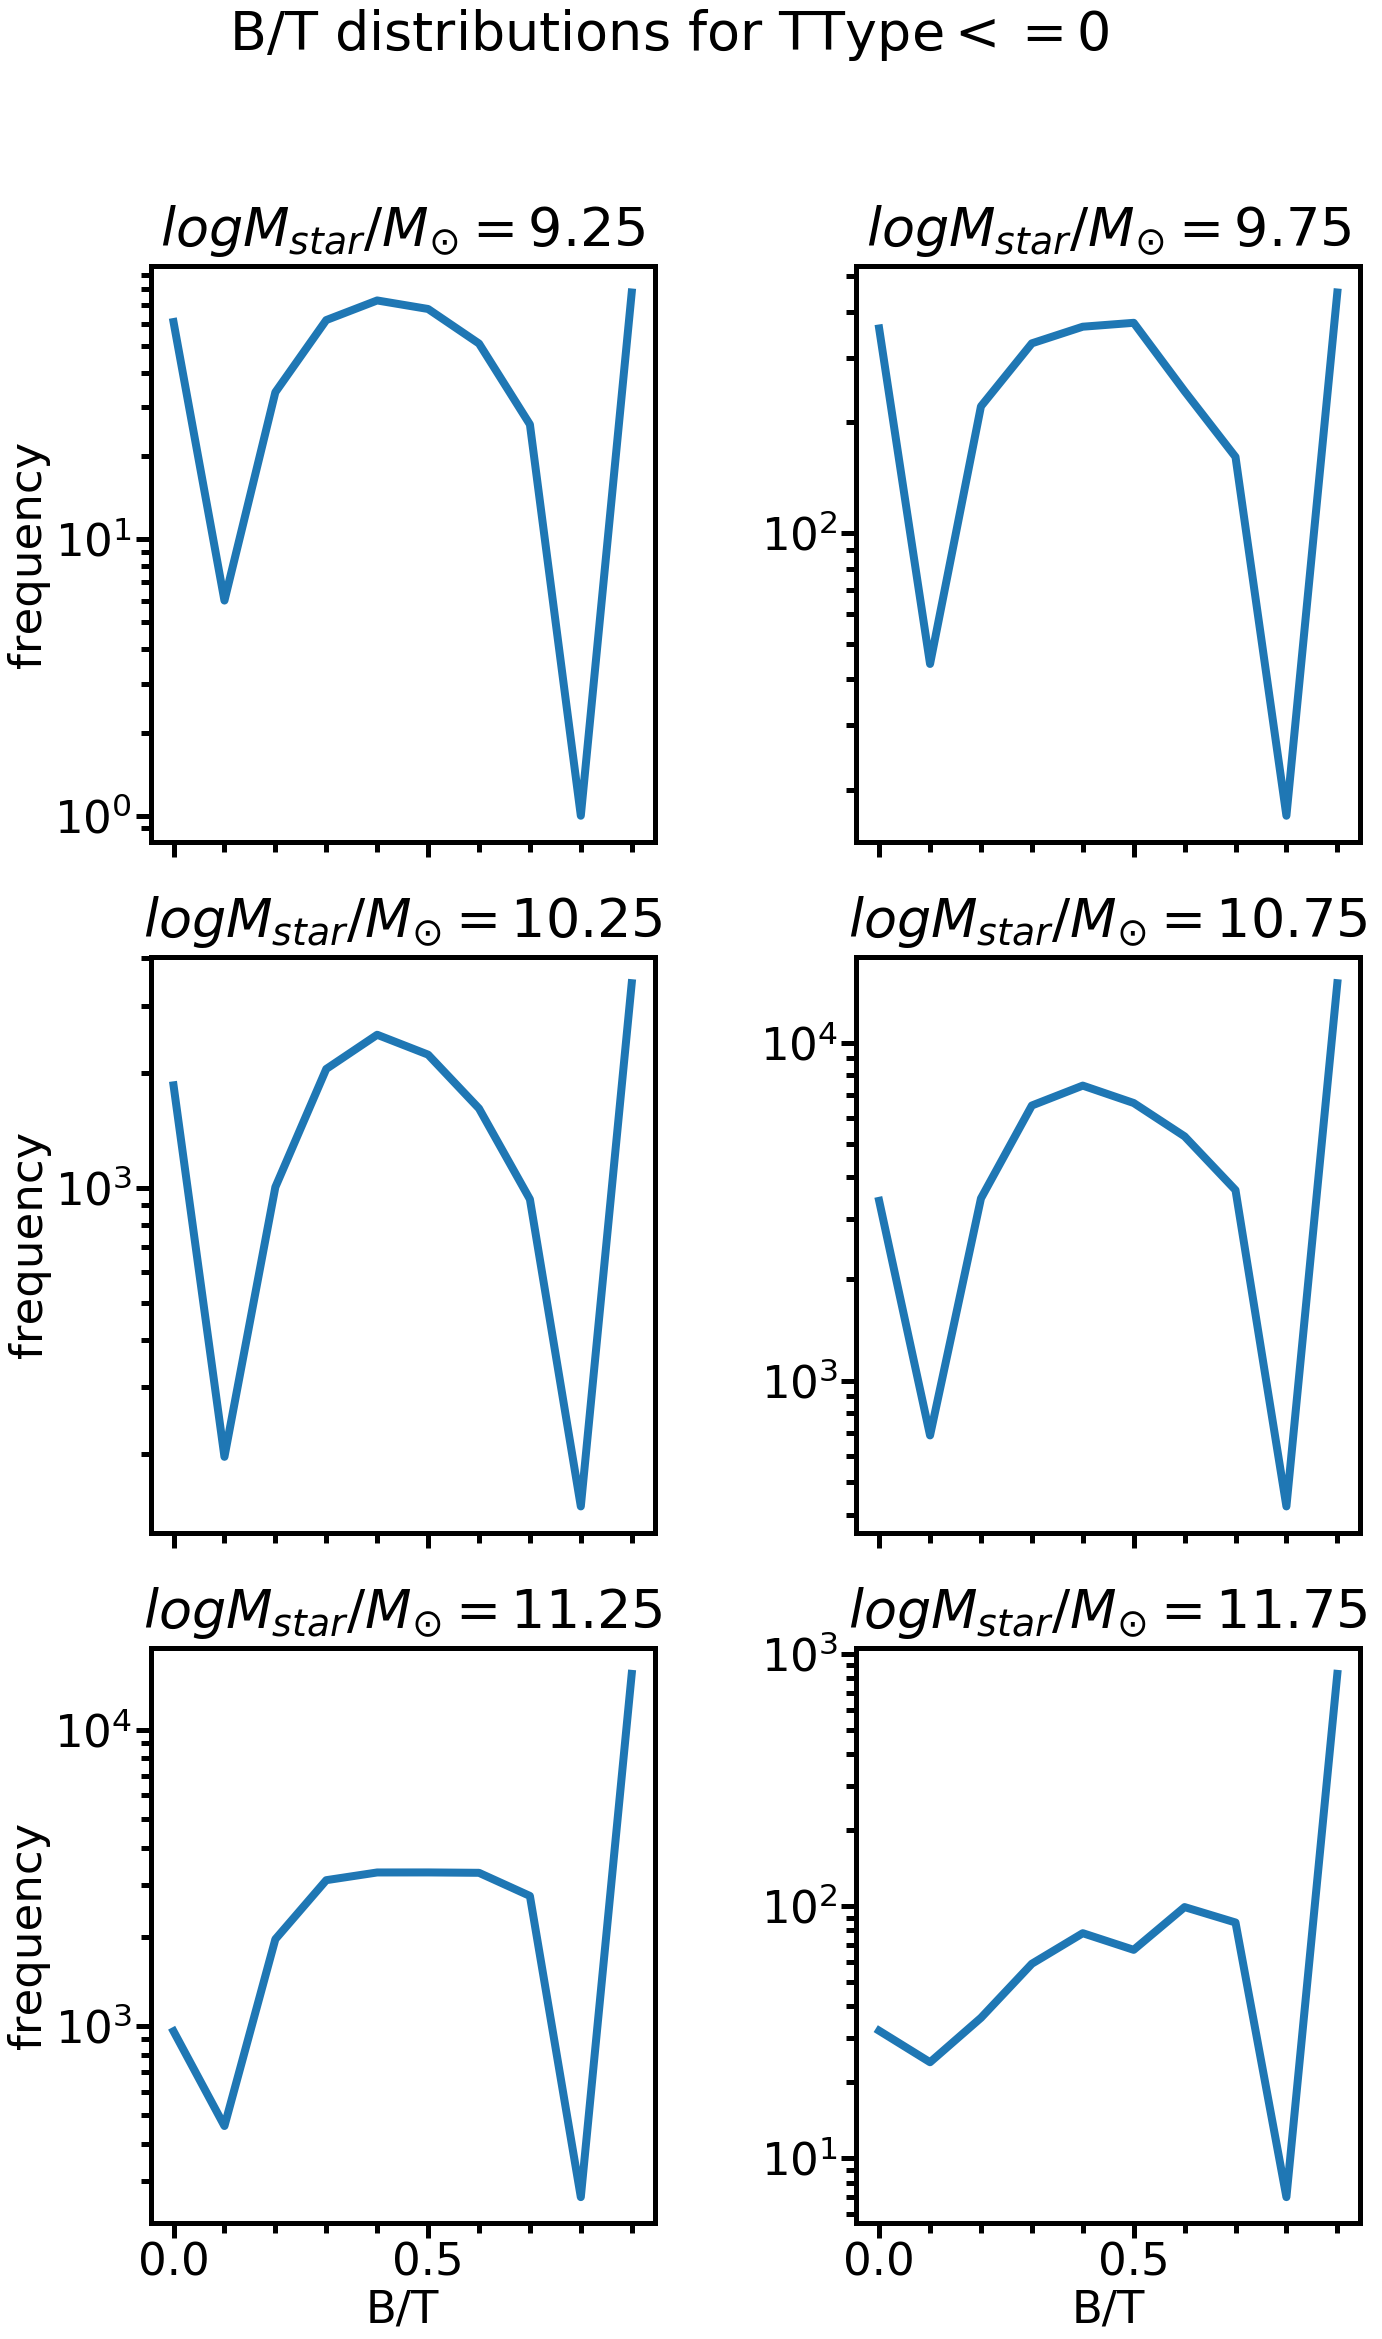

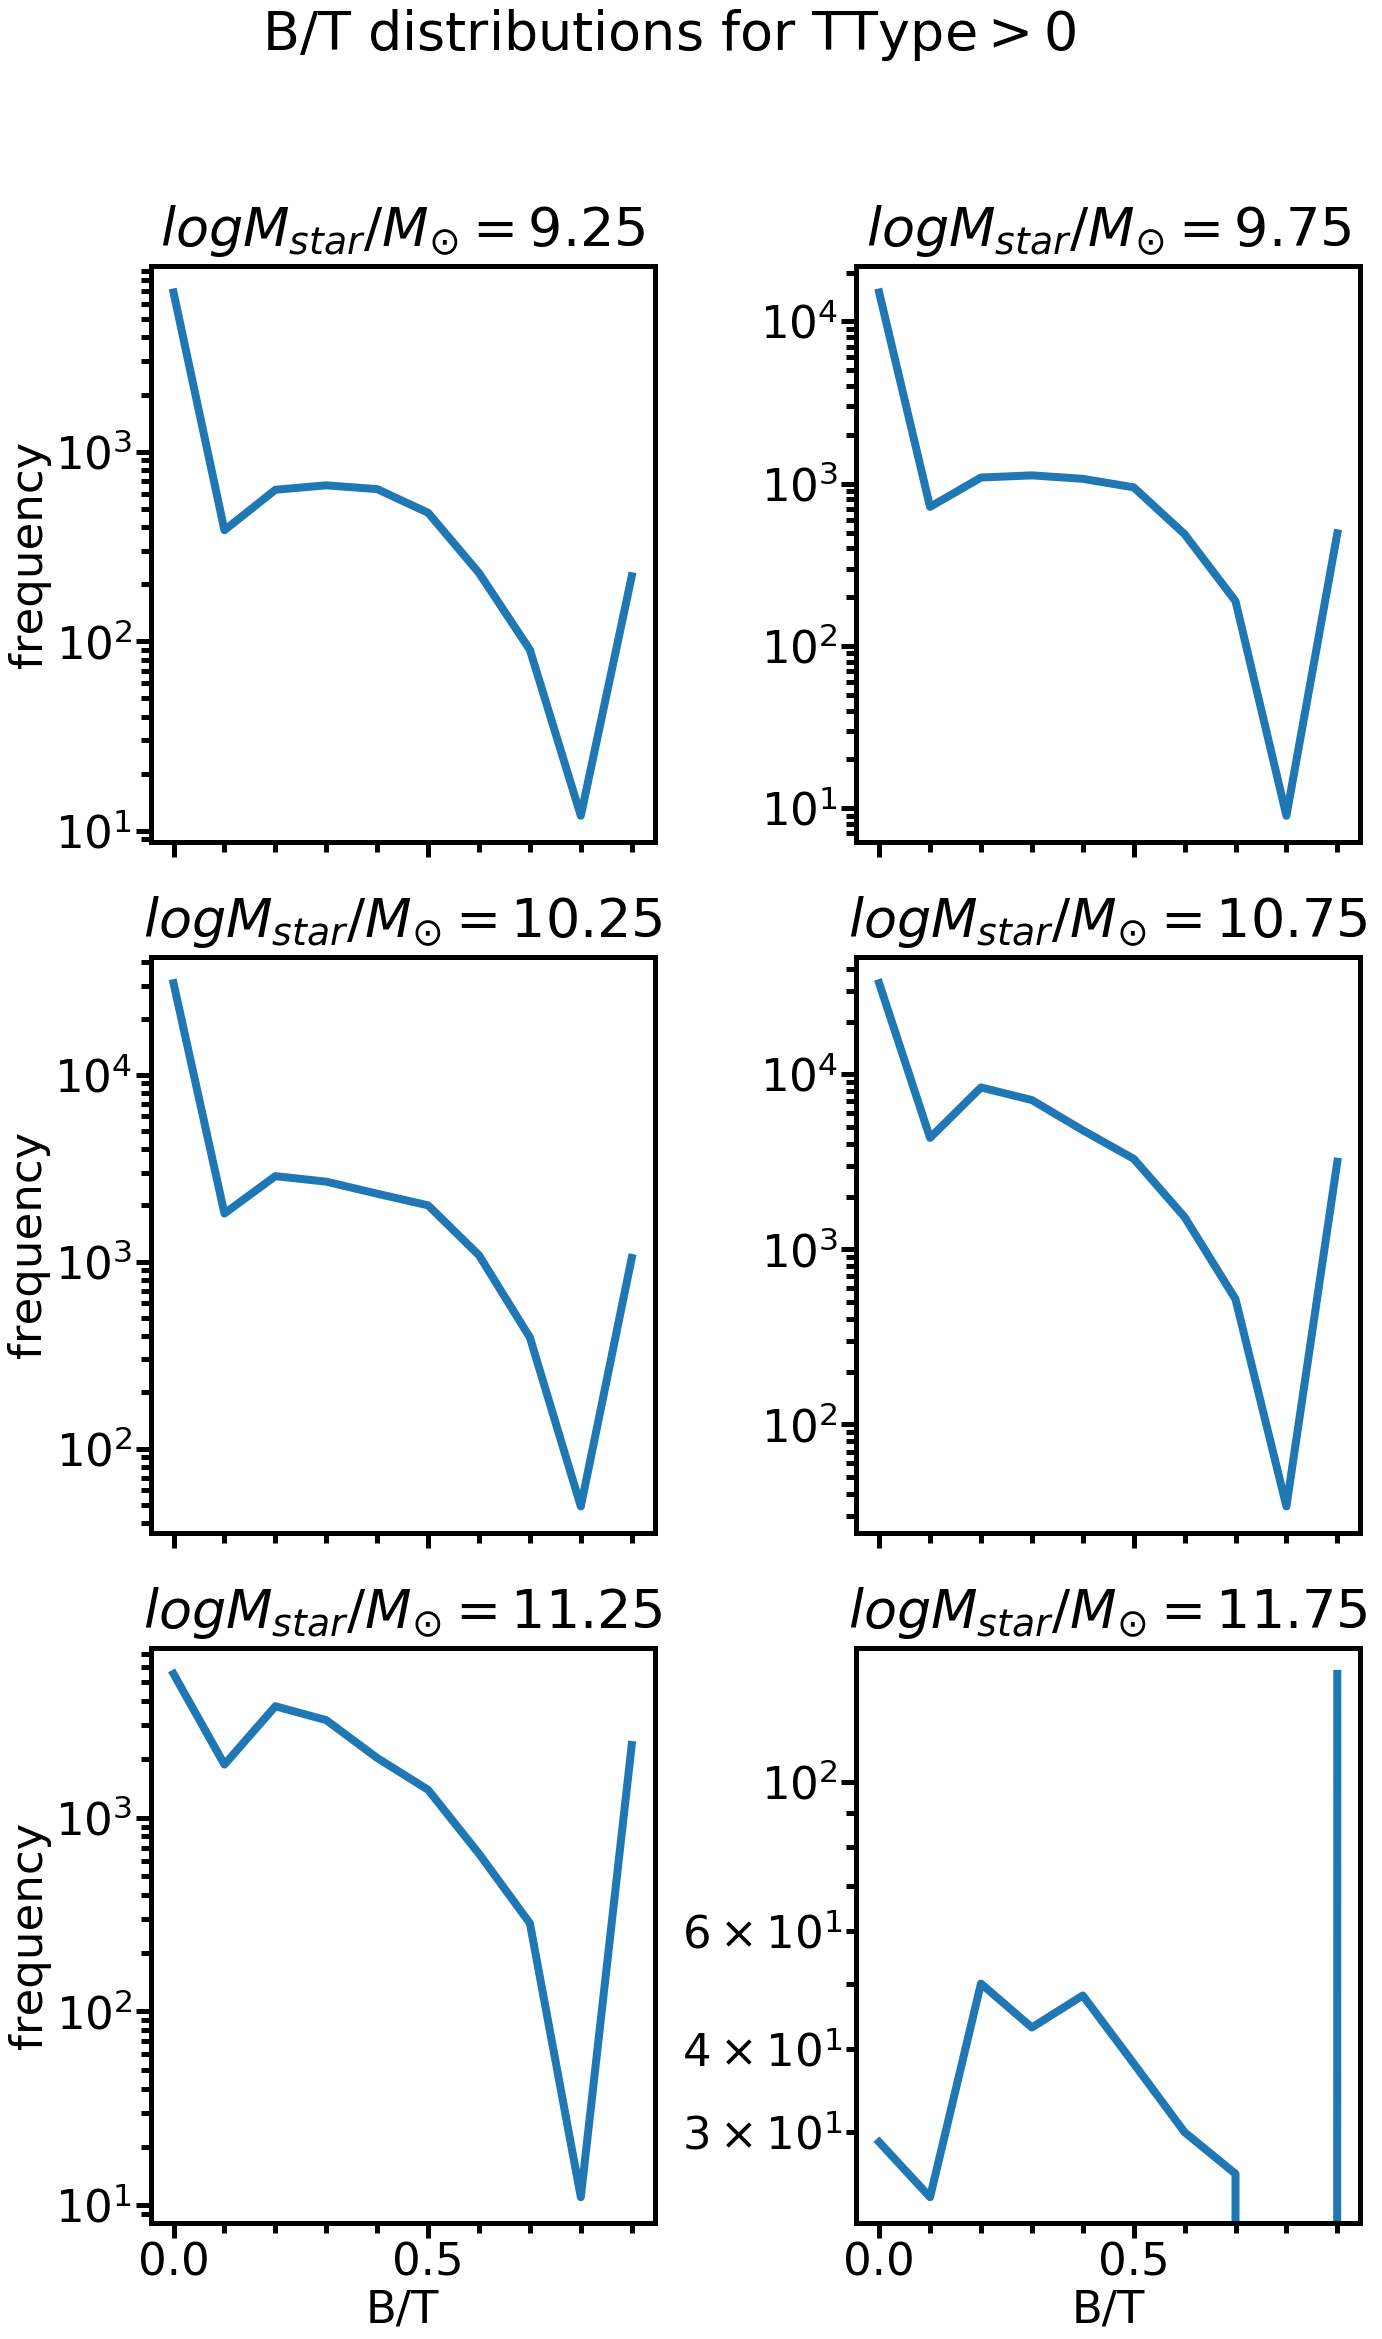

In [76]:
ups = [9.5,10,10.5,11.,11.5,12.]
downs = np.array(ups)-0.5


i=0;j=0
#bins=np.linspace(0.1,10,50)
BTbins = np.arange(0.,1.1,0.1)

ttypes=['ETGs','LTGs']
for ttype in  ttypes:
    i=0;j=0    
    if ttype=='ETGs':
        maskT = df_original.TType.values<=0 
    if ttype == 'LTGs':
        maskT = df_original.TType.values>0
    fig, ax = plt.subplots(3,2,figsize=(24,36), sharex=True)
    for  u,d in zip(ups,downs):
        
        m=(u+d)/2.
        mask = np.ma.masked_inside(df_original.MsMendSerExp, d,u).mask
        
        if ttype=='LTGs':
            df_ttype = df_original[(mask) & (maskT) ]
        if ttype=='ETGs':
            maskS = df_original.P_S0>0.5
            df_ttype =df_original[(mask)&(maskT)&(maskS)]
        a = df_ttype.BT.values
        hist = np.histogram(a,bins=BTbins)[0]
        #ax[i][j].hist(a,bins=BTbins)
        if ttype=='ETGs':
            mask = np.ma.masked_less_equal(BTbins[::-1][1:][::-1],0.4).mask
            print(m, str(np.round(np.sum(hist[mask])*100/np.sum(hist),1))+' %')
        if ttype == 'LTGs':
            mask = np.ma.masked_greater_equal(BTbins[::-1][1:][::-1],0.8).mask
            print(m, str(np.round(np.sum(hist[mask])*100/np.sum(hist),1))+' %')
        ax[i][j].plot(BTbins[1:]-0.1,hist,lw=8)
        
        ax[i][j].set_title('$log M_{star}/M_{\odot} =$'+str(m))
        if (i==0 and j==0) or (i==1 and j==0) or (i==2 and j==0):
            #ax[i][j].set_ylabel('P(TType)')
            ax[i][j].set_ylabel('frequency')
            
        if (i ==2 ):
           # ax[i][j].set_xlabel('TType')
            ax[i][j].set_xlabel('B/T')
            #ax[i][j].set_xlim(0,10)
           # ax[i][j].set_xlim(0,1)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
           # ax[i][j].set_xticks(np.arange(0,10))
        ax[i][j].set_yscale('log')
        j+=1
        if(j==2):
            i+=1
            j=0
        
    ax[2][1].legend(fontsize=25)
    plt.subplots_adjust(wspace=0.4,left=0.2)
    if ttype == 'ETGs':
        plt.suptitle('B/T distributions for TType$<=$0')
    else : 
        plt.suptitle('B/T distributions for TType$>0$')
    plt.savefig('/home/lorenzo/Pictures/BT_distribs'+str(ttype)+'_cleaned.pdf')
   # plt.close()
#plt.savefig('BT_LTGs.pdf')

In [39]:
df_original[(df_good.TType<0) & (df_good.P_S0>0.5)]

AttributeError: 'DataFrame' object has no attribute 'P_S0'

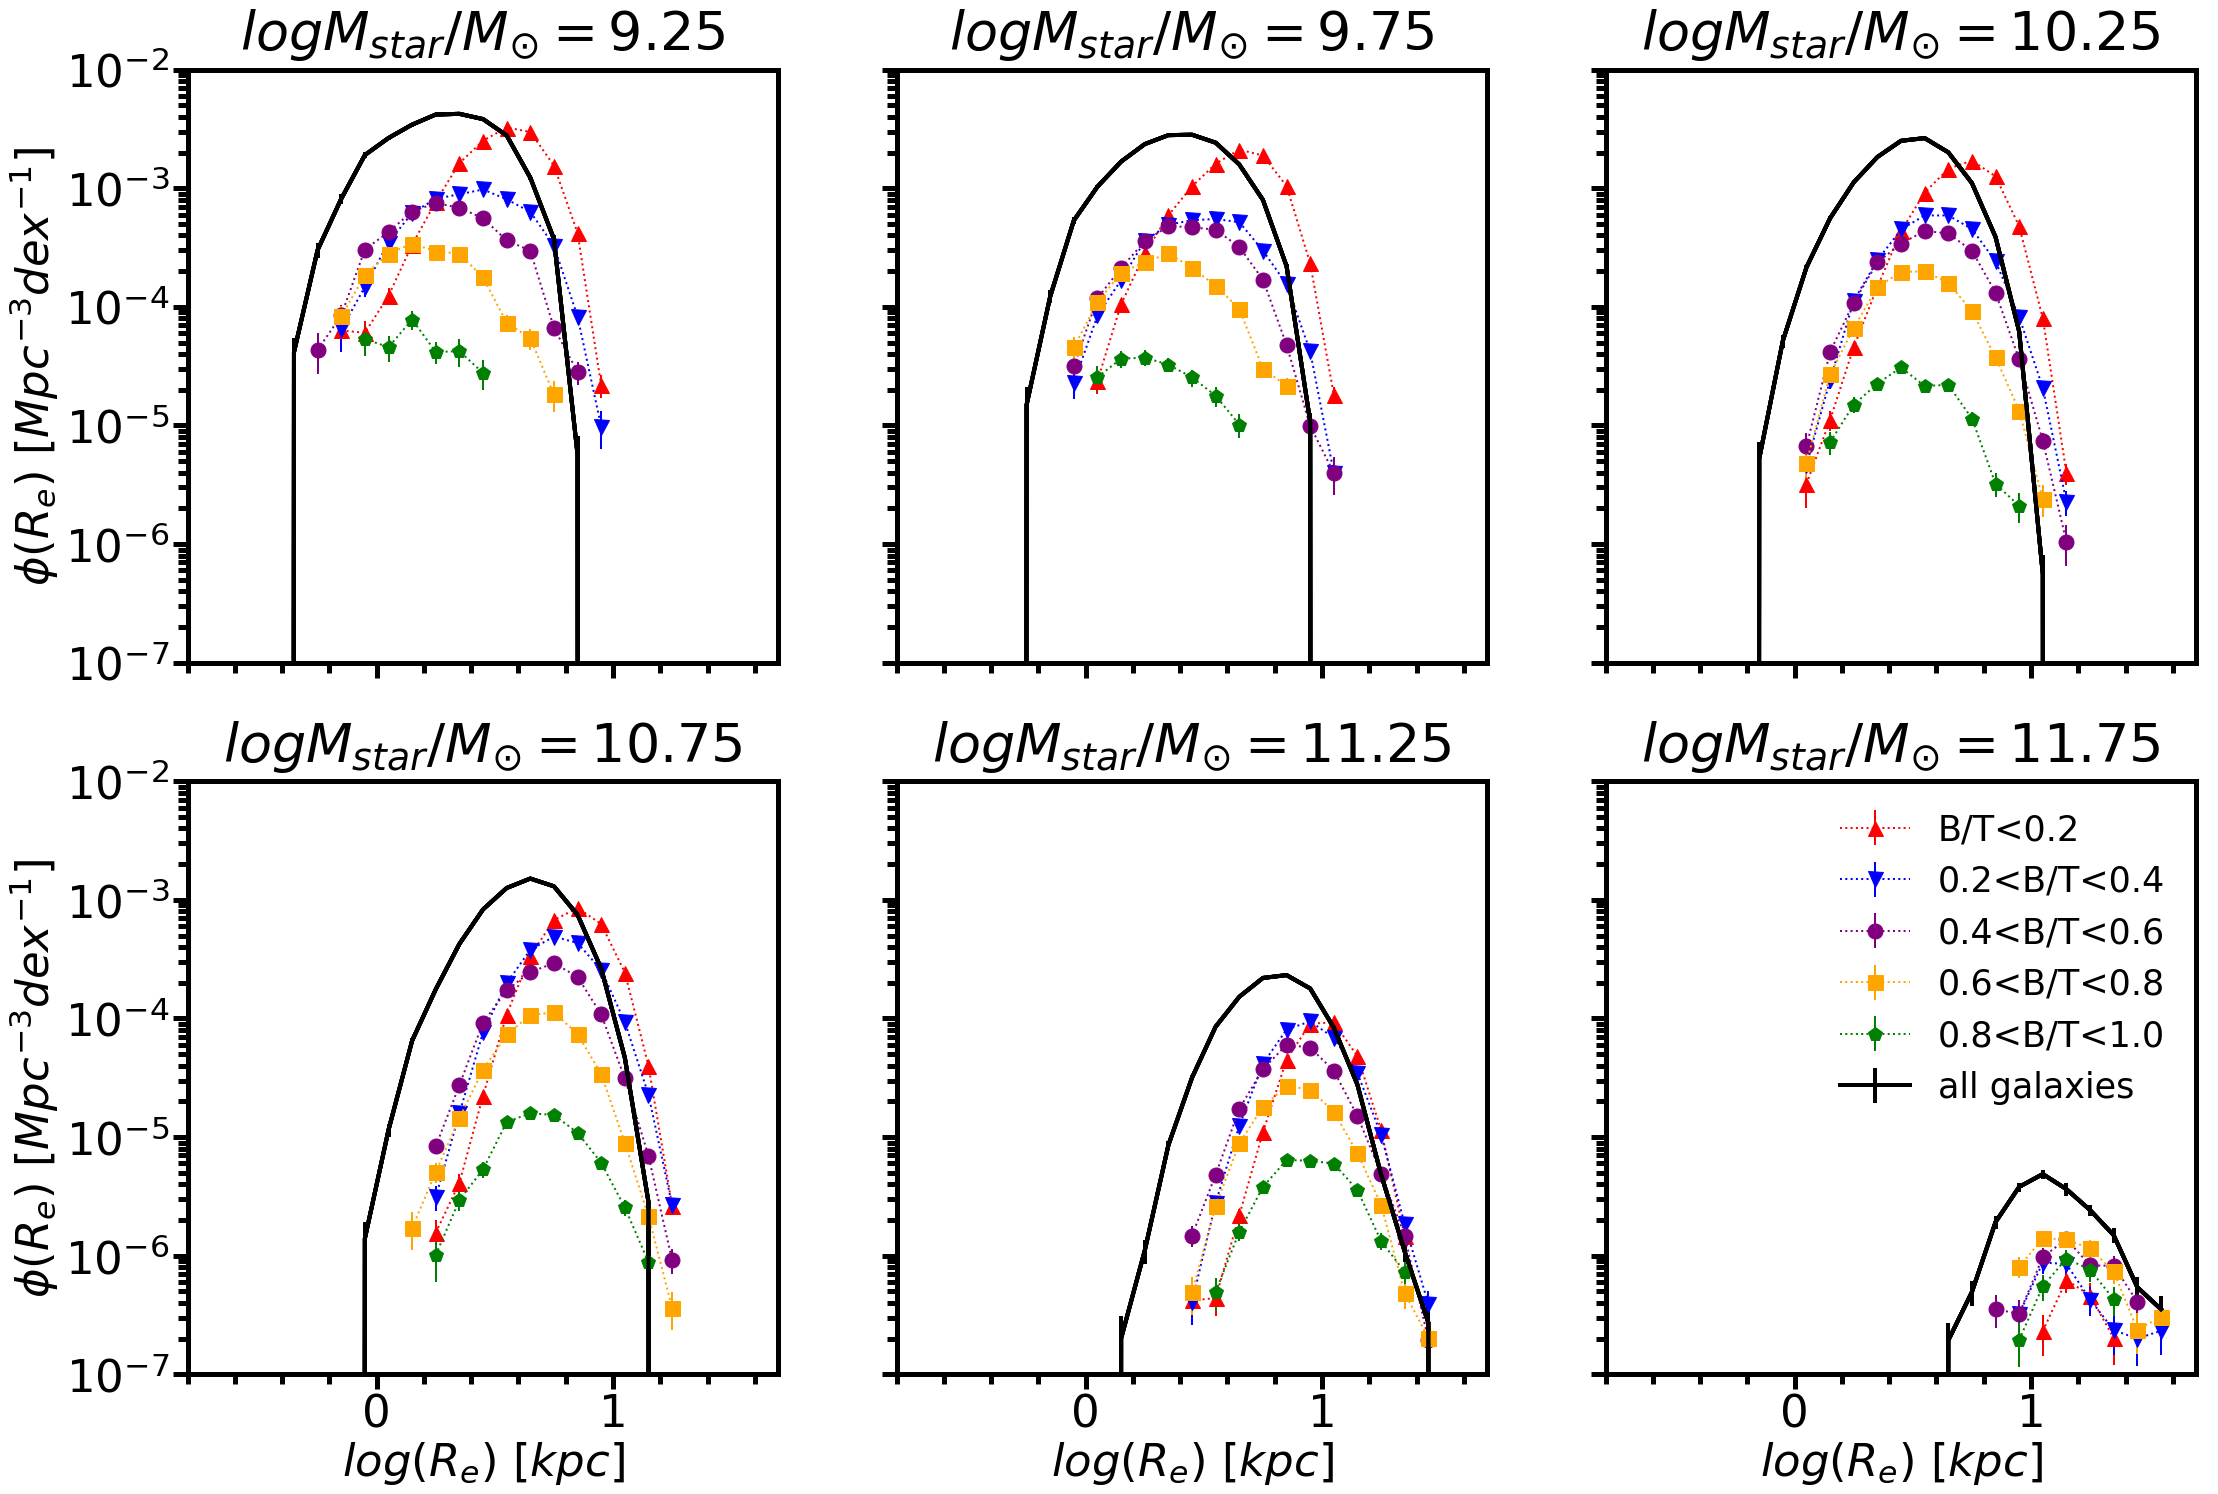

In [4]:
ups = [9.5,10,10.5,11.,11.5,12.]
downs = np.array(ups)-0.5

fig, ax = plt.subplots(2,3,figsize=(36,24), sharey=True,sharex=True)
i=0;j=0
#bins=np.linspace(0.1,10,50)
bins=np.arange(-1,1.7,0.1)
BTbins = [0,0.2,0.4,0.6,0.8,1.]
color = ['red','blue','purple','orange','green']
phi1 = np.zeros((len(bins),len(ups)))
phi2 = np.zeros((len(bins),len(ups)))
Remin=-10
Remax=10
Reemin=-10
Reemax=10
fmts= ['^','v','o','s','p']
btstrings = ['B/T<0.2','0.2<B/T<0.4','0.4<B/T<0.6','0.6<B/T<0.8','0.8<B/T<1.0']
for k,bt in enumerate(BTbins[:len(BTbins)-1]):
    i=0;j=0    
    btmean=np.round(.5*(bt+bt+0.2),2)

    for  l,(u,d) in enumerate(zip(ups,downs)):
        m=(u+d)/2.
        #Re, phi,err =np.loadtxt('ReF/BTcuts/'+str(m)+'/Re_LTGs'+str(m)+'cent'+str(btmean)+'.txt',unpack=True)
        Re, phi,err =np.loadtxt('ReF/BTcuts/'+str(m)+'/Re_LTGs'+str(m)+'cent'+str(btmean)+'original.txt',unpack=True)
       # phi2[:][l]+=phi
        ax[i][j].errorbar(Re,phi,err,lw=2,ls=':',marker=fmts[k], markersize=15, color=color[k], label=str(btstrings[k]))

        Re, phi,err =np.loadtxt('ReF/'+str(m)+'/Re_LTGs'+str(m)+'centJK.txt',unpack=True)
        if i==1 and j==2 and l==5 and k==len(BTbins)-2:
            ax[i][j].errorbar(Re,phi,err,lw=4,label='all galaxies', color='black',ls='-')
        else:
            ax[i][j].errorbar(Re,phi,err,lw=4, color='black',ls='-')


        #phi1[:][l] += phi
      #  if max(Remin)>max(Re):
      #      Re=Remin
      #  if Remax <Re :
      #      Re =Remax
       # if Reemin>Re:
       #     Re=Reemin
       # if Reemax <Re :
        #    Re =Reemax        
      
            
        ax[i][j].set_title('$log M_{star}/M_{\odot} =$'+str(m))
        if (i==0 and j==0) or (i==1 and j==0) :
            #ax[i][j].set_ylabel('P(TType)')
            ax[i][j].set_ylabel('$\phi(R_e) \ [Mpc^{-3}dex^{-1}]$')
        if (i ==1 ):
           # ax[i][j].set_xlabel('TType')
            ax[i][j].set_xlabel('$log(R_e) \ [kpc]$')
            #ax[i][j].set_xlim(0,10)
            xx=np.arange(11,21)

            ax[i][j].set_xlim(-0.8,1.7)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
           # ax[i][j].set_xticks(np.arange(0,10))
        j+=1
        if(j==3):
            i+=1
            j=0
#ax[2][1].plot(xx,xx, color='black',lw =4,ls='--', label='All')
#ax[2][1].plot(xx,xx, color='black',lw=4,ls='-', label='only good')
plt.ylim(1.e-7,10**-2)
ax[1][2].legend(fontsize=35,frameon=False)

plt.yscale('log')

#plt.tight_layout()
#plt.savefig('/home/lorenzo/Pictures/sizefunct_LTGs_BTcleaned_Rmaj.pdf')
#plt.savefig('BT_LTGs.pdf')

# Size Functions in bins of TType

In [7]:
ups = [9.5,10,10.5,11.,11.5,12.]
downs = np.array(ups)-0.5

for u,d in zip(ups, downs):
    SDSS_Plots(11, 15, 0.1, string='original').sizefunctions_pruned_morph_TTypebins(d,u)
    
    

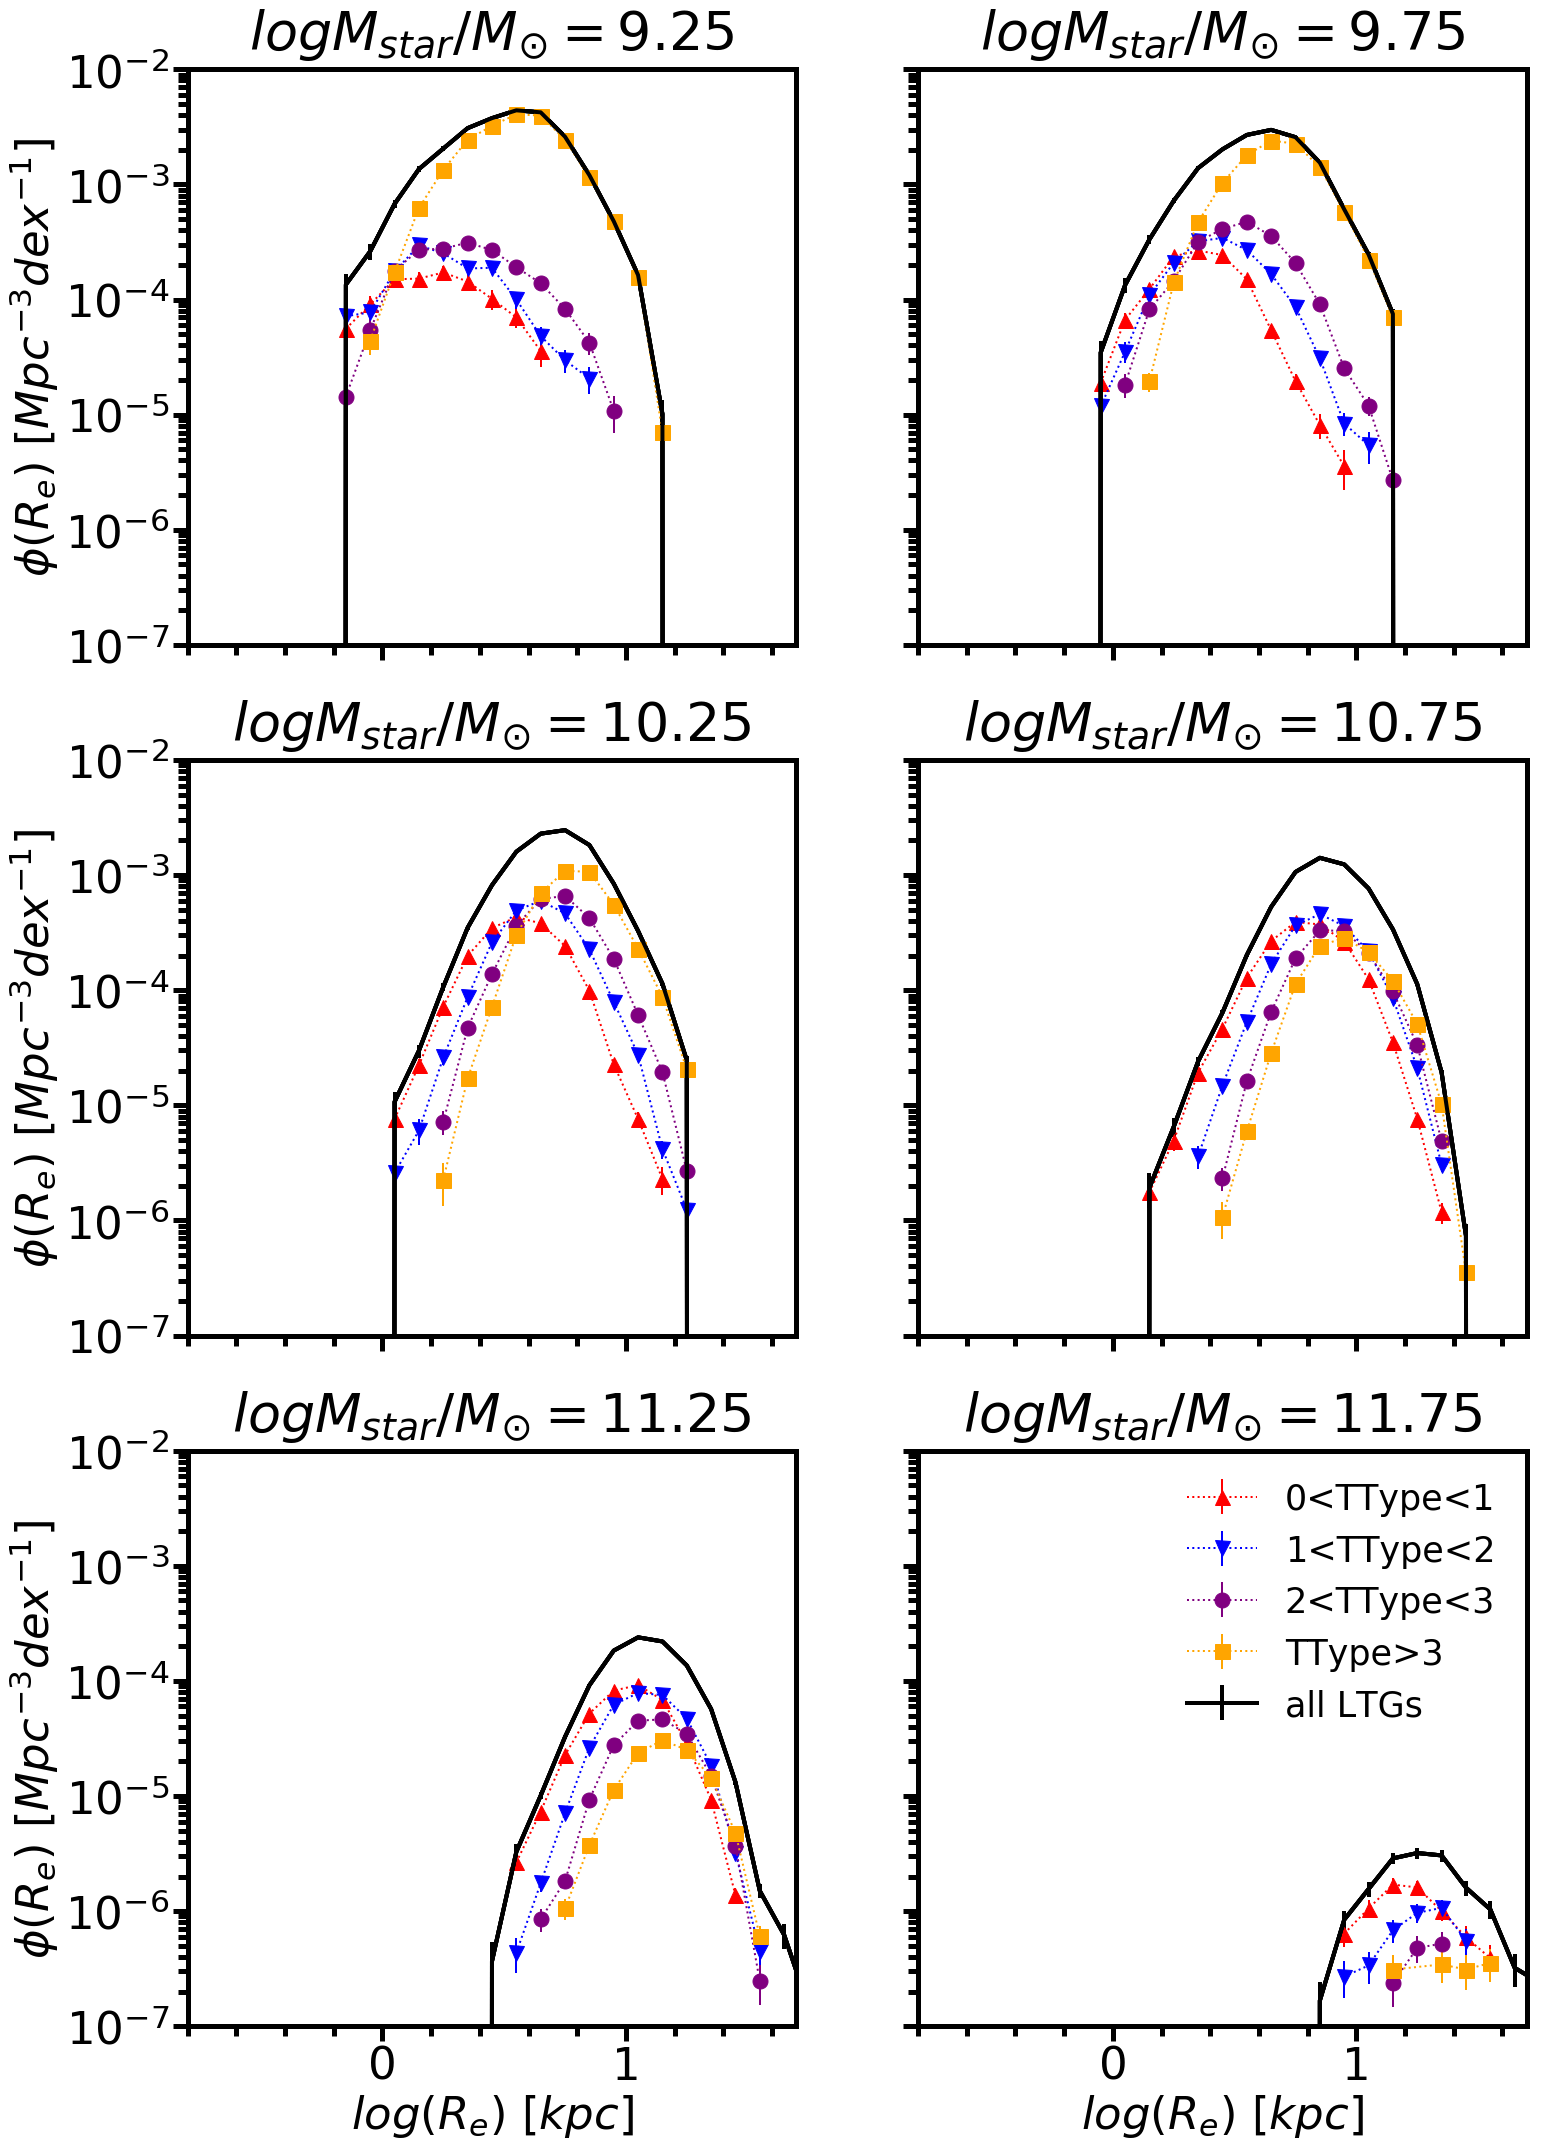

In [12]:
ups = [9.5,10,10.5,11.,11.5,12.]
downs = np.array(ups)-0.5

fig, ax = plt.subplots(3,2,figsize=(24,36), sharey=True,sharex=True)
i=0;j=0
#bins=np.linspace(0.1,10,50)
bins=np.arange(-1,1.7,0.1)
TTypebins = [0,1,2,3,10]
#TTypebins = [-10,-3,-2,-1,0]
color = ['red','blue','purple','orange','green']
phi1 = np.zeros((len(bins),len(ups)))
phi2 = np.zeros((len(bins),len(ups)))
Remin=-10
Remax=10
Reemin=-10
Reemax=10
fmts= ['^','v','o','s','p']
btstrings = ['0<TType<1','1<TType<2','2<TType<3','TType>3','TType>4']
for k,i in enumerate(range(len(TTypebins)-1)):
    btmean = np.round(0.5*(TTypebins[i]+TTypebins[i+1]),2)
    i=0;j=0    


    for  l,(u,d) in enumerate(zip(ups,downs)):
        m=(u+d)/2.
       # Re, phi,err =np.loadtxt('ReF/'+str(m)+'/Re_LTGs'+str(m)+'cent'+str(btmean)+'.txt',unpack=True)
       # print(len(phi))
    #try:
        Re, phi,err =np.loadtxt('ReF/Rmaj/TTypecuts/'+str(m)+'/Re_LTGs'+str(m)+'cent'+str(btmean)+'original.txt',unpack=True)
   # phi2[:][l]+=phi
        ax[i][j].errorbar(Re,phi,err,lw=2,ls=':',marker=fmts[k], markersize=15, color=color[k], label=str(btstrings[k]))

        Re, phi,err =np.loadtxt('ReF/Rmaj/'+str(m)+'/Re_LTGs'+str(m)+'centJKoriginal.txt',unpack=True)
       # Re_, phi_,err_ =np.loadtxt('ReF/BTcuts/'+str(m)+'/Re_LTGs'+str(m)+'cent0.1original.txt',unpack=True)
#        Re, phi,err =np.loadtxt('ReF/Rmaj/'+str(m)+'/Re_'+str(name)+str(m)+'centJKoriginal.txt',unpack=True)

        
        if i==2 and j==1 and l==5 and k==len(TTypebins)-2:

            ax[i][j].errorbar(Re,phi,err,lw=4,label='all LTGs', color='black',ls='-')
            #ax[i][j].errorbar(Re_,phi_,err_,lw=4,label='LTGs B/T<0.2', color='green',ls='--')
     #       pass
        else:
            ax[i][j].errorbar(Re,phi,err,lw=4, color='black',ls='-')
            #ax[i][j].errorbar(Re_,phi_,err_,lw=4, color='green',ls='--')
       #     if i!=1 and j!=2:
       #         print(i,j)
       #         ax[i][j].errorbar(Re_,phi_,err_,lw=4, color='red',ls='-')
      #  except:
      #      pass

        #phi1[:][l] += phi
      #  if max(Remin)>max(Re):
      #      Re=Remin
      #  if Remax <Re :
      #      Re =Remax
       # if Reemin>Re:
       #     Re=Reemin
       # if Reemax <Re :
        #    Re =Reemax        
      
            
        ax[i][j].set_title('$log M_{star}/M_{\odot} =$'+str(m))
        if (i==0 and j==0) or (i==1 and j==0)  or (i==2 and j==0) :
            #ax[i][j].set_ylabel('P(TType)')
            ax[i][j].set_ylabel('$\phi(R_e) \ [Mpc^{-3}dex^{-1}]$')
        if (i ==2 ):
           # ax[i][j].set_xlabel('TType')
            ax[i][j].set_xlabel('$log(R_e) \ [kpc]$')
            #ax[i][j].set_xlim(0,10)
            xx=np.arange(11,21)

            ax[i][j].set_xlim(-0.8,1.7)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
           # ax[i][j].set_xticks(np.arange(0,10))
        j+=1
        if(j==2):
            i+=1
            j=0
#ax[2][1].plot(xx,xx, color='black',lw =4,ls='--', label='All')
#ax[2][1].plot(xx,xx, color='black',lw=4,ls='-', label='only good')
plt.ylim(1.e-7,10**-2)
ax[2][1].legend(fontsize=35,frameon=False)

plt.yscale('log')
plt.savefig('/home/lorenzo/Pictures/PaperSize/sizefunct_LTGs_TType_Rmaj.pdf')

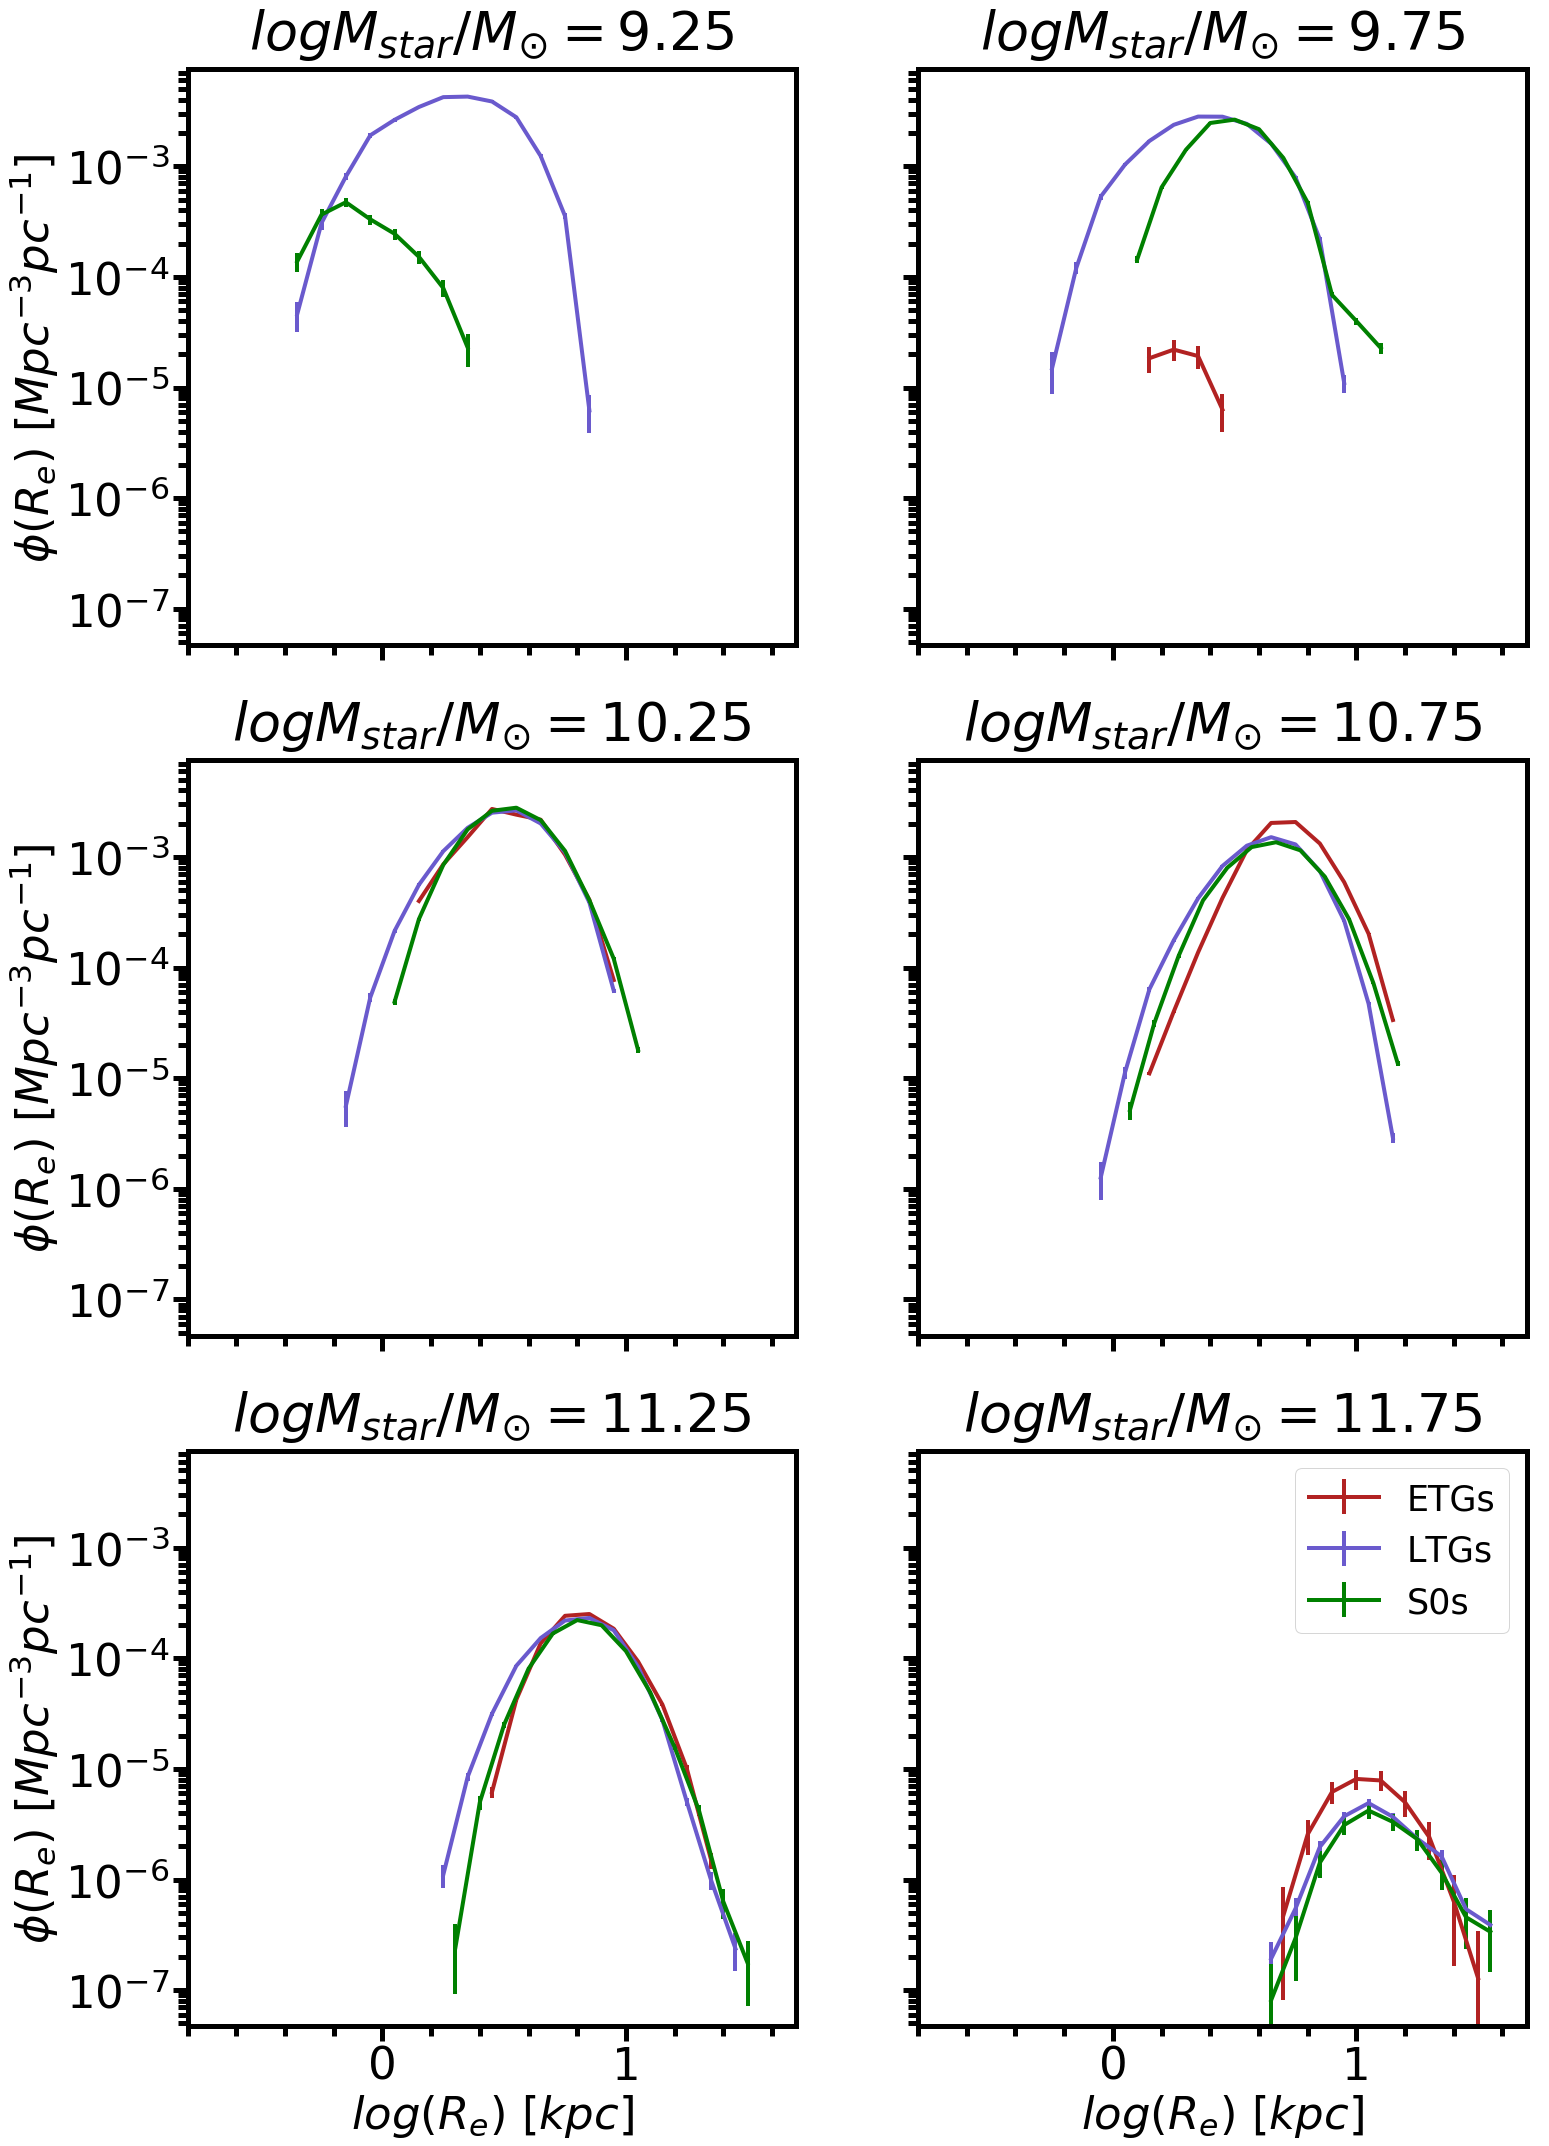

In [16]:
ups = [9.5,10,10.5,11.,11.5,12.]
downs = np.array(ups)-0.5

fig, ax = plt.subplots(3,2,figsize=(24,36), sharey=True,sharex=True)
i=0;j=0
#bins=np.linspace(0.1,10,50)
offxE = np.zeros(6) #[0,0,0.1,0.1,0,-0.05]
offyE = np.ones(6) #[1,1,10**1.5,1.e1,10**-0.1,1.e-1]
offxS = offxE#[0,0.45,0.3,0.22,0.15,0.1]
offyS = offyE #[1,10**0.5,10**0.3,1.01,10**-0.27,10**-0.5]

bins=np.arange(-1,1.7,0.1)
names=['ETGs','LTGs','S0s']
colors=['firebrick','slateblue','green']
for col,name in zip(colors,names):
    i=0;j=0    
    
    for  k,(u,d) in enumerate(zip(ups,downs)):
        
        if name=='ETGs':
            offx= offxE
            offy=offyE
        if name == 'S0s':
            offx= offxS#
            offy =offyS
            
        if name == 'LTGs':
            offx=np.zeros(6)
            offy=np.ones(6)
        
        m=(u+d)/2.
        Re, phi,err =np.loadtxt('ReF/disk_ell_S0s/'+str(m)+'/Re_'+str(name)+str(m)+'cent.txt',unpack=True)
        
        ax[i][j].errorbar(Re+offx[k],phi*offy[k],err,lw=4,label=name,color=col)
        
        ax[i][j].set_title('$log M_{star}/M_{\odot} =$'+str(m))
        if (i==0 and j==0) or (i==1 and j==0) or (i==2 and j==0):
            #ax[i][j].set_ylabel('P(TType)')
            ax[i][j].set_ylabel('$\phi(R_e) \ [Mpc^{-3}pc^{-1}]$')
        if (i ==2 ):
           # ax[i][j].set_xlabel('TType')
            ax[i][j].set_xlabel('$log(R_e) \ [kpc]$')
            #ax[i][j].set_xlim(0,10)
            ax[i][j].set_xlim(-0.8,1.7)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
           # ax[i][j].set_xticks(np.arange(0,10))
        j+=1
        if(j==2):
            i+=1
            j=0
ax[2][1].legend(fontsize=35)
plt.yscale('log')
#plt.suptitle('Size function for TType > 0')
#plt.tight_layout()
plt.savefig('/home/lorenzo/Pictures/sizefunctions_detailed_rescaled.pdf')
#plt.savefig('BT_LTGs.pdf')
                                   

 


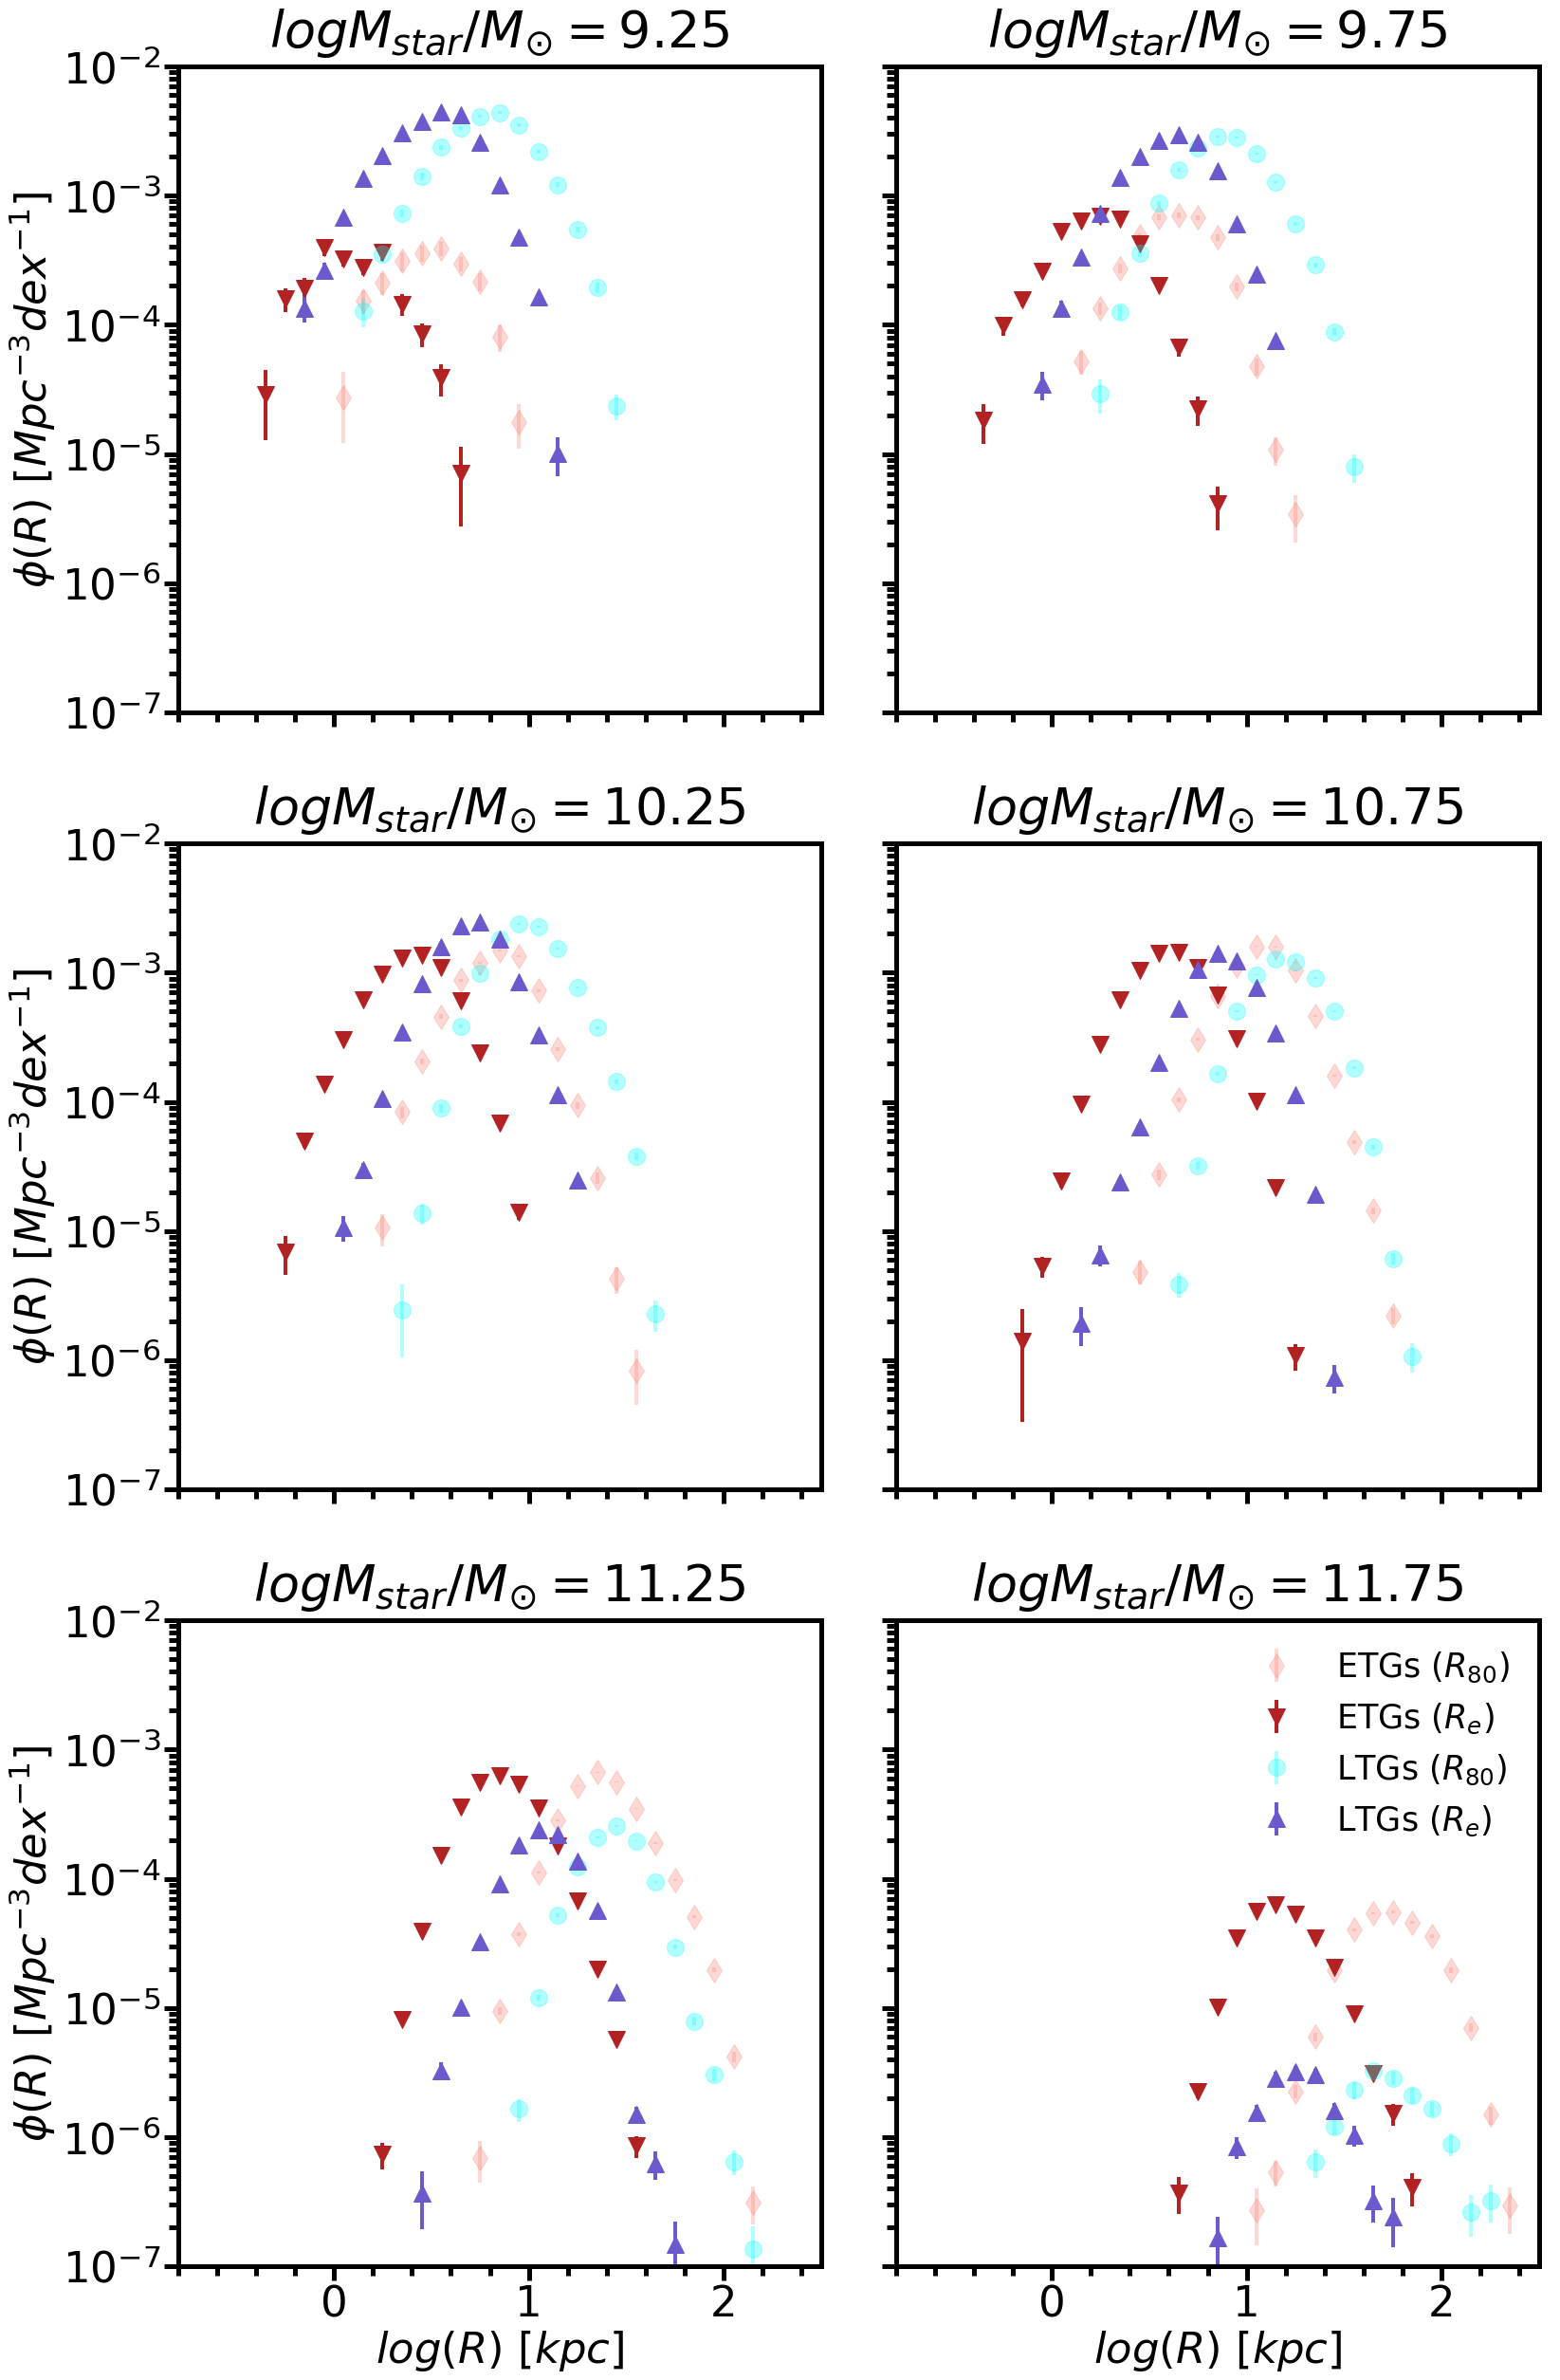

In [11]:
ups = [9.5,10,10.5,11.,11.5,12.]
downs = np.array(ups)-0.5

fig, ax = plt.subplots(3,2,figsize=(24,36), sharey=True,sharex=True)
i=0;j=0
#bins=np.linspace(0.1,10,50)
bins=np.arange(-1,1.7,0.1)
names=['ETGs','LTGs']
colors_re=['firebrick','slateblue']
markers=['d','o']
colors = ['salmon','cyan']
markers_re = ['v','^']
for (mke,mk),(colre,(col,name)) in zip(zip(markers_re,markers),zip(colors_re,zip(colors,names))):
    i=0;j=0    
    
    for  u,d in zip(ups,downs):
        m=(u+d)/2.
        Re, phi,err =np.loadtxt('R80/'+str(m)+'/Re_'+str(name)+str(m)+'centJKoriginal.txt',unpack=True)
        
        ax[i][j].errorbar(Re,phi,err,lw=4,label=name+' ($R_{80}$)',color=col,linestyle='None',fmt=mk, markersize=18, alpha=0.3)

        
        Re, phi,err =np.loadtxt('ReF/Rmaj/'+str(m)+'/Re_'+str(name)+str(m)+'centJKoriginal.txt',unpack=True)
        
        ax[i][j].errorbar(Re,phi,err,lw=4,label=name+' ($R_{e}$)',color=colre,linestyle='None',fmt=mke, markersize=18)
        
        ax[i][j].set_title('$log M_{star}/M_{\odot} =$'+str(m))
        if (i==0 and j==0) or (i==1 and j==0) or (i==2 and j==0) :
            #ax[i][j].set_ylabel('P(TType)')
            ax[i][j].set_ylabel('$\phi(R) \ [Mpc^{-3}dex^{-1}]$')
        if (i ==2 ):
           # ax[i][j].set_xlabel('TType')
            ax[i][j].set_xlabel('$log(R) \ [kpc]$')
            #ax[i][j].set_xlim(0,10)
            xx=np.arange(11,21)

            ax[i][j].set_xlim(-0.8,2.5)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
           # ax[i][j].set_xticks(np.arange(0,10))
        j+=1
        if(j==2):
            i+=1
            j=0
#ax[2][1].plot(xx,xx, color='black',lw =4,ls='--', label='All')
#ax[2][1].plot(xx,xx, color='black',lw=4,ls='-', label='only good')
plt.ylim(1.e-7,10**-2)
ax[2][1].legend(fontsize=35, frameon=False)
plt.yscale('log')
#plt.suptitle('Size function for TType > 0')
plt.tight_layout()
plt.savefig('/home/lorenzo/Pictures/PaperSize/sizefunctions_R80.pdf')
#plt.savefig('BT_LTGs.pdf')
                                   

 

In [4]:
df = pd.read_csv('./new_catalog_morph_flag_rtrunc.dat',delim_whitespace=True)
df.columns

Index(['galcount', 'finalflag', 'zMeert', 'Vmaxwt', 'MsMendSerExp', 'AbsMag',
       'logReSerExp', 'BT', 'n_bulge', 'NewLCentSat', 'NewMCentSat', 'MhaloL',
       'probaE', 'probaEll', 'probaS0', 'probaSab', 'probaScd', 'TType',
       'P_S0', 'veldisp', 'veldisperr', 'raSDSS7', 'decSDSS7'],
      dtype='object')

In [15]:
Header = ['galcount','finalflag','zMeert','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','probaE','probaEll',
                                 'probaS0','probaSab','probaScd','TType','P_S0',
                               'veldisp','veldisperr','raSDSS7','decSDSS7']
df_original = pd.read_csv('./new_catalog_morph_flag.dat', header = None, names = Header, skiprows = 1, delim_whitespace = True)
        #Clears NAN/ unsuable data
print(len(df_original))
fracper=0.724
skycov=8000.
fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)
df_original=df_original.dropna()
df_original=df_original[df_original.Vmaxwt.values>0]
df_original=df_original[['MsMendSerExp','Vmaxwt','finalflag','TType','NewLCentSat','BT','logReSerExp','raSDSS7','decSDSS7']]
#df=df[df.MsMendSerExp>9.]
df_original=df_original[df_original.NewLCentSat==1]
df_original.index=np.arange(len(df_original))                

486181


In [16]:
goodness_cut = (df_original.finalflag==3 ) | (df_original.finalflag==5) | (df_original.finalflag==1)

df_good = df_original[goodness_cut]
fracper_good = fracper*len(df_good)/len(df_original)
fracsky_good = (skycov*fracper_good)/(4*np.pi*(180./np.pi)**2.)

df_good.loc[df_good.finalflag==5,'BT']=0
df_good.loc[df_good.finalflag==1,'BT']=1

/home/lorenzo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


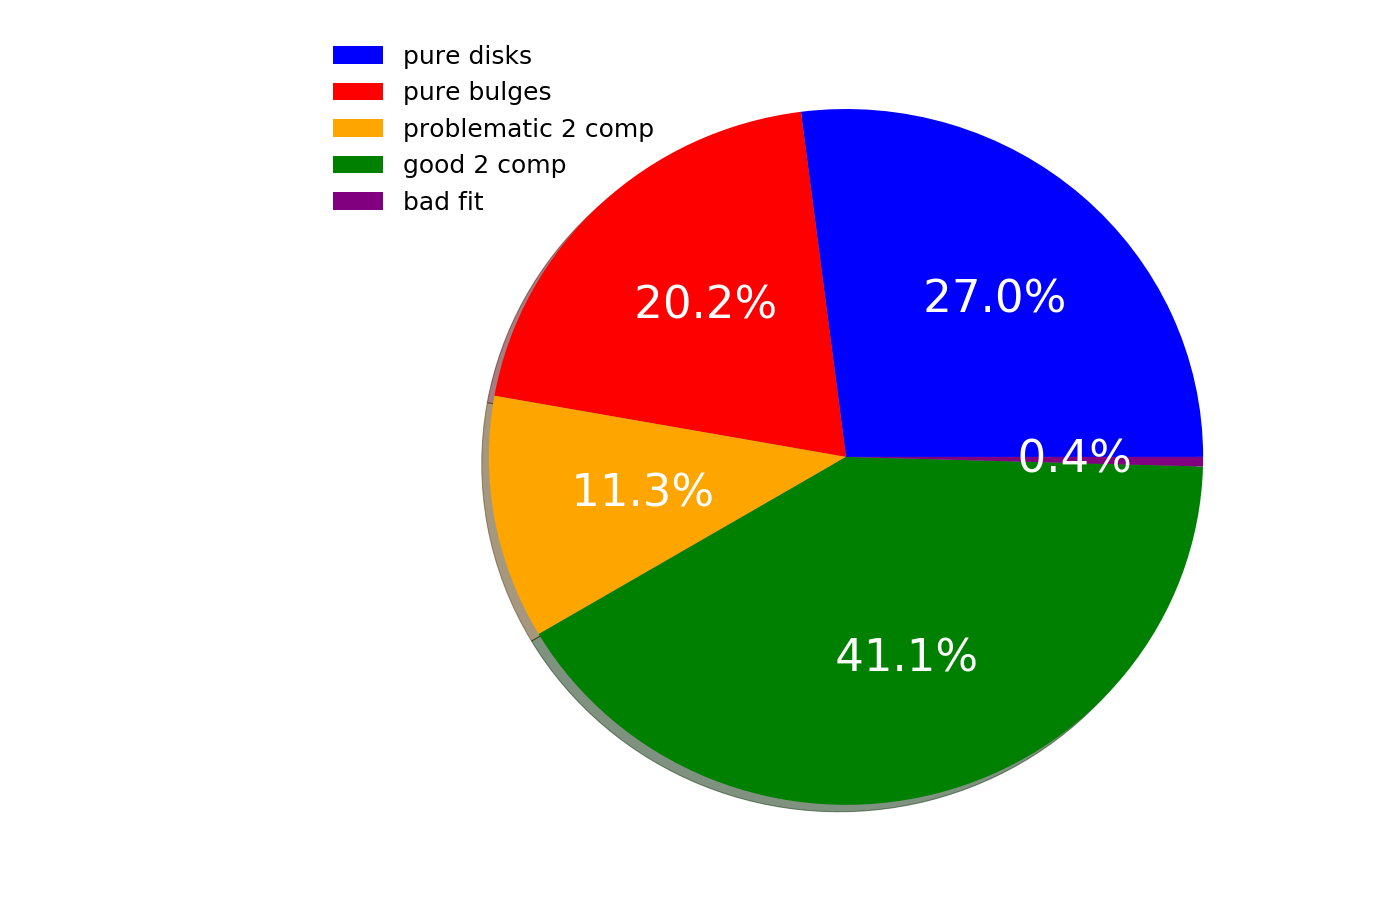

In [128]:
labels=['pure disks','pure bulges','problematic 2 comp','good 2 comp','bad fit']
colors=['blue','red','orange','green','purple']
data=[len(df_original[df_original.finalflag==5]),
     len(df_original[df_original.finalflag==1]),
     len(df_original[df_original.finalflag==4]),
      len(df_original[df_original.finalflag==3]),
     len(df_original[df_original.finalflag==-999])]
patches, texts, autotexts=plt.pie(data,labels=labels,colors=colors,textprops=dict(color='w'),autopct='%5.1f%%', shadow=True,radius=1)
texts[0].set_fontsize(25)
plt.legend(patches, labels,
                       loc="upper left", bbox_to_anchor=(-0.1,1), fontsize=25,frameon=False)
plt.savefig('/home/lorenzo/Pictures/Pie.pdf')

In [23]:
bins= np.arange(9,12.4,0.1)

hist = np.histogram(df_original.MsMendSerExp.values,bins=bins,weights=df_original.Vmaxwt.values)[0]/(fracsky*0.1)
hist_good = np.histogram(df_good.MsMendSerExp.values,bins=bins,weights=df_good.Vmaxwt.values)[0]/(fracsky_good*0.1)

nums = np.histogram(df_original.MsMendSerExp.values, bins=bins)[0]
nums_good = np.histogram(df_good.MsMendSerExp.values, bins=bins)[0]

err = hist/np.sqrt(nums)
err_good =hist/np.sqrt(nums_good)

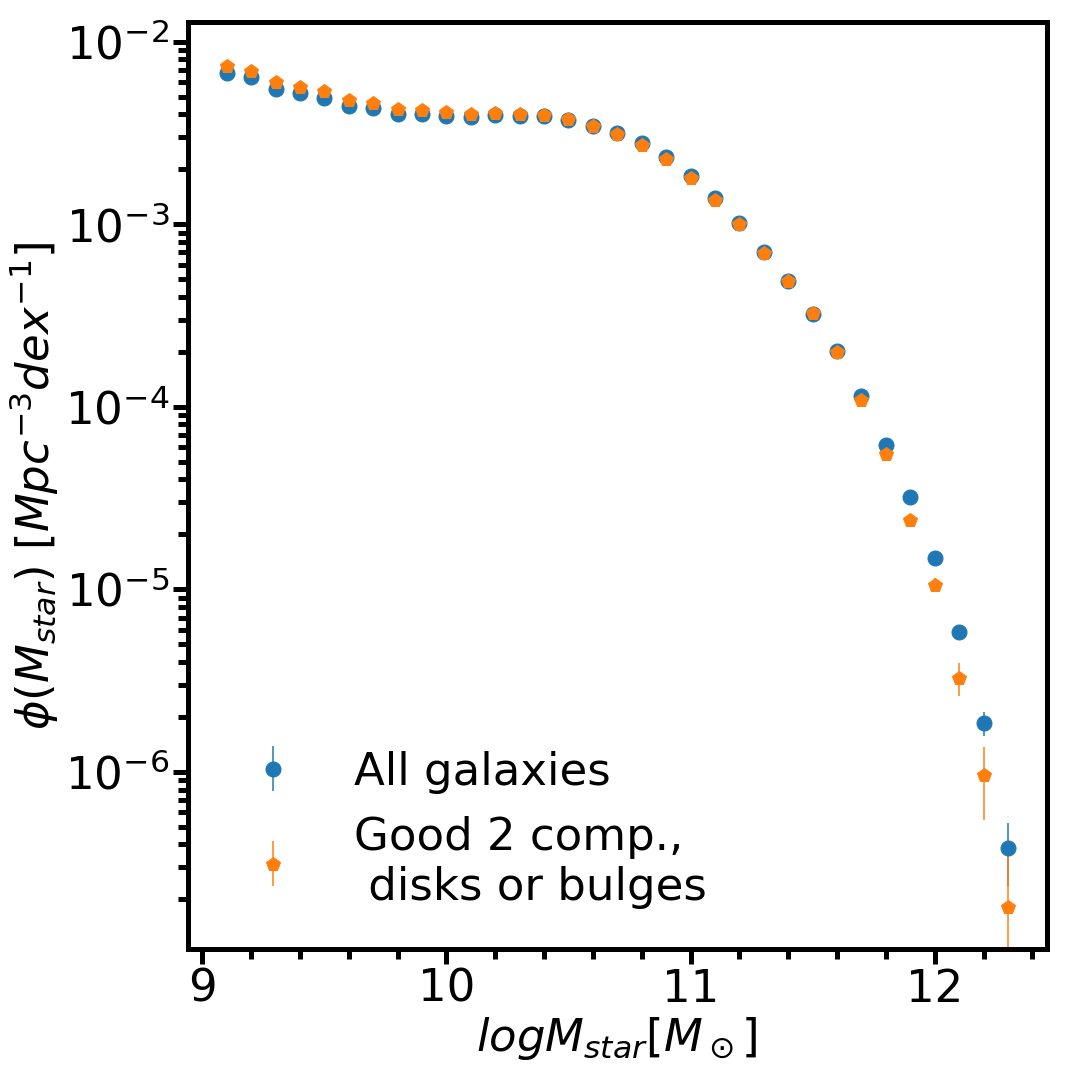

In [36]:
plt.errorbar(bins[1:],hist,err,label='All galaxies',ls='None',marker = 'o',markersize=15)
plt.errorbar(bins[1:],hist_good,err_good,label='Good 2 comp., \n disks or bulges',marker='p',ls='None',markersize=15)
plt.legend(frameon=False,fontsize=45, loc='lower left')
plt.ylabel('$\phi(M_{star}) \ [Mpc^{-3}dex^{-1}]$')
plt.xlabel('$logM_{star}[M_\odot]$')
plt.yscale('log')
plt.tight_layout()
plt.savefig('/home/lorenzo/Pictures/SMFs.pdf')

IndexError: index 2 is out of bounds for axis 0 with size 2

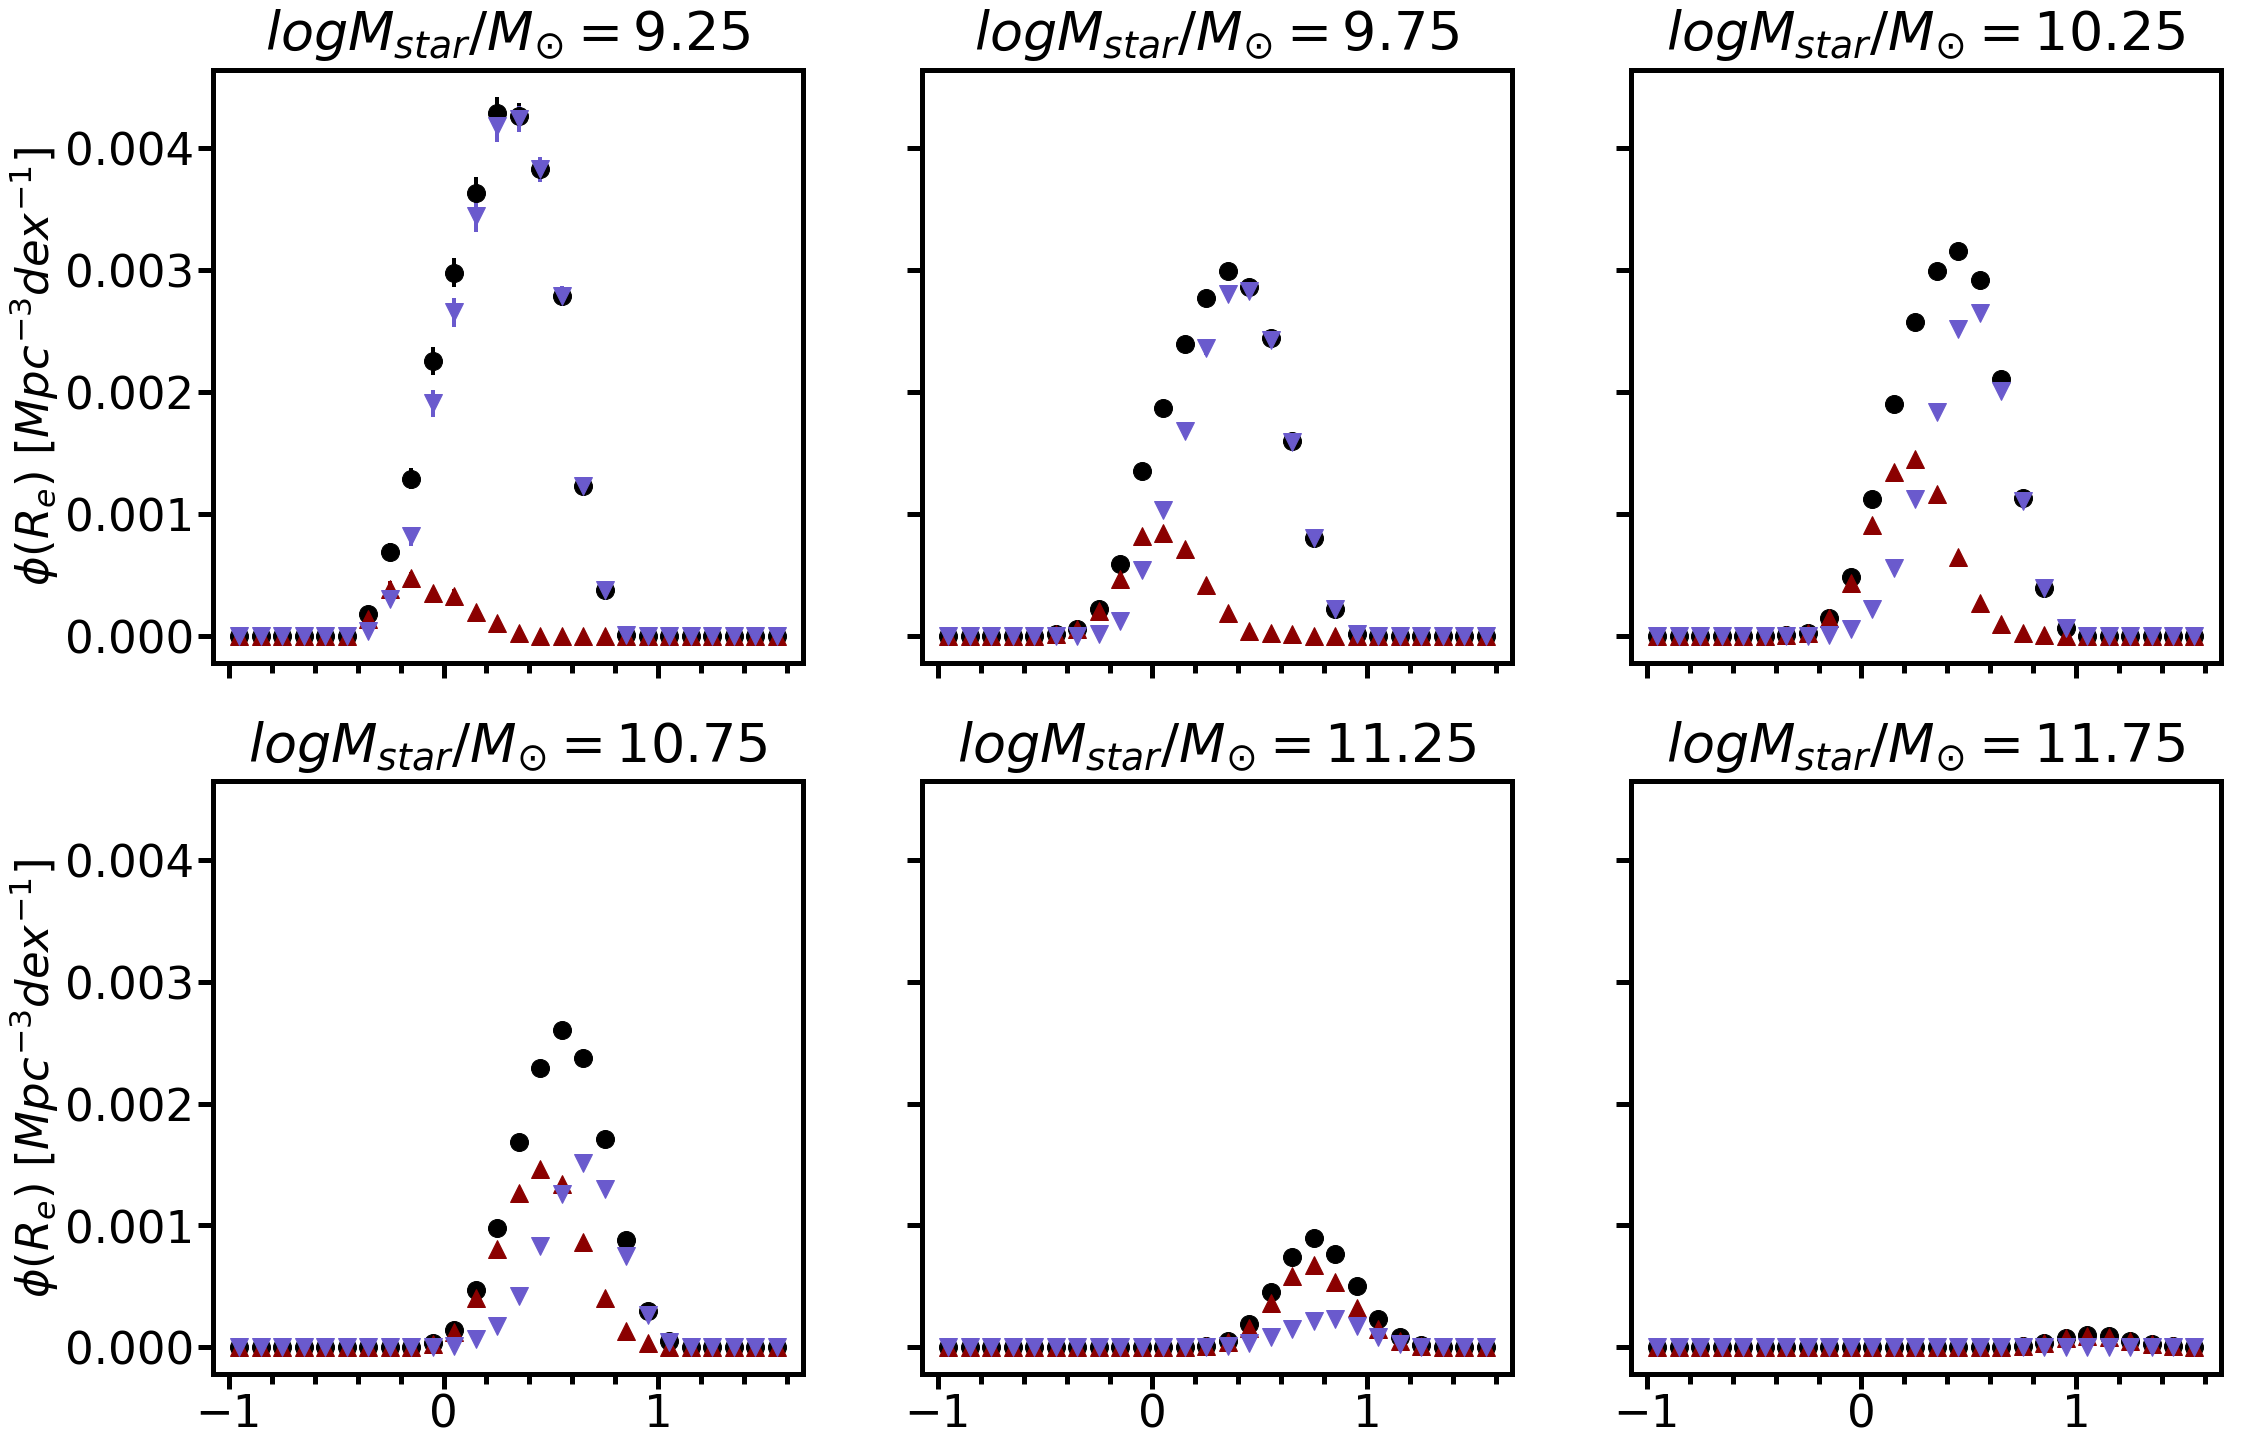

In [9]:
ups = [9.5,10,10.5,11.,11.5,12.]
downs = np.array(ups)-0.5

fig, ax = plt.subplots(2,3,figsize=(36,24), sharey=True,sharex=True)
i=0;j=0
#bins=np.linspace(0.1,10,50)
bins=np.arange(-1,1.7,0.1)
names=['all','ETGs','LTGs']
colors=['black','darkred','slateblue']
colors_cleaned = ['red','navy']
fmts = ['o','^','v']
for name,(col,fmt) in zip(names,zip(colors,fmts)):
    i=0;j=0    
    
    for  u,d in zip(ups,downs):
        m=(u+d)/2.
        Re, phi,err =np.loadtxt('ReF/'+str(m)+'/Re_'+str(name)+str(m)+'centJK.txt',unpack=True)
        
        ax[i][j].errorbar(Re,phi,err,lw=4,label=name,linestyle='None',color=col,fmt=fmt, markersize=18)

      #  Re, phi,err =np.loadtxt('ReF/'+str(m)+'/Re_'+str(name)+str(m)+'centJKcleaned.txt',unpack=True)
        
        #ax[i][j].errorbar(Re,phi,err,lw=4,label=name+'_cleaned',color=colclean)

        ax[i][j].set_title('$log M_{star}/M_{\odot} =$'+str(m))
        if (i==0 and j==0) or (i==1 and j==0) or (i==2 and j==0):
            #ax[i][j].set_ylabel('P(TType)')
            ax[i][j].set_ylabel('$\phi(R_e) \ [Mpc^{-3}dex^{-1}]$')
        if (i ==2 ):
           # ax[i][j].set_xlabel('TType')
            ax[i][j].set_xlabel('$log(R_e) \ [kpc]$')
            #ax[i][j].set_xlim(0,10)
            ax[i][j].set_xlim(-0.8,1.7)
        #ax[i][j].set_xticks(np.arange(-0.4,1.4,0.2))
           # ax[i][j].set_xticks(np.arange(0,10))
        j+=1
        if(j==3):
            i+=1
            j=0
ax[1][2].legend(fontsize=35)
plt.yscale('log')
#plt.suptitle('Size function for TType > 0')
#plt.tight_layout()
plt.savefig('/home/lorenzo/Pictures/sizefunctions.pdf')
#plt.savefig('BT_LTGs.pdf')
                                   

 

In [10]:
            Header = ['galcount','z','Vmaxwt','MsMendSerExp','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','TType','P_S0']
        
            df = pd.read_csv('./new_catalog_morph_Jay.dat', header = None, names = Header, skiprows = 1, usecols=(0,1,2,3,5,6,7,10,11,12,18,19),delim_whitespace = True)
            goodness_cut = (df.finalflag==3 ) | (df.finalflag==5) | (df.finalflag==1)
            df = df[goodness_cut]

AttributeError: 'DataFrame' object has no attribute 'finalflag'

In [8]:
            Header=['galcount','finalflag','z','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','probaE','probaEll',
                                 'probaS0','probaSab','probaScd','TType','P_S0',
                               'veldisp','veldisperr','raSDSS7','decSDSS7']
            
            df1 = pd.read_csv('./new_catalog_morph_flag_rtrunc.dat', header = None, names = Header, skiprows = 1, delim_whitespace = True)

In [9]:
df.logReSerExp.values-df1.logReSerExp.values

ValueError: operands could not be broadcast together with shapes (486258,) (428527,) 

In [6]:
            Header=['galcount','finalflag','z','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
                                   'BT','n_bulge','NewLCentSat','NewMCentSat'
                                   ,'MhaloL','probaE','probaEll',
                                 'probaS0','probaSab','probaScd','TType','P_S0',
                               'veldisp','veldisperr','raSDSS7','decSDSS7']
            
            df = pd.read_csv('./new_catalog_morph_flag_finalflag_Rmaj.dat', header = None, names = Header, skiprows = 1, delim_whitespace = True)

In [8]:
df =df.query('MsMendSerExp>11.25 & TType<0')

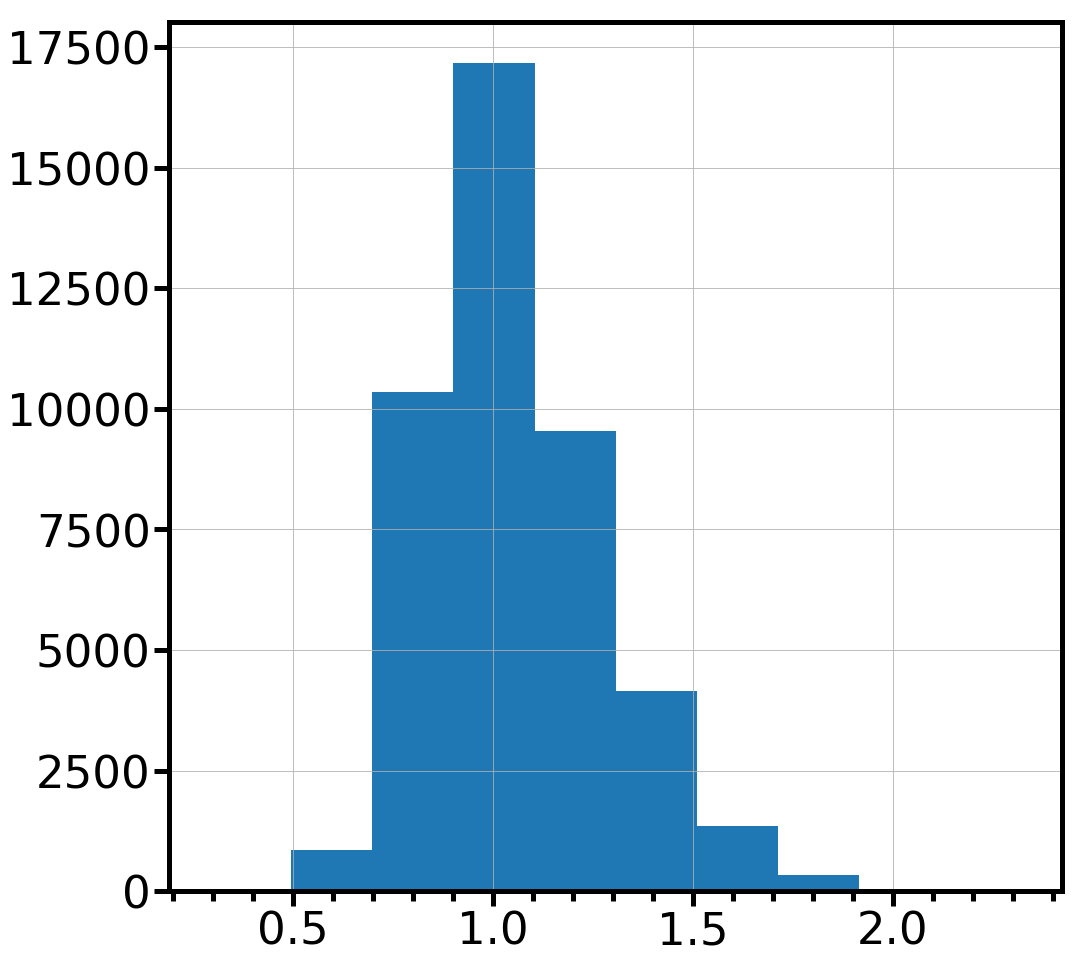

In [9]:
df.logReSerExp.hist()